### Dataset

In [84]:
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings('ignore')

import h2o
from h2o.automl import H2OAutoML

In [85]:
# Evito que ciertas columnas se transformen a notacion cientifica en las predicciones
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [86]:
columns = [
    # 'Open_time',
    'Open',
    'High',
    'Low',
    # 'Close',
    'Number of trades',
    # 'Close_BTCUSDT',
    'Volume_BTCUSDT',
    'Number_of_trades_BTCUSDT',
    # 'Close_ETHUSDT',
    'Volume_ETHUSDT',
    # 'Number_of_trades_ETHUSDT',
    # 'Close_BNBUSDT',
    'Volume_BNBUSDT',
    # 'Number_of_trades_BNBUSDT',
    # 'SMA_20',
    'EMA_20',
    'Upper_Band',
    'Middle_Band',
    # 'Lower_Band',
    'RSI',
    # 'buy_1000x_high_coinbase',
    # 'sell_1000x_high_coinbase',
    'total_trades_coinbase',	
    'Tweets_Utilizados',
    'Tweets_Utilizados_coin',
    # 'Tweets_Utilizados_referentes',
    'Tweets_Utilizados_whale_alert',
    'Buy_1000x_high',
    'sell_1000x_high',
    # 'total_trades_binance'
]

### Armado y entrenamiento de un clasificador a partir de los datos originales

In [87]:
complete_dataset = pd.read_csv('/Users/mmarchetta/Desktop/Tesis-2024/data-visualization/final_dataset.csv') 
classifier_dataset = complete_dataset[columns]
classifier_dataset['Tendencia'] = complete_dataset['Tendencia']

clasifier_validation = classifier_dataset[-10:]
classifier_dataset = classifier_dataset[:-10]

In [88]:
# PARA NORMALIZACION
scaler = MinMaxScaler() #StandardScaler()
features = classifier_dataset[columns]
features_scaled = scaler.fit_transform(features)

classifier_dataset_scaled = pd.DataFrame(features_scaled, columns=columns)
classifier_dataset_scaled['Tendencia'] = classifier_dataset['Tendencia'].values

In [89]:
# PARA NORMALIZACION
features_validation = clasifier_validation[columns]
features_validation_scaled = scaler.transform(features_validation)
clasifier_validation_scaled = pd.DataFrame(features_validation_scaled, columns=columns)
clasifier_validation_scaled['Tendencia'] = clasifier_validation['Tendencia'].values

In [90]:
display(classifier_dataset_scaled.tail())

Open  High  Low  Number of trades  Volume_BTCUSDT  \
941  0.07  0.06 0.06              0.02            0.03   
942  0.06  0.06 0.06              0.02            0.02   
943  0.06  0.06 0.06              0.02            0.02   
944  0.06  0.06 0.06              0.01            0.01   
945  0.06  0.06 0.06              0.02            0.03   

     Number_of_trades_BTCUSDT  Volume_ETHUSDT  Volume_BNBUSDT  EMA_20  \
941                      0.07            0.08            0.08    0.08   
942                      0.05            0.05            0.05    0.08   
943                      0.04            0.07            0.04    0.08   
944                      0.03            0.07            0.04    0.08   
945                      0.06            0.10            0.06    0.08   

     Upper_Band  Middle_Band  RSI  total_trades_coinbase  Tweets_Utilizados  \
941        0.09         0.08 0.26                   0.17               0.13   
942        0.09         0.08 0.24                   0.13               0.10   
943        0.09         0.08 0.25                   0.13               0.09   
944        0.08         0.07 0.24                   0.10               0.07   
945        0.07         0.07 0.21                   0.17               0.10   

     Tweets_Utilizados_coin  Tweets_Utilizados_whale_alert  Buy_1000x_high  \
941                    0.11                           0.15            0.12   
942                    0.10                           0.09            0.16   
943                    0.14                           0.05            0.13   
944                    0.10                           0.09            0.08   
945                    0.12                           0.16            0.13   

     sell_1000x_high Tendencia  
941             0.12   Lateral  
942             0.19   Lateral  
943             0.09   Lateral  
944             0.09   Lateral  
945             0.10   Bajista

In [91]:
classifier_dataset.shape

(946, 19)

In [92]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------
H2O_cluster_uptime:         9 days 22 hours 4 mins
H2O_cluster_timezone:       America/Argentina/Buenos_Aires
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    2 months and 13 days
H2O_cluster_name:           H2O_from_python_mmarchetta_uvjkm7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.244 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.8 final
--------------------------  ---------------------------------

In [93]:
# h2o_df = h2o.H2OFrame(classifier_dataset)
h2o_df = h2o.H2OFrame(classifier_dataset_scaled) # PARA NORMALIZACION

aml = H2OAutoML(nfolds=5, keep_cross_validation_predictions=True, seed=1234)
aml.train(y='Tendencia', training_frame=h2o_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_5_AutoML_5_20240526_164136


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       115/115
# GBM base models (used / total)           18/18
# XGBoost base models (used / total)       17/17
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  77/77
# DRF base models (used / total)           2/2
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsMultinomial: stackedensemble
** Reported on train data. **

MSE: 0.13907056046739172
RMSE: 0.3729216545970369
LogLoss: 0.4302837571442611
Mean Per-Class Error: 0.17696352502662407
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Alcista    Bajista    Lateral    Error     Rate
---------  ---------  ---------  --------  ---------
262        5          46         0.162939  51 / 313
8          282        30         0.11875   38 / 320
43         35         235        0.249201  78 / 313
313        322        311        0.176533  167 / 946

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.823467
2    0.978858
3    1

ModelMetricsMultinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22244983775057756
RMSE: 0.47164588172757066
LogLoss: 0.7072205543584948
Mean Per-Class Error: 0.2784311767838126
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Alcista    Bajista    Lateral    Error     Rate
---------  ---------  ---------  --------  ---------
239        15         59         0.236422  74 / 313
11         249        60         0.221875  71 / 320
57         61         195        0.376997  118 / 313
307        325        314        0.278013  263 / 946

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.721987
2    0.945032
3    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.722828  0.0460737  0.666667      0.73545       0.764706      0.765027      0.682292
aic                      nan       0          nan           nan           nan           nan           nan
auc                      nan       0          nan           nan           nan           nan           nan
err                      0.277172  0.0460737  0.333333      0.26455       0.235294      0.234973      0.317708
err_count                52.6      9.96494    65            50            44            43            61
loglikelihood            nan       0          nan           nan           nan           nan           nan
logloss                  0.706266  0.0543338  0.757614      0.680712      0.670043      0.651679      0.771282
max_per_class_error      0.371706  0.0753798  0.366667      0.397059      0.309091      0.3           0.485714
mean_per

In [94]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id                                                   mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_5_AutoML_5_20240526_164136                   0.278431   0.707221  0.471646  0.22245
StackedEnsemble_BestOfFamily_7_AutoML_5_20240526_164136                0.282528   0.6961    0.487248  0.23741
StackedEnsemble_BestOfFamily_2_AutoML_5_20240526_164136                0.284798   0.70711   0.487995  0.238139
StackedEnsemble_AllModels_1_AutoML_5_20240526_164136                   0.286974   0.718789  0.488041  0.238184
GLM_1_AutoML_5_20240526_164136                                         0.288382   0.721213  0.499152  0.249153
StackedEnsemble_BestOfFamily_1_AutoML_5_20240526_164136                0.293247   0.706683  0.484672  0.234907
StackedEnsemble_BestOfFamily_3_AutoML_5_20240526_164136                0.294289   0.717375  0.486982  0.237151
StackedEnsemble_BestOfFamily_4_AutoML_5_20240526_164136                0.295261   0.704368  0.486004  0.2362
Stack

### Guardado de los mejores 5 modelos

In [96]:
top_models = aml.leaderboard.as_data_frame()['model_id'].tolist()[:5]
for i, model_id in enumerate(top_models):
    model = h2o.get_model(model_id)
    file_name = f"modelo_{i}.h2o"
    h2o.save_model(model=model, path=f"automl_classifier", filename=file_name)


### Cargo los mejores 5 modelos

In [97]:
stack_models = []
for i in range(5):
    model_path = f"automl_classifier/modelo_{i}.h2o"
    model = h2o.load_model(model_path)
    stack_models.append(model)

### Hago las predicciones

In [105]:
stack_models[0]

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_5_AutoML_5_20240526_164136


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       115/115
# GBM base models (used / total)           18/18
# XGBoost base models (used / total)       17/17
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  77/77
# DRF base models (used / total)           2/2
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsMultinomial: stackedensemble
** Reported on train data. **

MSE: 0.13907056046739172
RMSE: 0.3729216545970369
LogLoss: 0.4302837571442611
Mean Per-Class Error: 0.17696352502662407
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Alcista    Bajista    Lateral    Error     Rate
---------  ---------  ---------  --------  ---------
262        5          46         0.162939  51 / 313
8          282        30         0.11875   38 / 320
43         35         235        0.249201  78 / 313
313        322        311        0.176533  167 / 946

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.823467
2    0.978858
3    1

ModelMetricsMultinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22244983775057756
RMSE: 0.47164588172757066
LogLoss: 0.7072205543584948
Mean Per-Class Error: 0.2784311767838126
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Alcista    Bajista    Lateral    Error     Rate
---------  ---------  ---------  --------  ---------
239        15         59         0.236422  74 / 313
11         249        60         0.221875  71 / 320
57         61         195        0.376997  118 / 313
307        325        314        0.278013  263 / 946

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.721987
2    0.945032
3    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.722828  0.0460737  0.666667      0.73545       0.764706      0.765027      0.682292
aic                      nan       0          nan           nan           nan           nan           nan
auc                      nan       0          nan           nan           nan           nan           nan
err                      0.277172  0.0460737  0.333333      0.26455       0.235294      0.234973      0.317708
err_count                52.6      9.96494    65            50            44            43            61
loglikelihood            nan       0          nan           nan           nan           nan           nan
logloss                  0.706266  0.0543338  0.757614      0.680712      0.670043      0.651679      0.771282
max_per_class_error      0.371706  0.0753798  0.366667      0.397059      0.309091      0.3           0.485714
mean_per

In [98]:
h2o_validation_df = h2o.H2OFrame(clasifier_validation_scaled) # PARA NORMALIZACION
# h2o_validation_df = h2o.H2OFrame(clasifier_validation[columns])
predictions = stack_models[0].predict(h2o_validation_df)
display(predictions)

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict       Alcista    Bajista    Lateral
---------  ----------  ---------  ---------
Bajista    0.00499077  0.968997   0.0260125
Alcista    0.905954    0.015052   0.0789939
Alcista    0.879924    0.0205418  0.0995339
Alcista    0.74103     0.0175634  0.241406
Alcista    0.5876      0.0896012  0.322799
Alcista    0.478777    0.103591   0.417632
Bajista    0.0557101   0.799329   0.144961
Bajista    0.0526823   0.767122   0.180196
Lateral    0.40692     0.172995   0.420085
Lateral    0.368403    0.0957573  0.53584
[10 rows x 4 columns]

##### Datos generados por auto ml con prophet:

In [99]:
# auto_ml_prophet_df = pd.read_csv('auto_timeseries_models_prophet/predicciones.csv')
# h2o_prophet_df = h2o.H2OFrame(auto_ml_prophet_df[columns])
# auto_mp_prophet_predictions = stack_models[2].predict(h2o_prophet_df)

# display(auto_mp_prophet_predictions)

#PARA NORMALIZACION
auto_ml_prophet_df = pd.read_csv('auto_timeseries_models_prophet/predicciones.csv')
features_prophet = auto_ml_prophet_df[columns]
features_prophet_scaled = scaler.transform(features_prophet)
auto_ml_prophet_df_scaled = pd.DataFrame(features_prophet_scaled, columns=columns)
h2o_prophet_df = h2o.H2OFrame(auto_ml_prophet_df_scaled)
auto_mp_prophet_predictions = stack_models[0].predict(h2o_prophet_df)

display(auto_mp_prophet_predictions)

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict      Alcista    Bajista    Lateral
---------  ---------  ---------  ---------
Bajista    0.0251552   0.913987  0.0608581
Bajista    0.0363971   0.865302  0.0983011
Bajista    0.0318842   0.891547  0.0765683
Bajista    0.041639    0.853374  0.104987
Bajista    0.0292653   0.831371  0.139364
Bajista    0.0309959   0.856022  0.112982
Bajista    0.0946938   0.773605  0.131701
Bajista    0.0749223   0.828339  0.0967392
Bajista    0.0800473   0.806096  0.113856
Bajista    0.0703736   0.81115   0.118476
[10 rows x 4 columns]

##### Datos generados por auto ml con stats:

In [100]:
# auto_ml_stats_df = pd.read_csv('auto_timeseries_models/predicciones.csv')
# h2o_stats_df = h2o.H2OFrame(auto_ml_stats_df[columns])
# auto_mp_stats_predictions = stack_models[2].predict(h2o_stats_df)

# display(auto_mp_stats_predictions)

# PARA NORMALIZACION
auto_ml_stats_df = pd.read_csv('auto_timeseries_models/predicciones.csv')
features_stats = auto_ml_stats_df[columns]
features_stats_scaled = scaler.transform(features_stats)
auto_ml_stats_df_scaled = pd.DataFrame(features_stats_scaled, columns=columns)
h2o_stats_df = h2o.H2OFrame(auto_ml_stats_df_scaled)
auto_mp_stats_predictions = stack_models[0].predict(h2o_stats_df)

display(auto_mp_stats_predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict       Alcista    Bajista    Lateral
---------  ----------  ---------  ---------
Bajista    0.0507503    0.511694  0.437556
Lateral    0.0441327    0.17543   0.780437
Lateral    0.0943887    0.187367  0.718244
Lateral    0.0248196    0.118936  0.856245
Lateral    0.0232257    0.422724  0.554051
Lateral    0.0457177    0.161012  0.79327
Bajista    0.0196166    0.768161  0.212222
Bajista    0.00818702   0.922337  0.0694762
Bajista    0.026312     0.566087  0.407601
Lateral    0.0294844    0.466974  0.503542
[10 rows x 4 columns]

##### Datos generados por auto ml con modelos clasicos:

In [101]:
# auto_ml_df = pd.read_csv('h2o_models/predicciones.csv')
# h2o_mp_df = h2o.H2OFrame(auto_ml_df[columns])
# auto_mp_predictions = stack_models[2].predict(h2o_mp_df)

# display(auto_mp_predictions)

#PARA NORAMLIZACION
auto_ml_df = pd.read_csv('h2o_models/predicciones.csv')
features_ml = auto_ml_df[columns]
features_ml_scaled = scaler.transform(features_ml)
auto_ml_df_scaled = pd.DataFrame(features_ml_scaled, columns=columns)
h2o_mp_df = h2o.H2OFrame(auto_ml_df_scaled)
auto_mp_predictions = stack_models[0].predict(h2o_mp_df)

display(auto_mp_predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict       Alcista    Bajista    Lateral
---------  ----------  ---------  ---------
Bajista    0.00831524   0.908335  0.0833497
Bajista    0.0196076    0.831277  0.149115
Bajista    0.00947652   0.933683  0.0568402
Bajista    0.0163169    0.854522  0.129162
Bajista    0.0164395    0.884236  0.0993244
Bajista    0.0144546    0.876523  0.109022
Bajista    0.0140105    0.879331  0.106658
Bajista    0.012628     0.884297  0.103075
Bajista    0.0136543    0.917204  0.0691419
Bajista    0.0462484    0.784373  0.169379
[10 rows x 4 columns]

##### Datos generados por auto ml con modelos clasicos:

In [102]:
# skforecast_df = pd.read_csv('skforecast/predicciones.csv')
# skforecast_df = h2o.H2OFrame(skforecast_df)
# skforecast_predictions = stack_models[2].predict(skforecast_df)

# display(skforecast_predictions)

# PARA NORMALIZACION
skforecast_df = pd.read_csv('skforecast/predicciones.csv')
features_skforecast = skforecast_df[columns]
features_skforecast_scaled = scaler.transform(features_skforecast)
skforecast_df_scaled = pd.DataFrame(features_skforecast_scaled, columns=columns)
h2o_skforecast_df = h2o.H2OFrame(skforecast_df_scaled)
skforecast_predictions = stack_models[0].predict(h2o_skforecast_df)

display(skforecast_predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict       Alcista    Bajista    Lateral
---------  ----------  ---------  ---------
Bajista    0.0235939    0.632709   0.343697
Bajista    0.00796959   0.536799   0.455232
Lateral    0.0118646    0.196712   0.791423
Lateral    0.019148     0.234363   0.746489
Lateral    0.0421041    0.418056   0.53984
Lateral    0.0224098    0.28515    0.69244
Lateral    0.0179886    0.300876   0.681135
Lateral    0.0197516    0.436075   0.544174
Lateral    0.0273083    0.42847    0.544222
Bajista    0.0230268    0.527487   0.449486
[10 rows x 4 columns]

In [103]:
# stack_models[0].explain(h2o_validation_df)

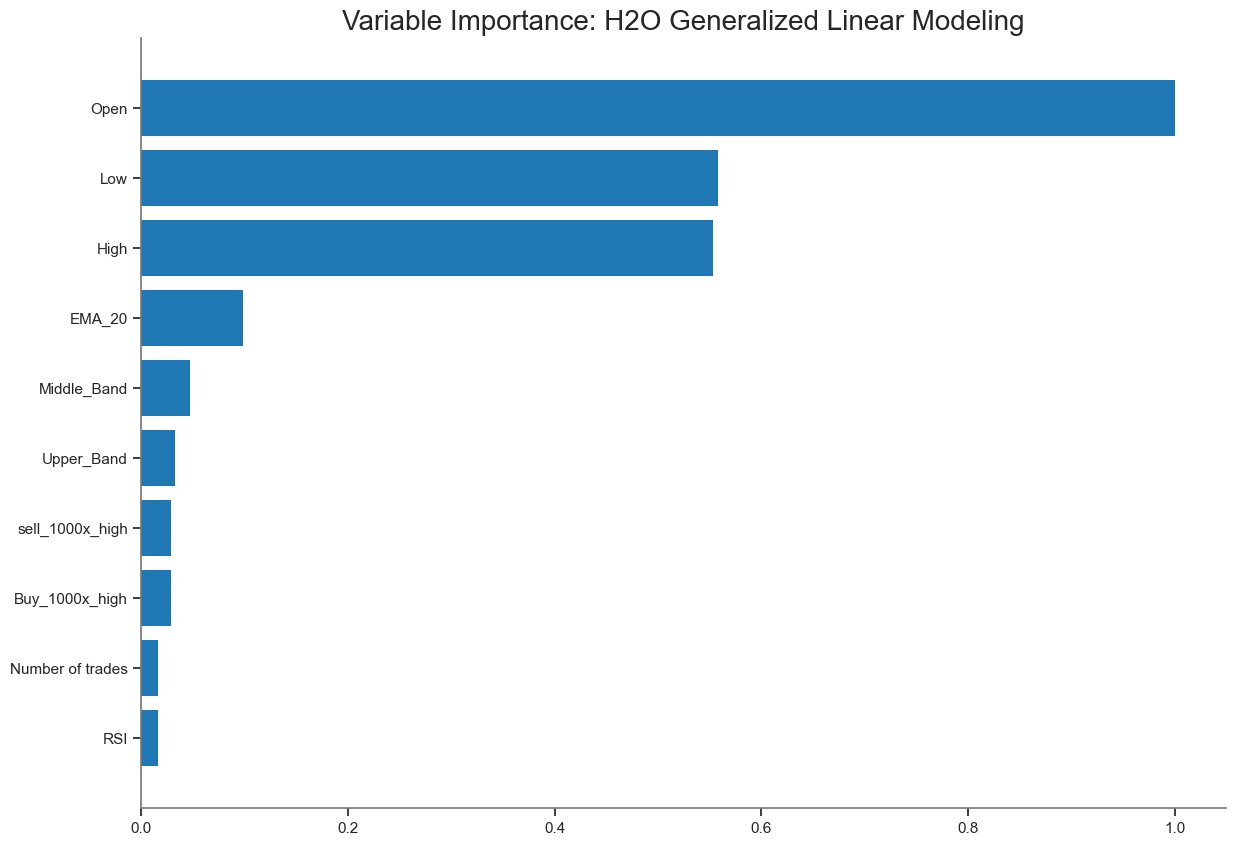

<Figure size 640x480 with 0 Axes>

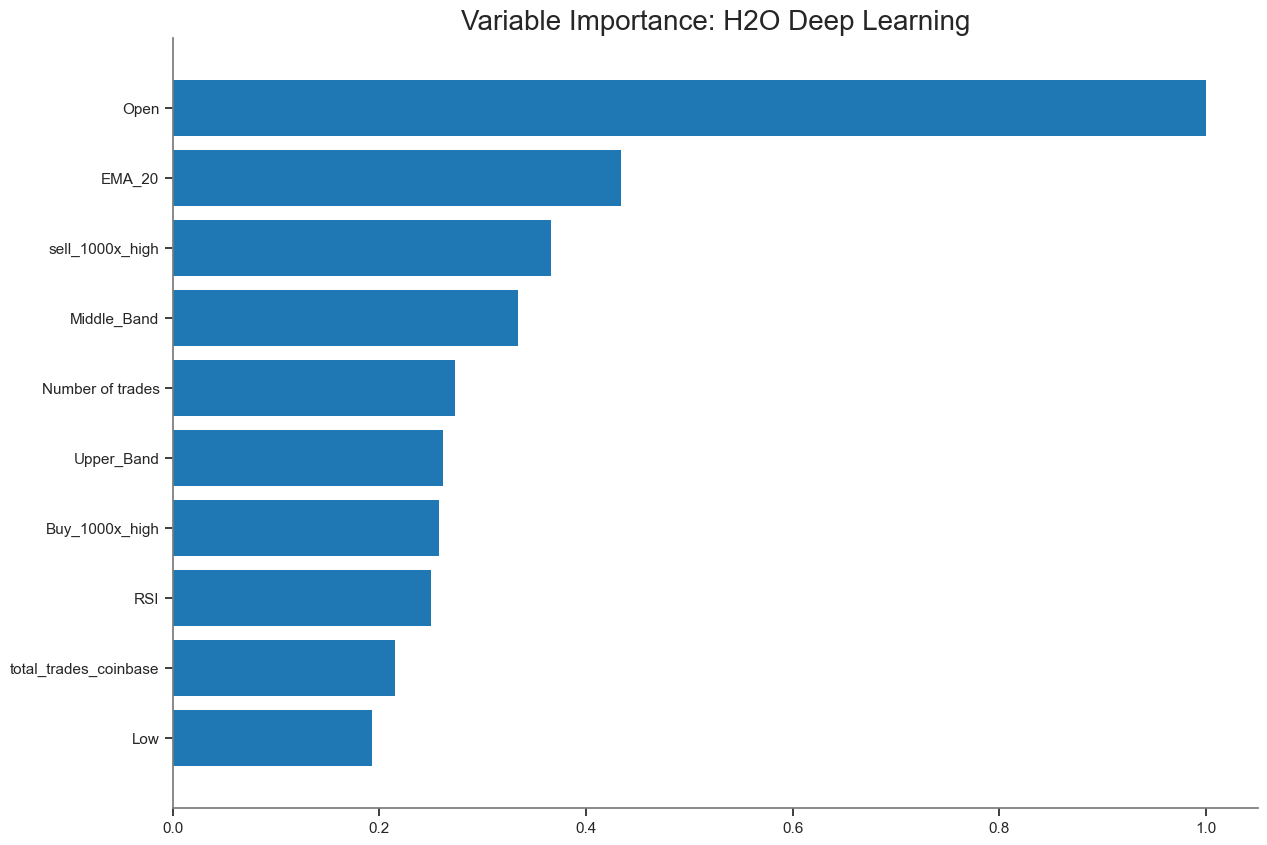

<Figure size 640x480 with 0 Axes>

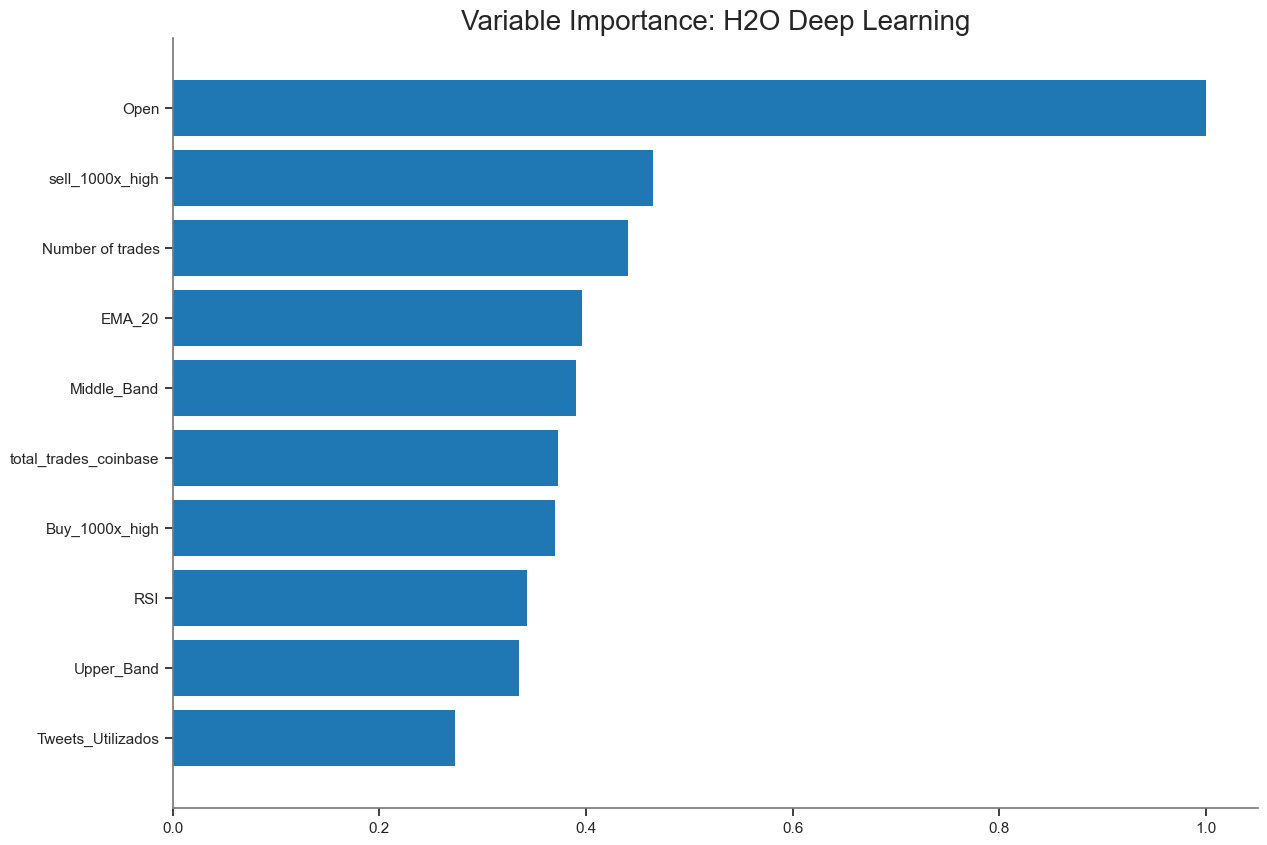

<Figure size 640x480 with 0 Axes>

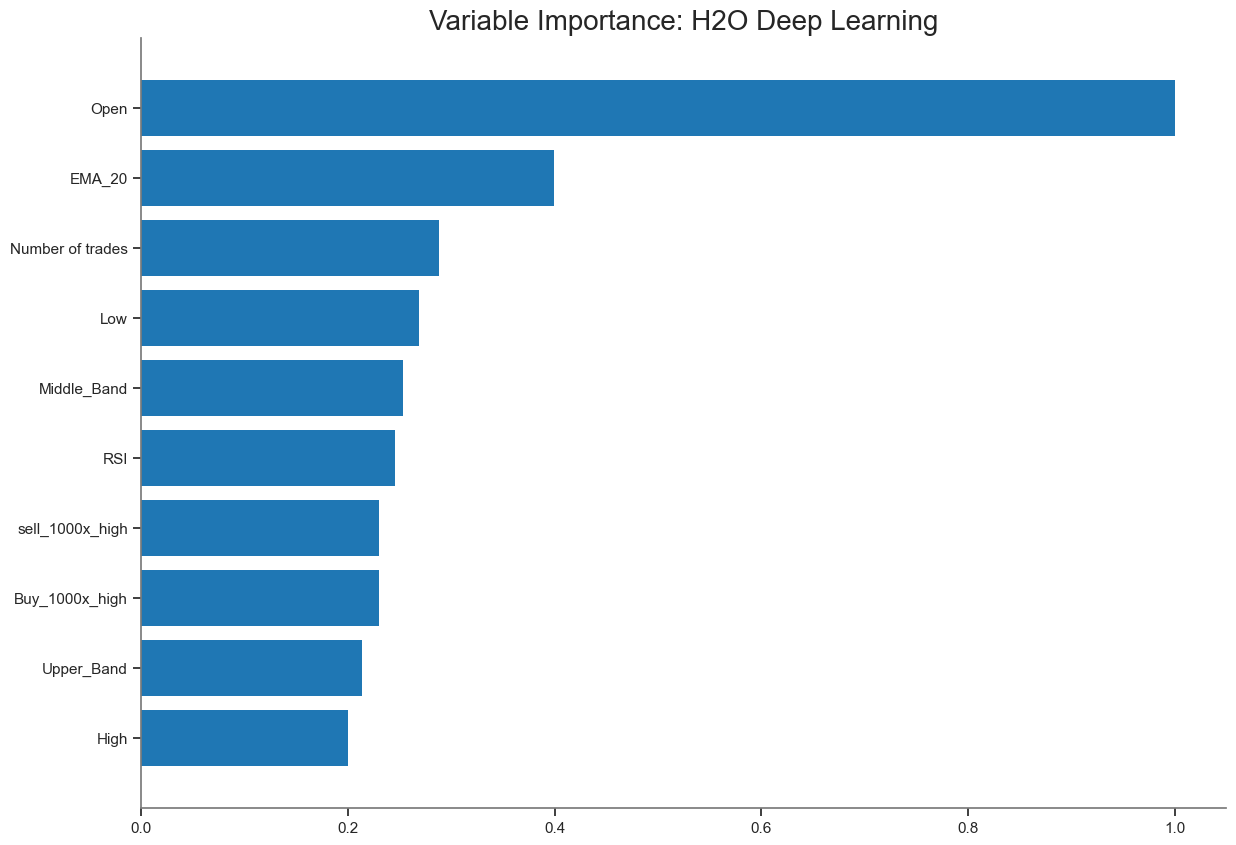

<Figure size 640x480 with 0 Axes>

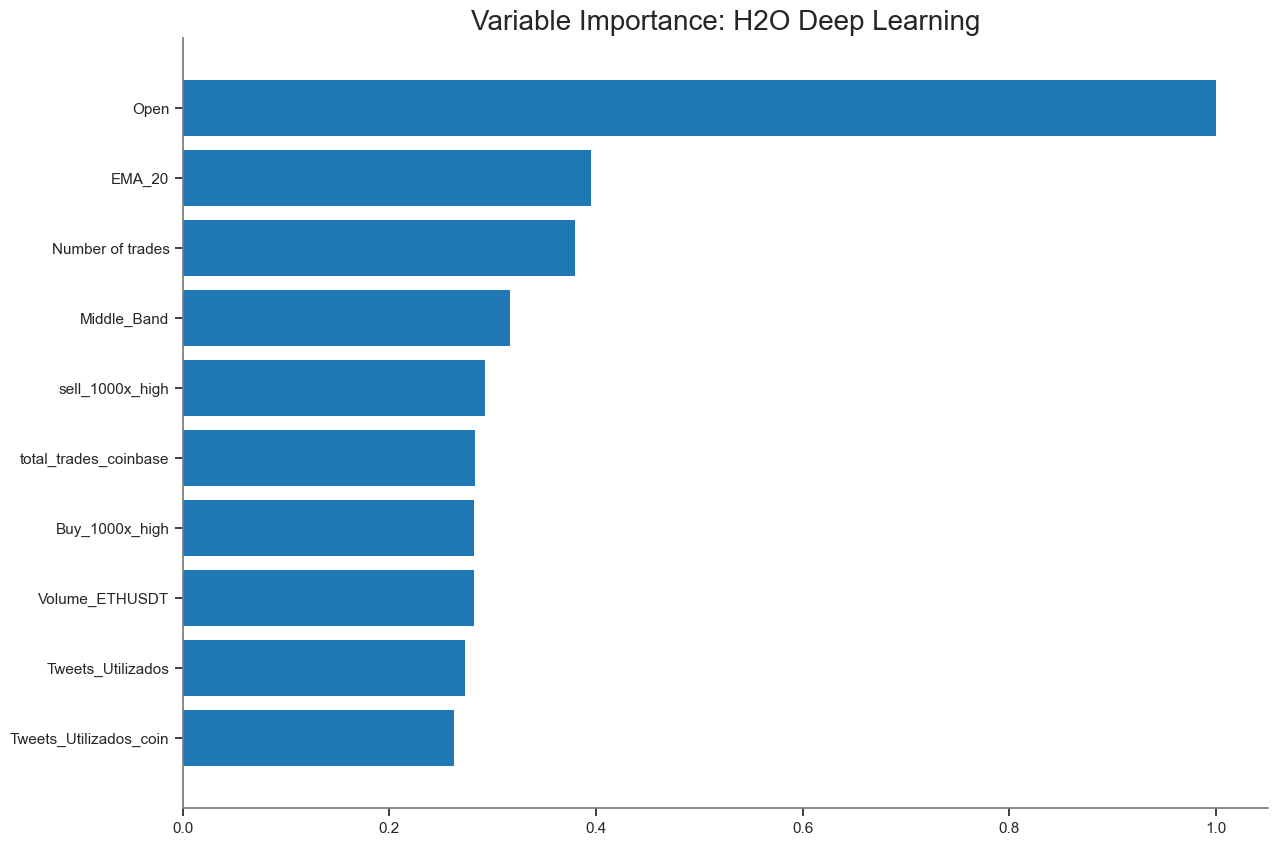

<Figure size 640x480 with 0 Axes>

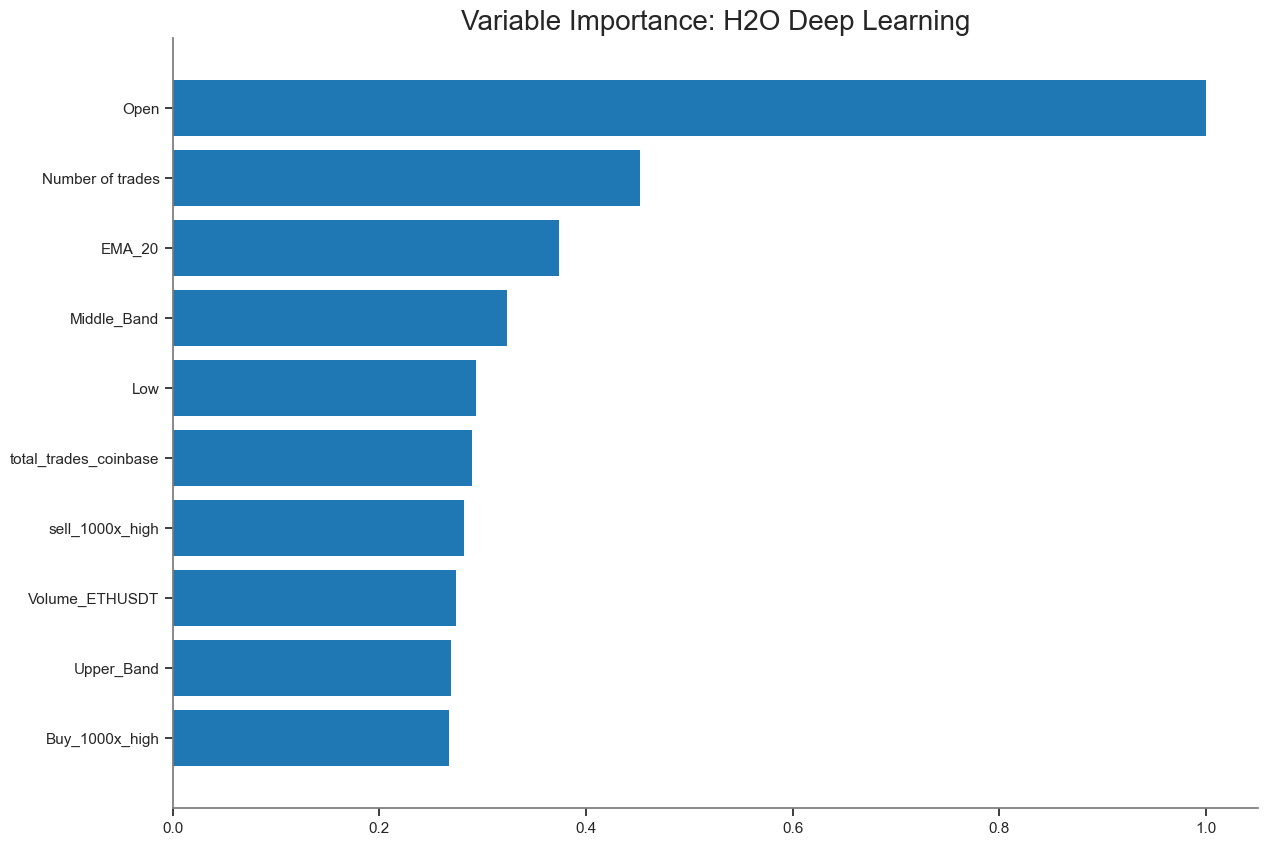

<Figure size 640x480 with 0 Axes>

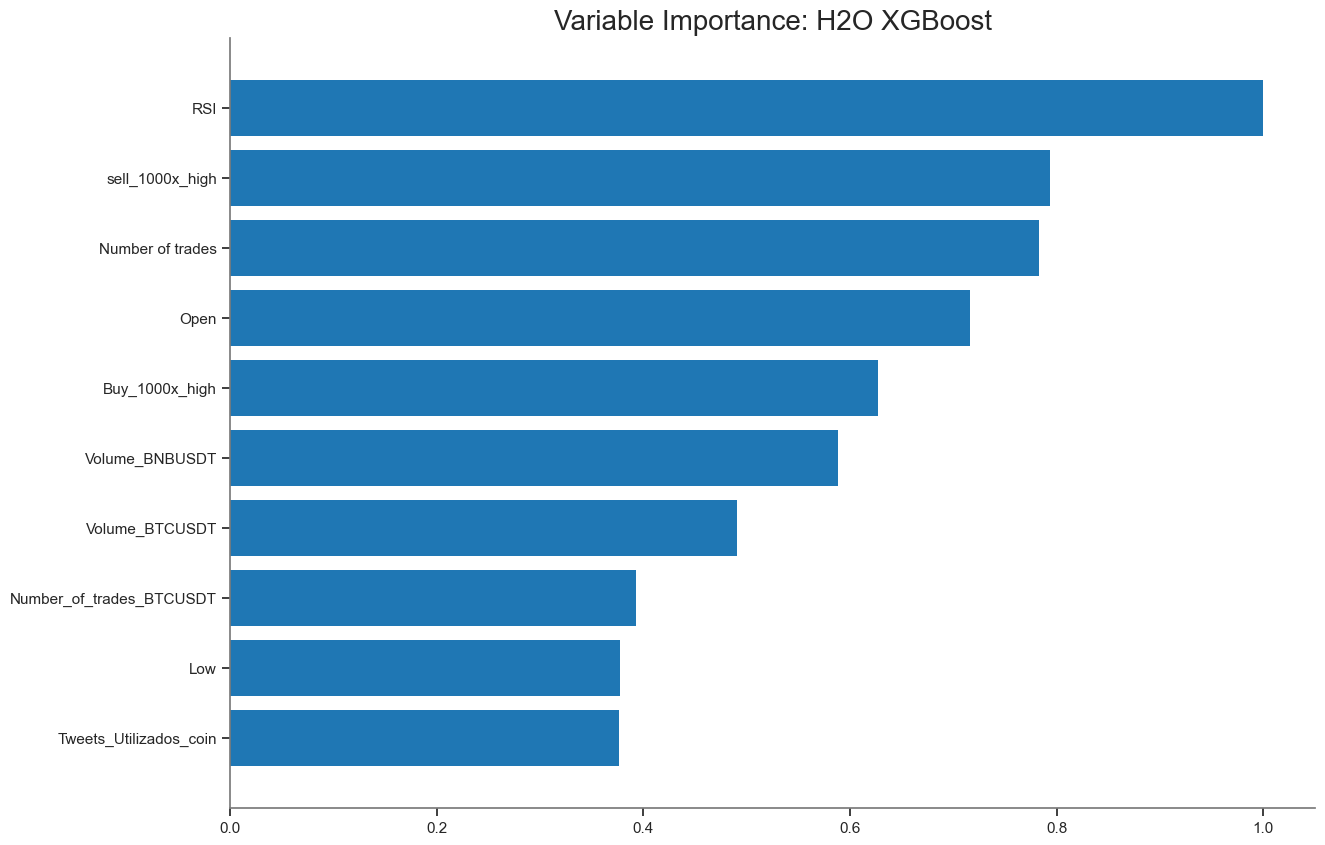

<Figure size 640x480 with 0 Axes>

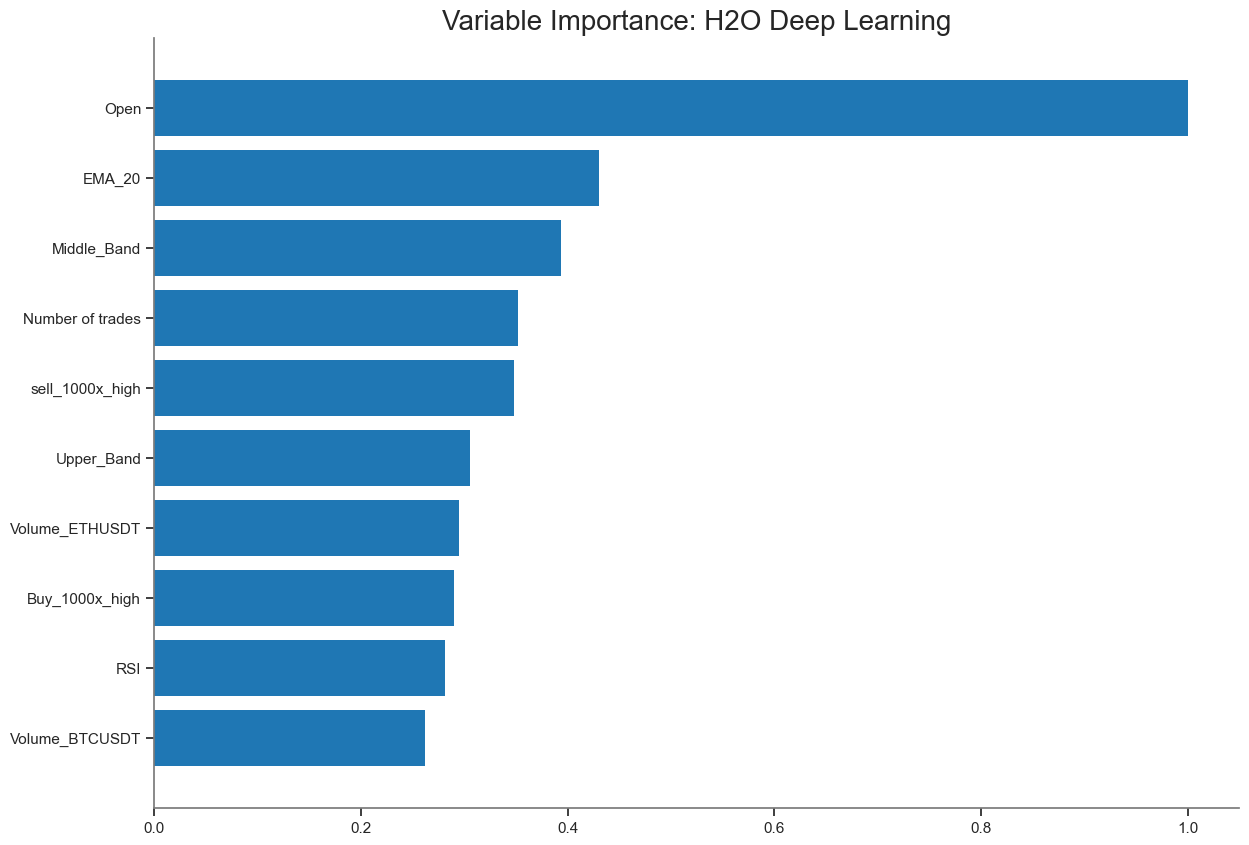

<Figure size 640x480 with 0 Axes>

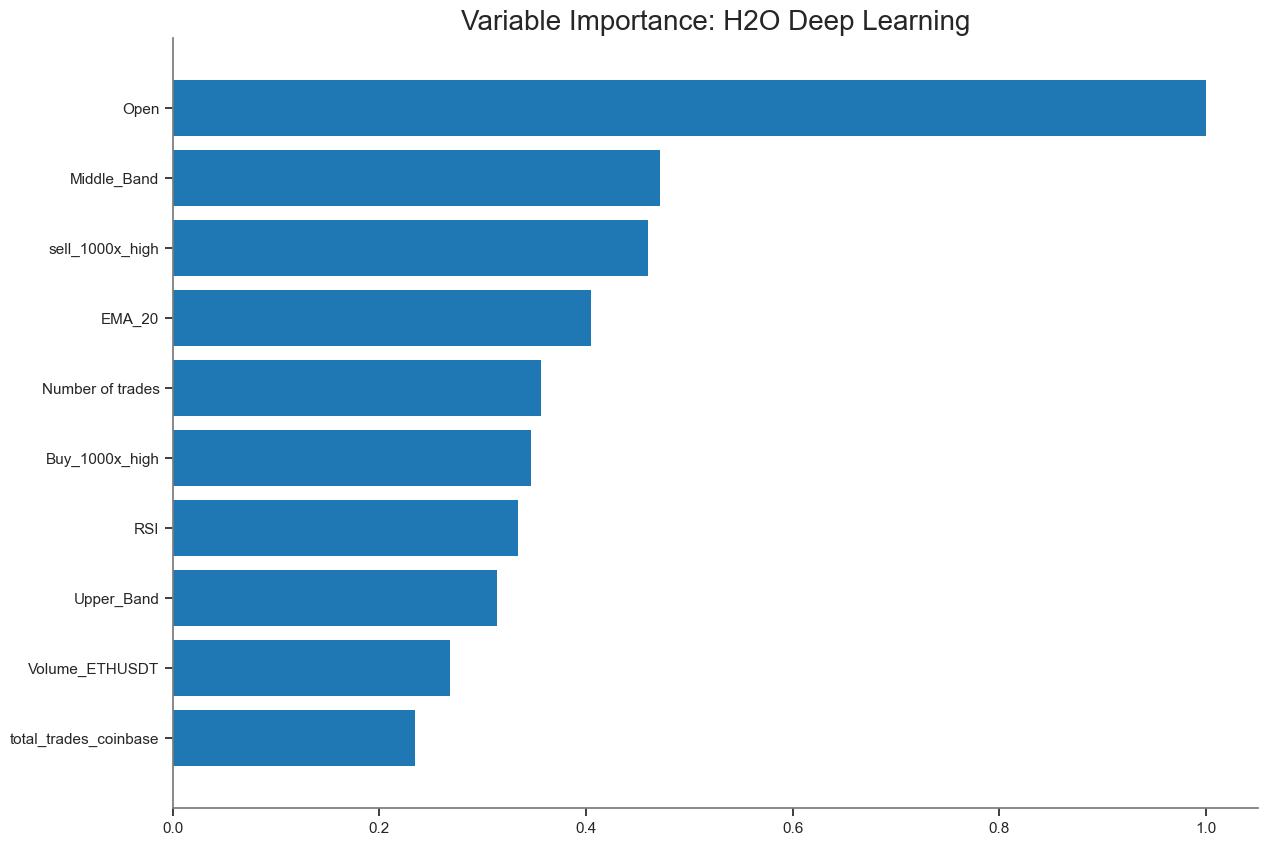

<Figure size 640x480 with 0 Axes>

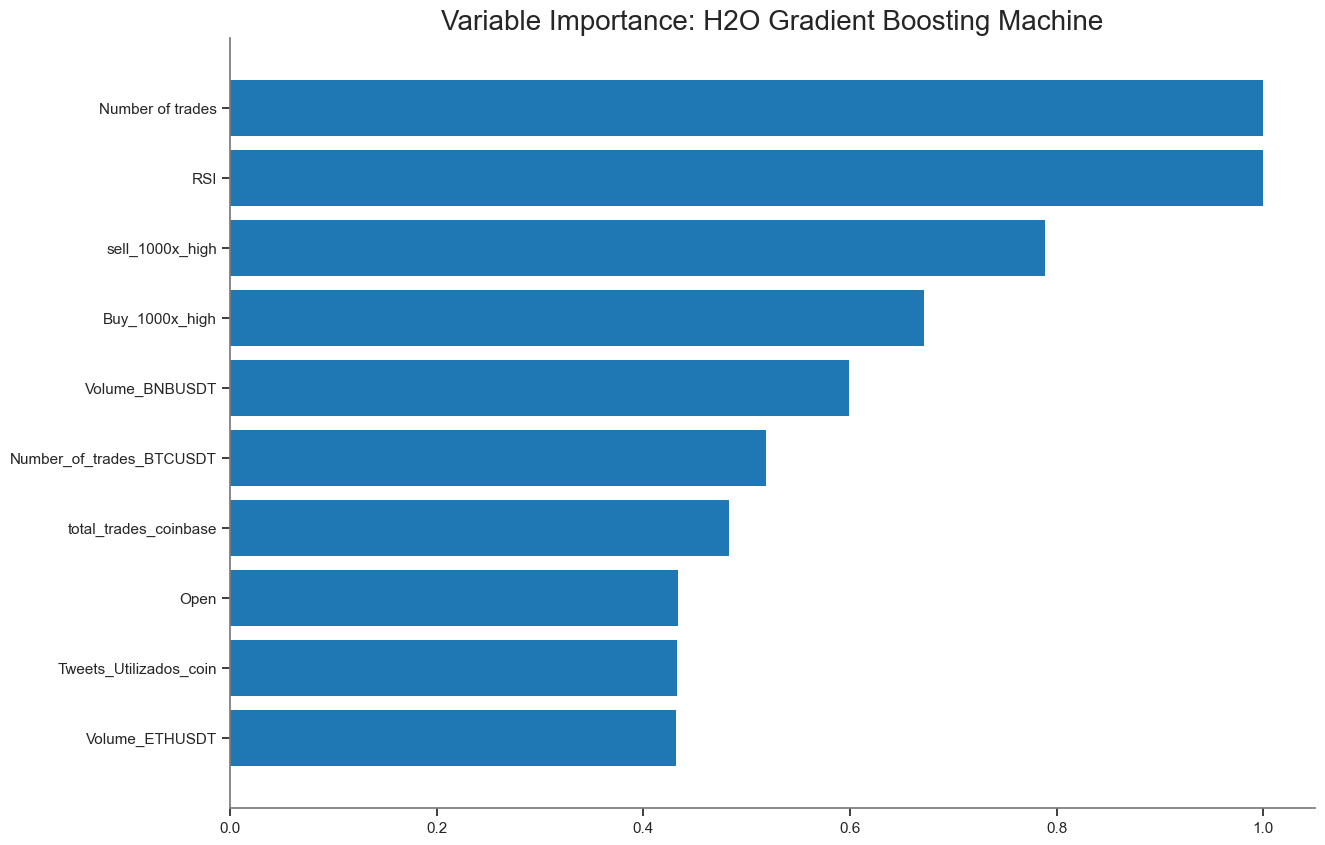

<Figure size 640x480 with 0 Axes>

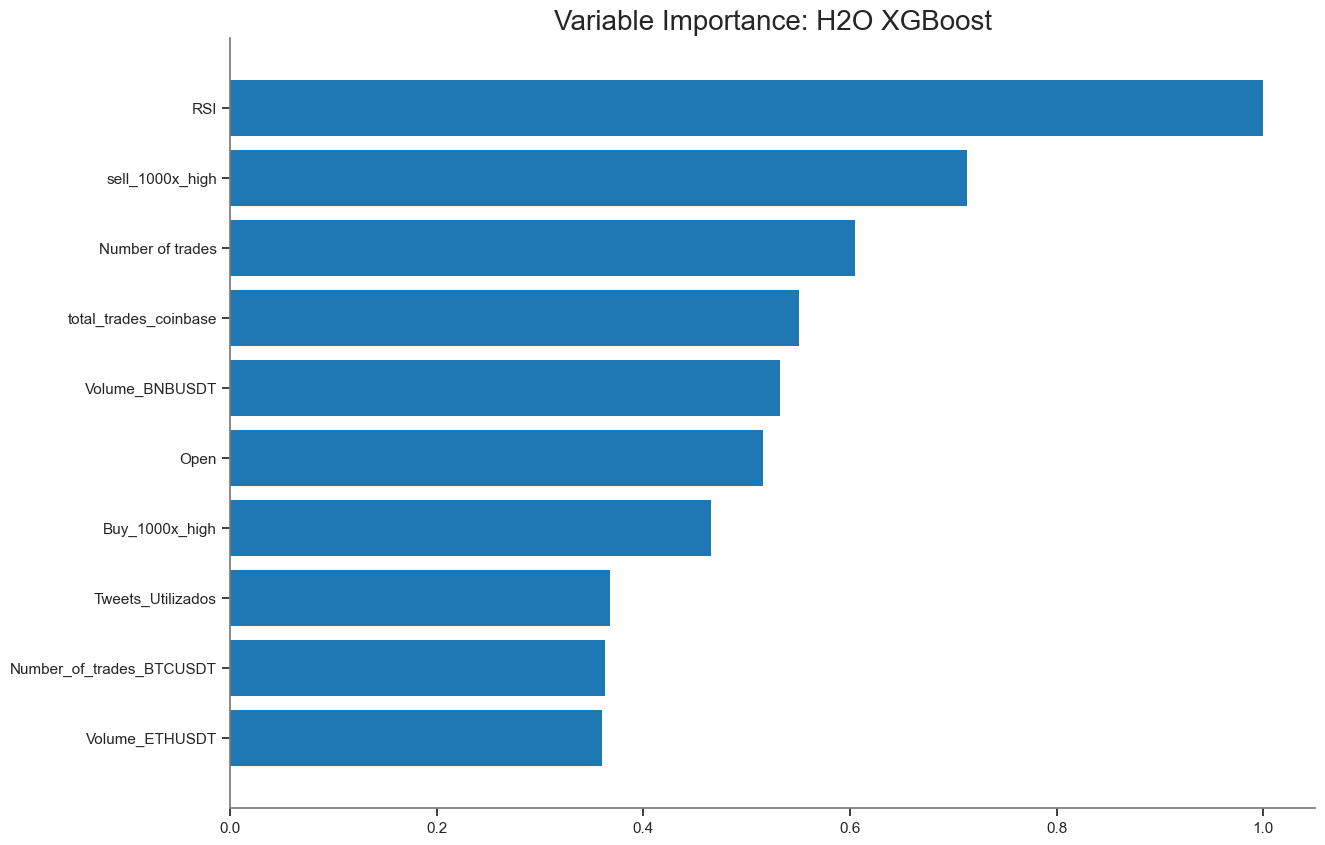

<Figure size 640x480 with 0 Axes>

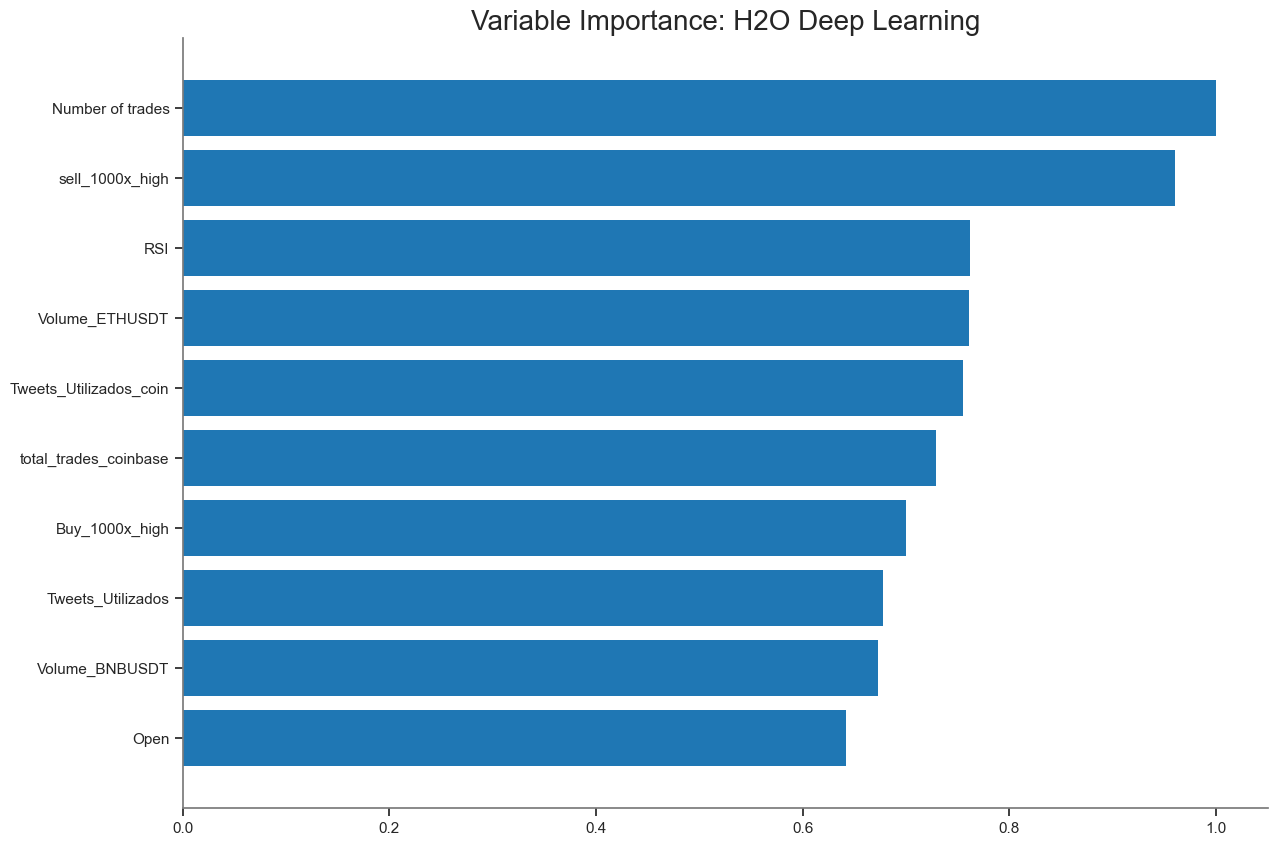

<Figure size 640x480 with 0 Axes>

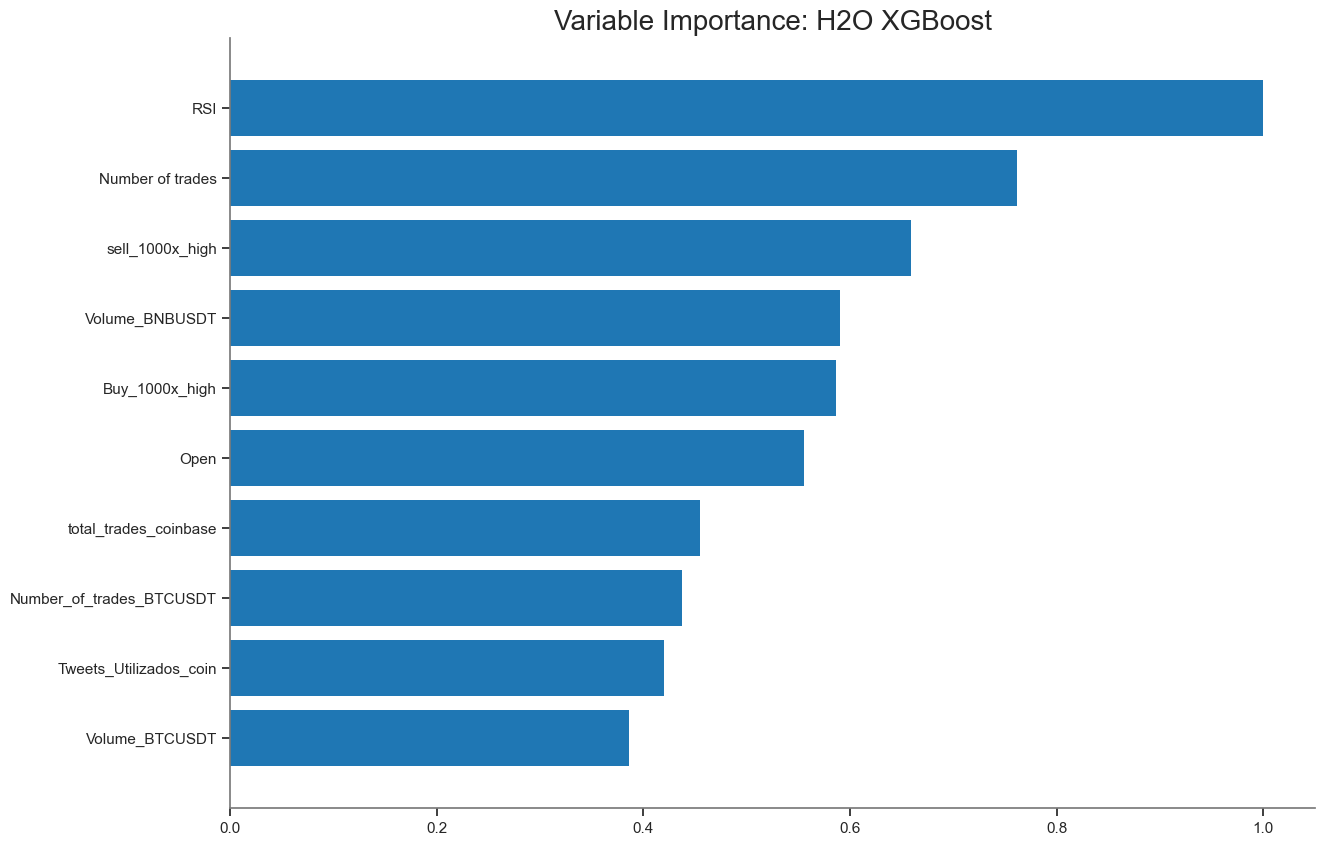

<Figure size 640x480 with 0 Axes>

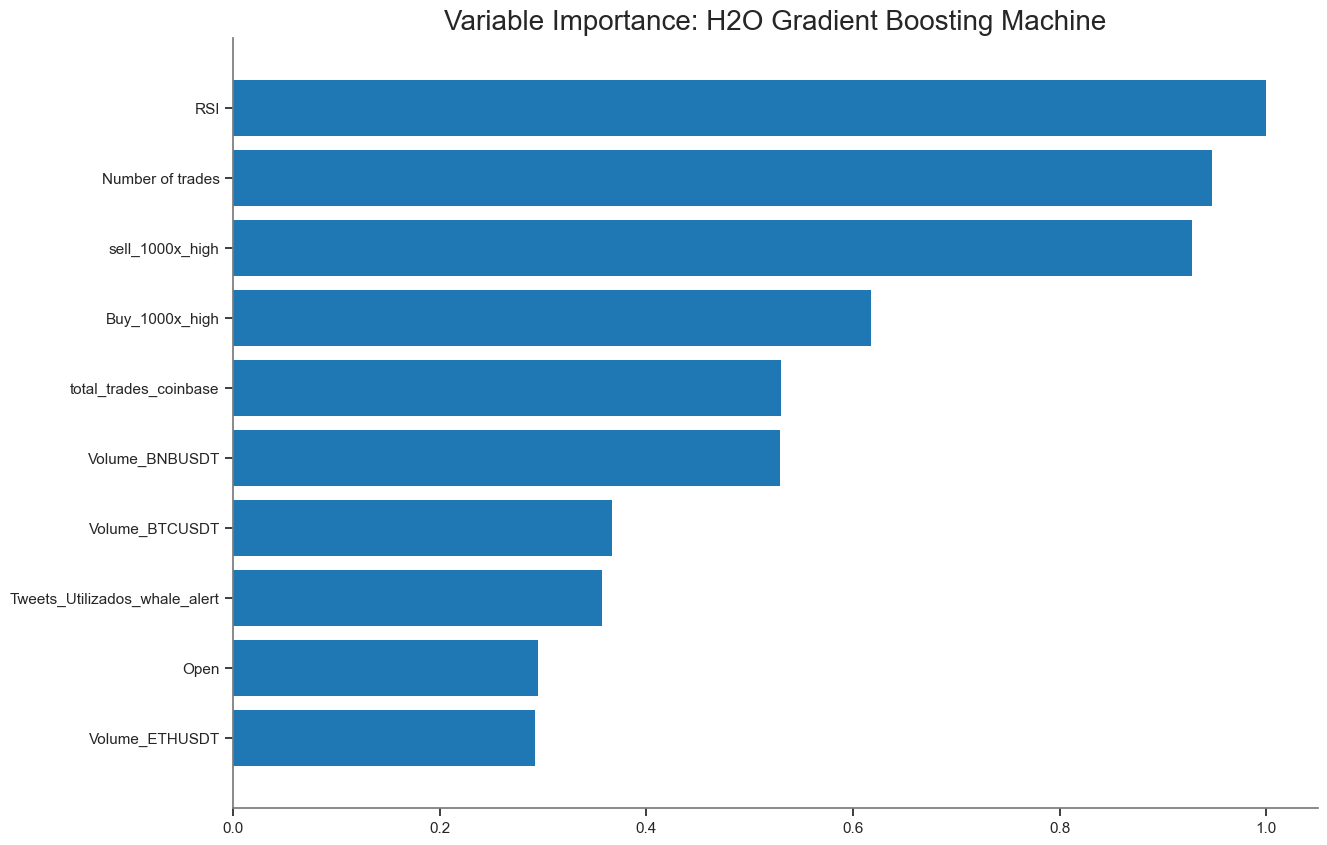

<Figure size 640x480 with 0 Axes>

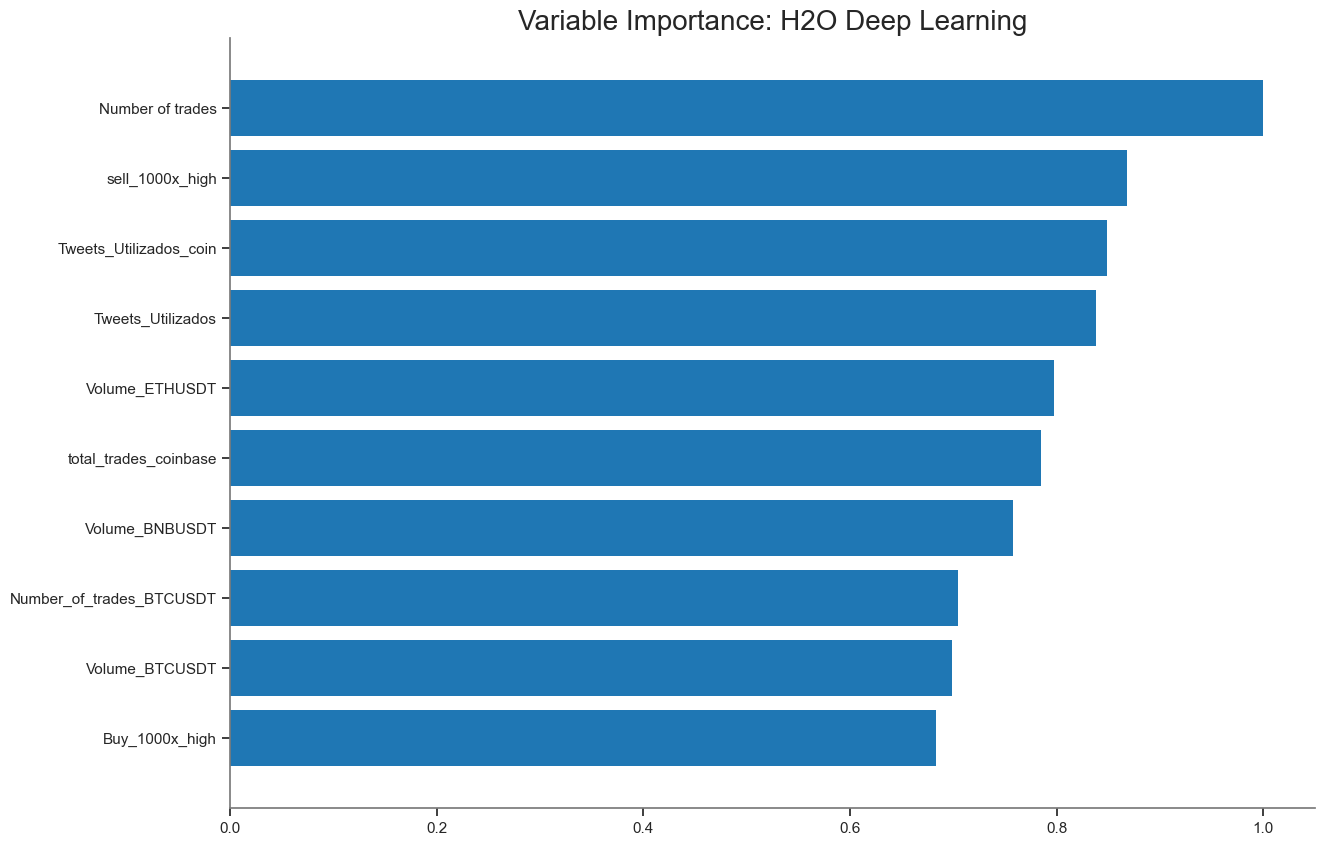

<Figure size 640x480 with 0 Axes>

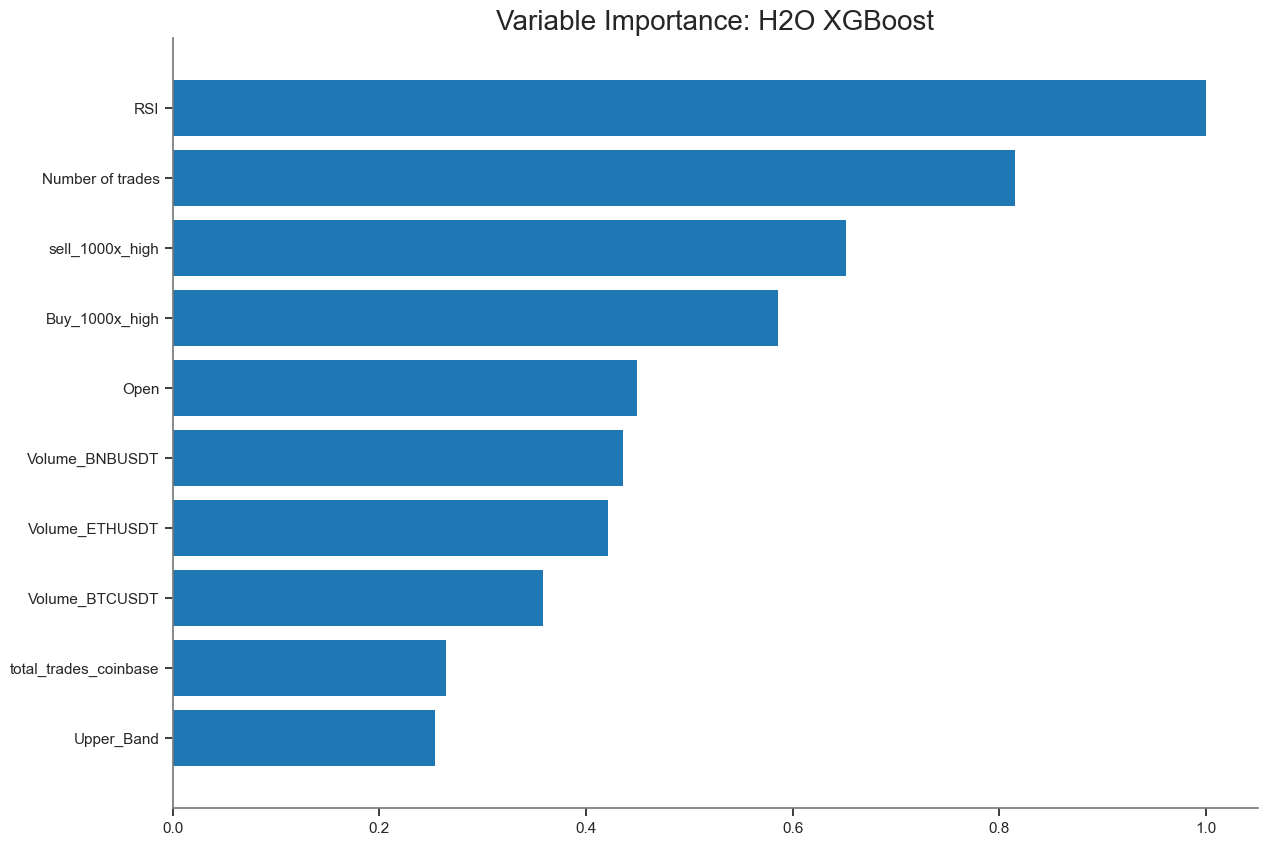

<Figure size 640x480 with 0 Axes>

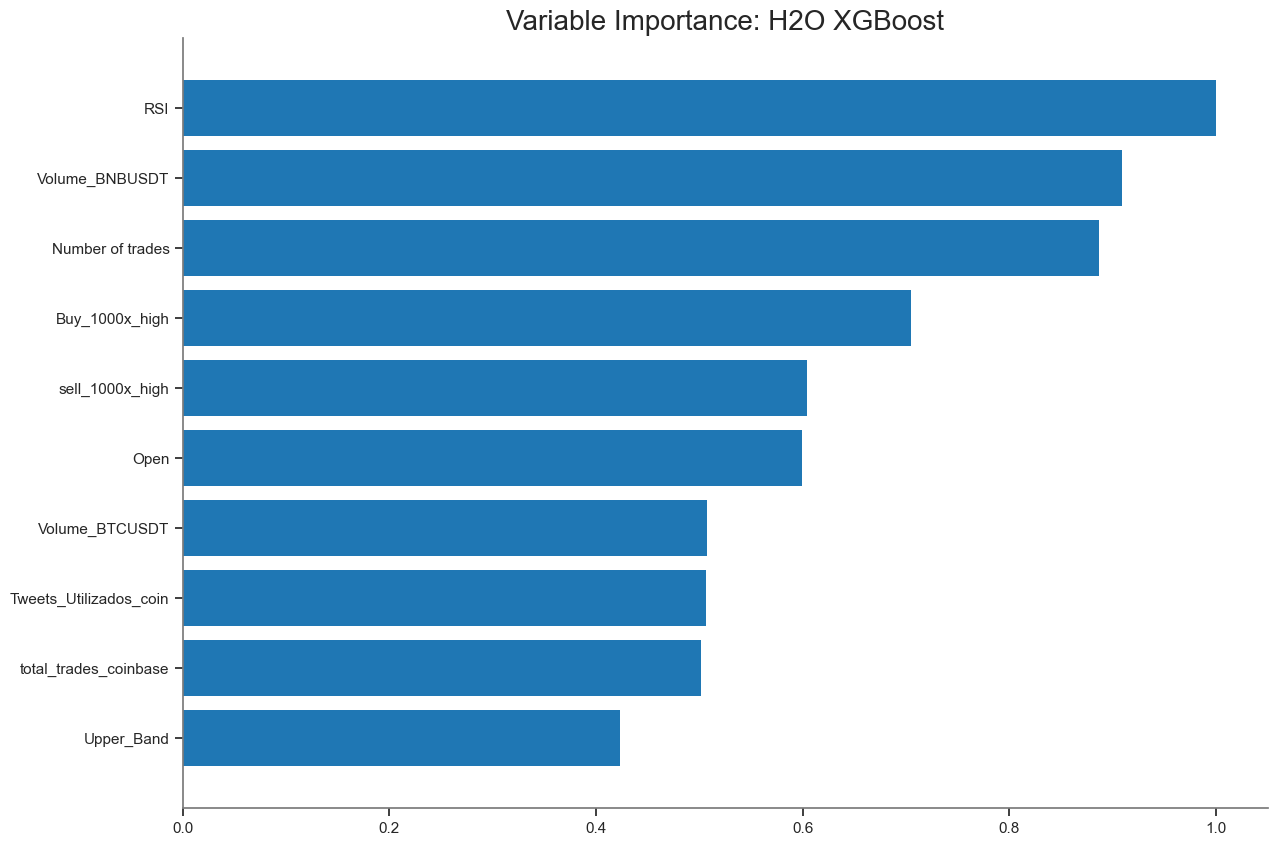

<Figure size 640x480 with 0 Axes>

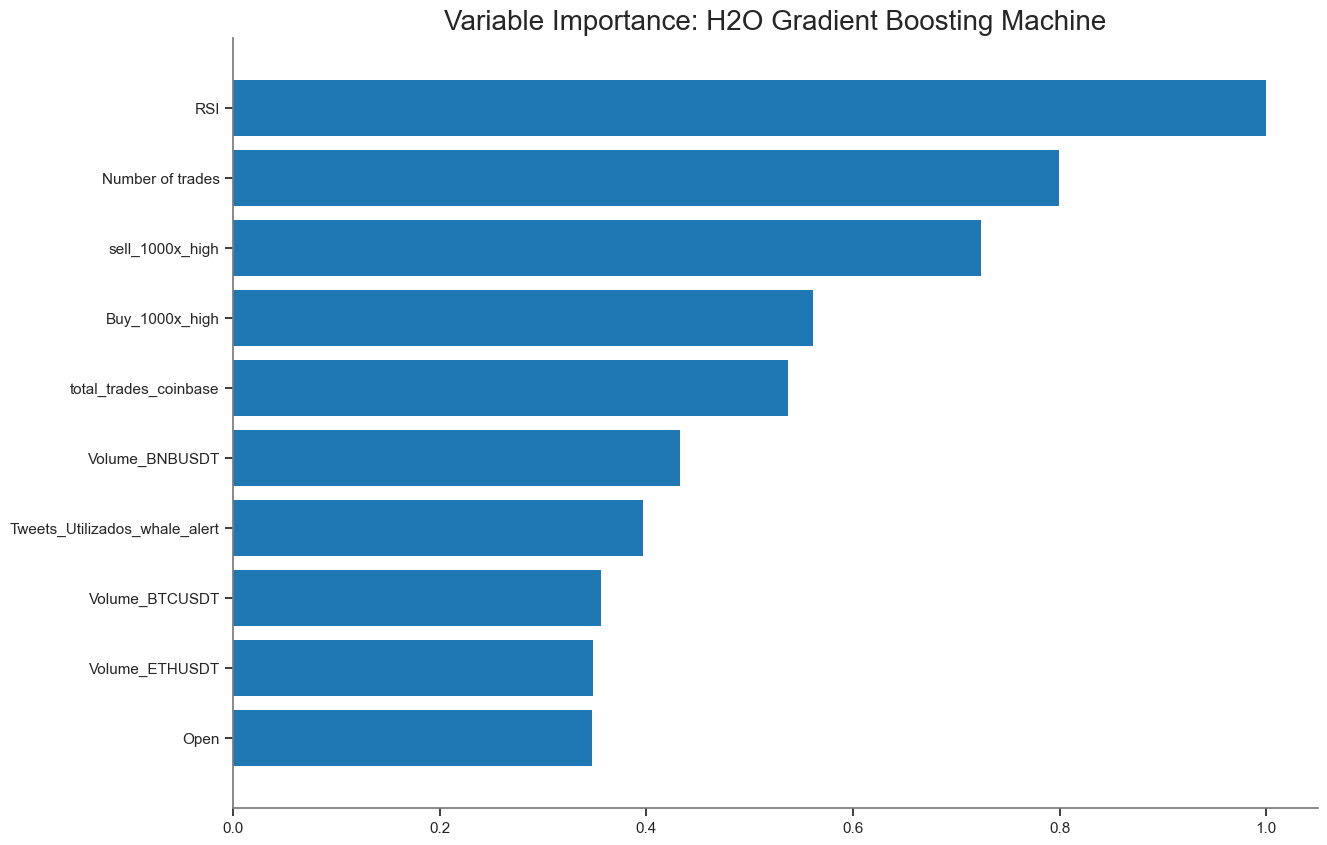

<Figure size 640x480 with 0 Axes>

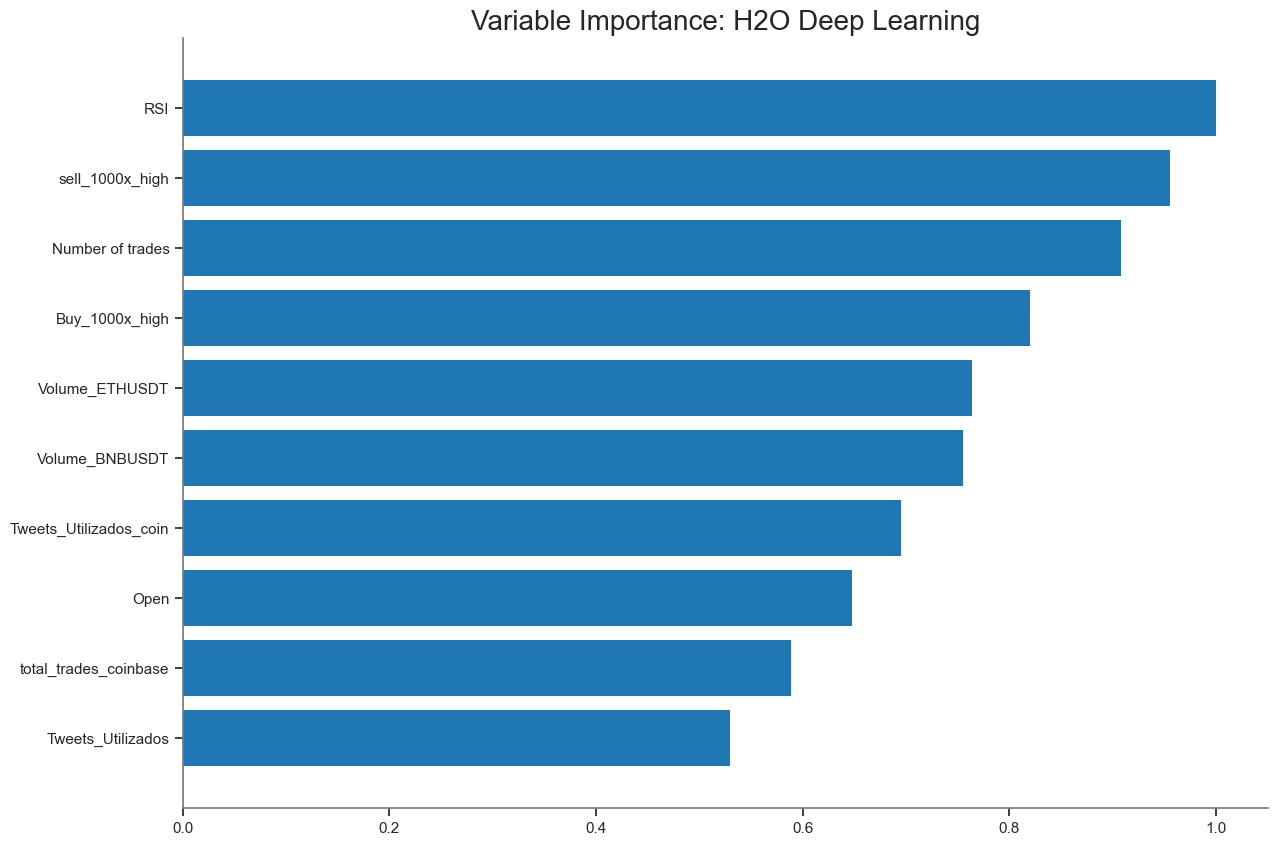

<Figure size 640x480 with 0 Axes>

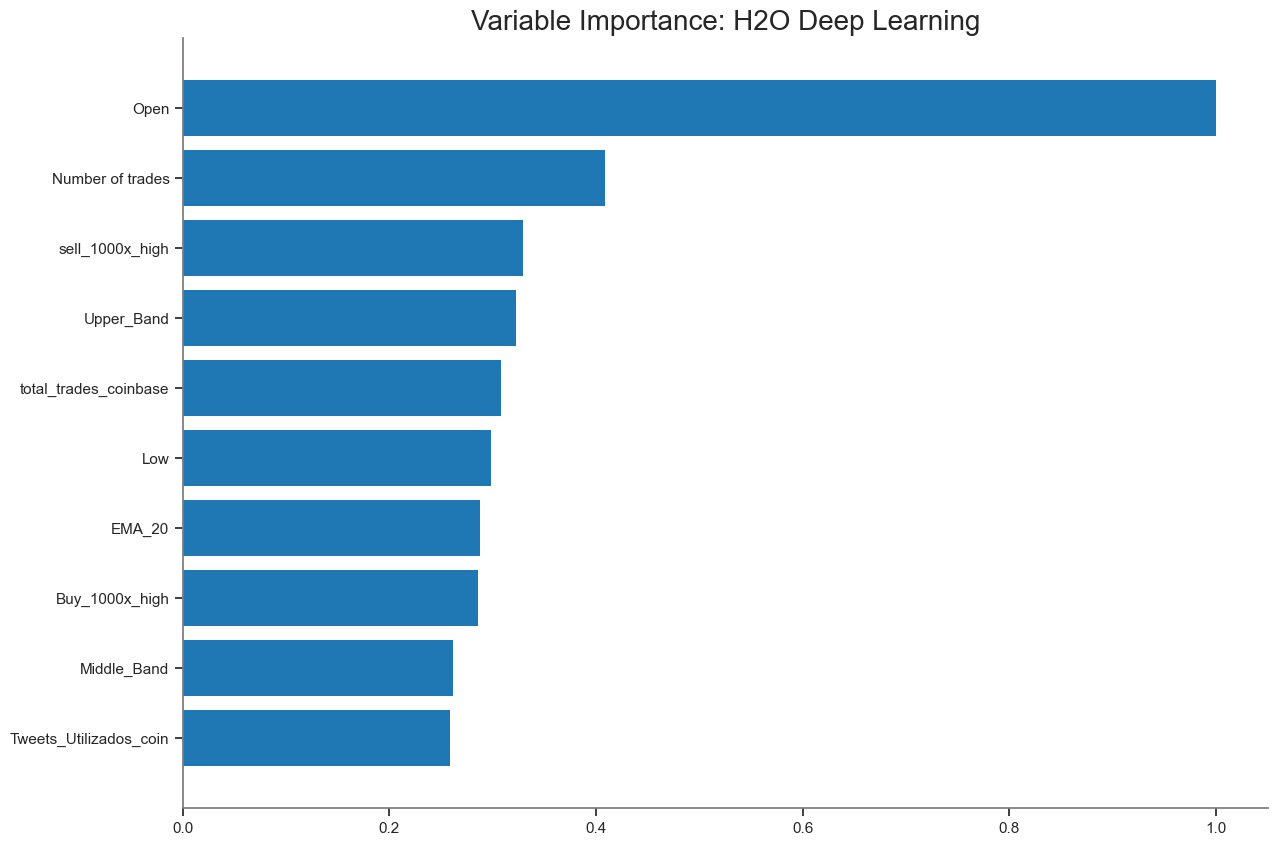

<Figure size 640x480 with 0 Axes>

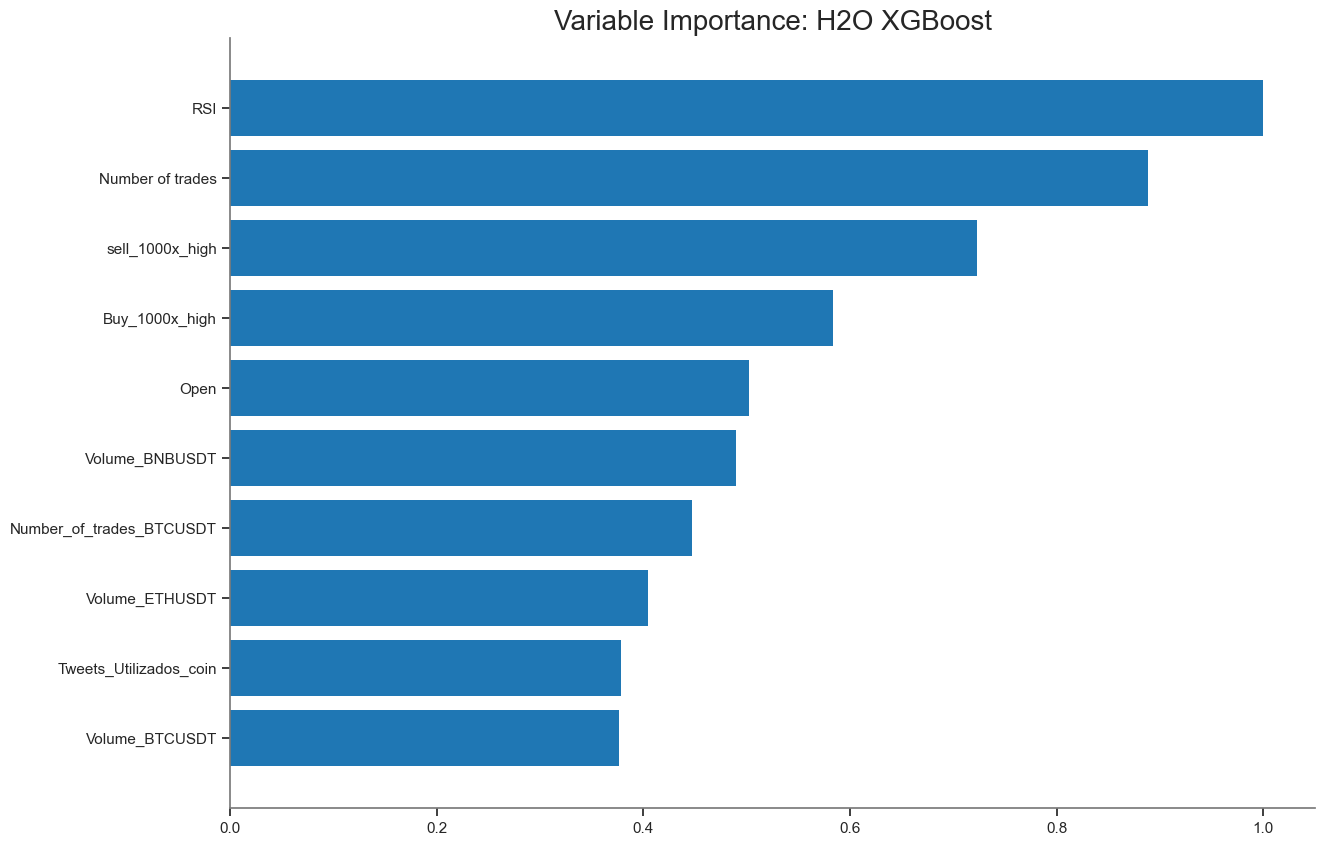

<Figure size 640x480 with 0 Axes>

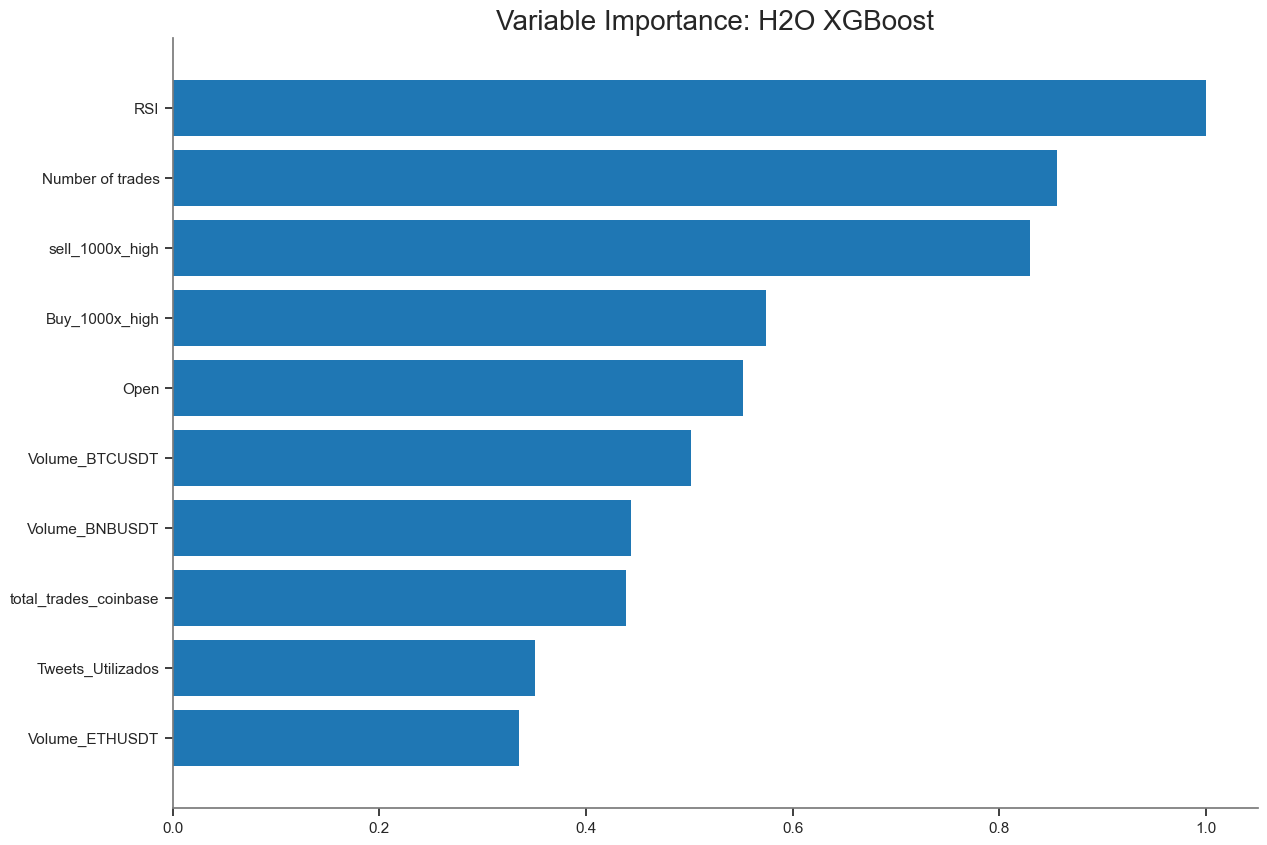

<Figure size 640x480 with 0 Axes>

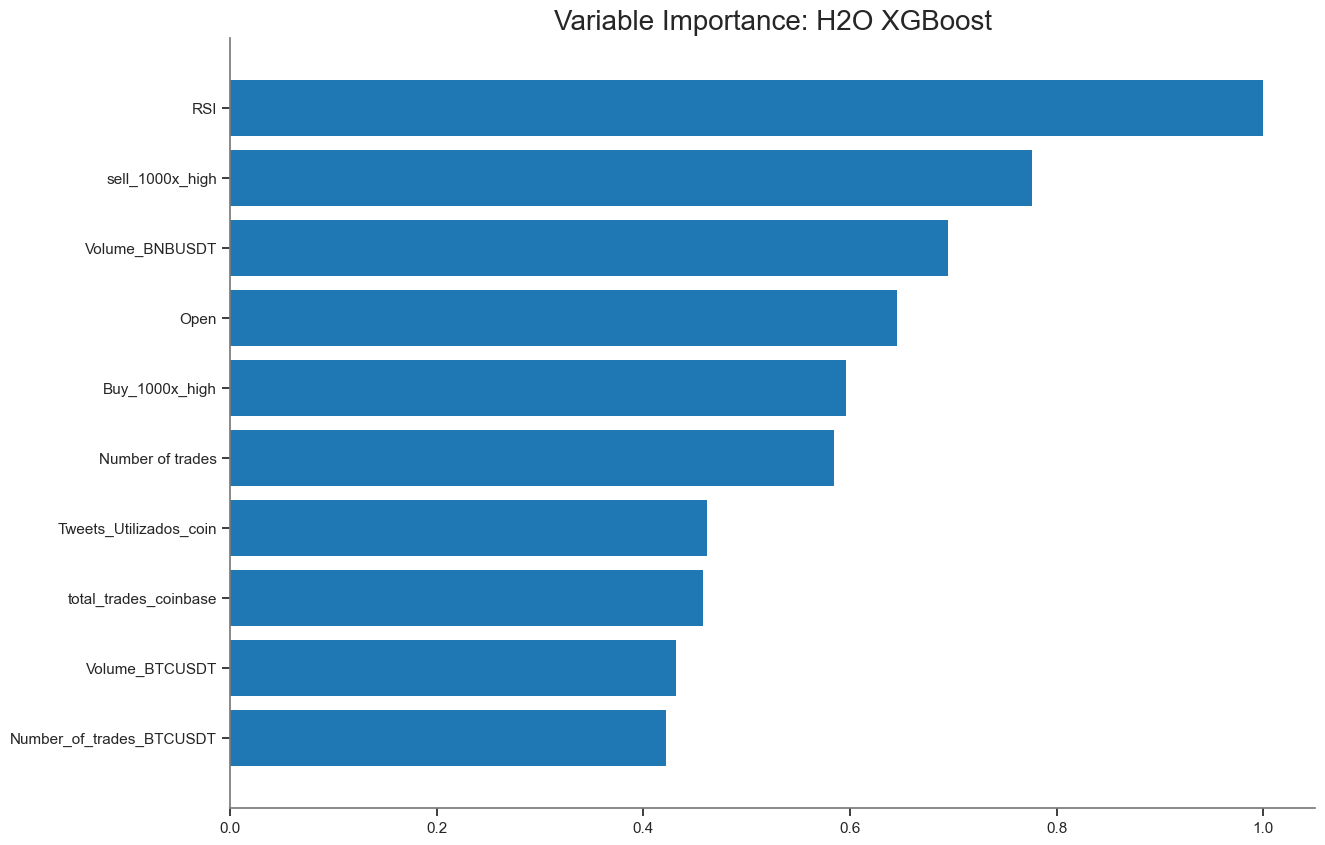

<Figure size 640x480 with 0 Axes>

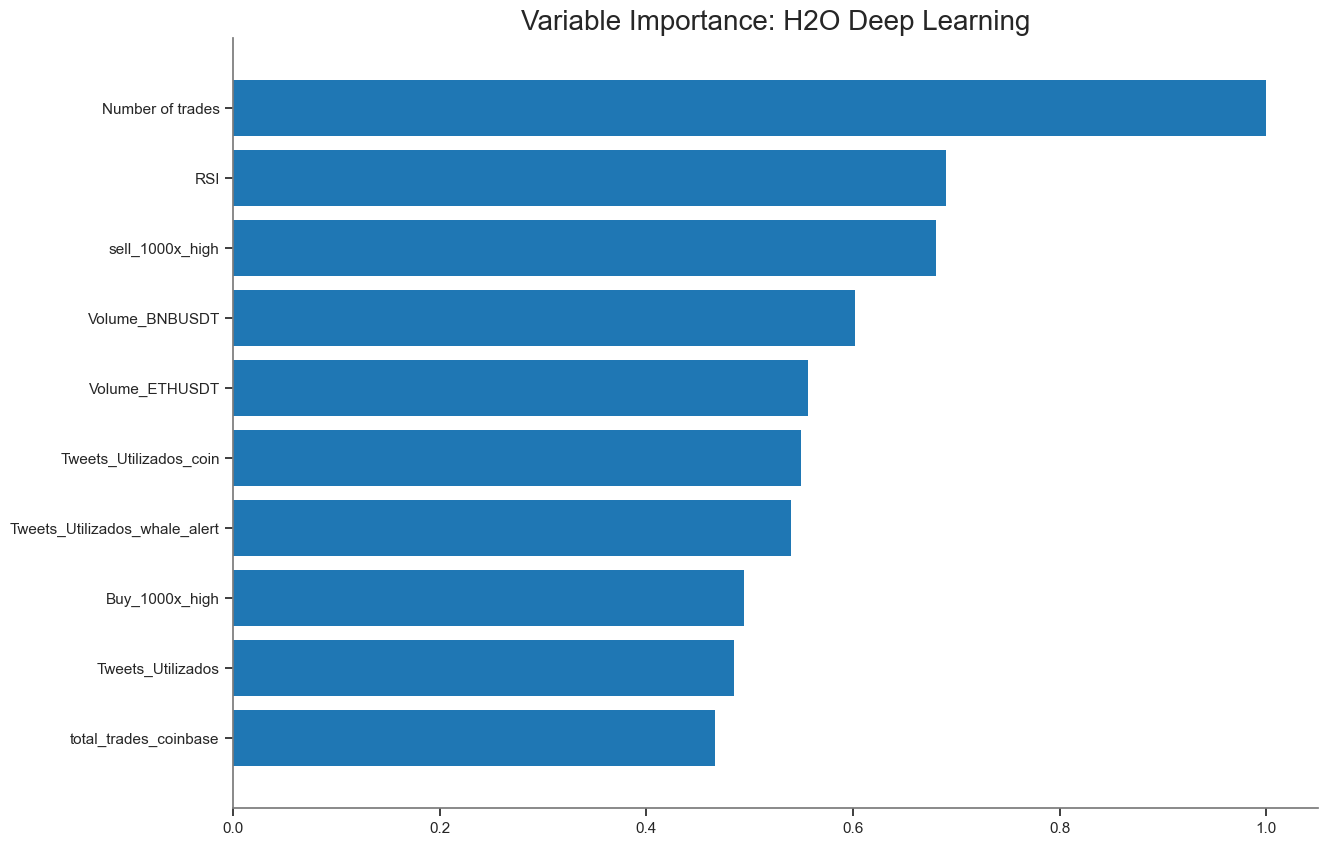

<Figure size 640x480 with 0 Axes>

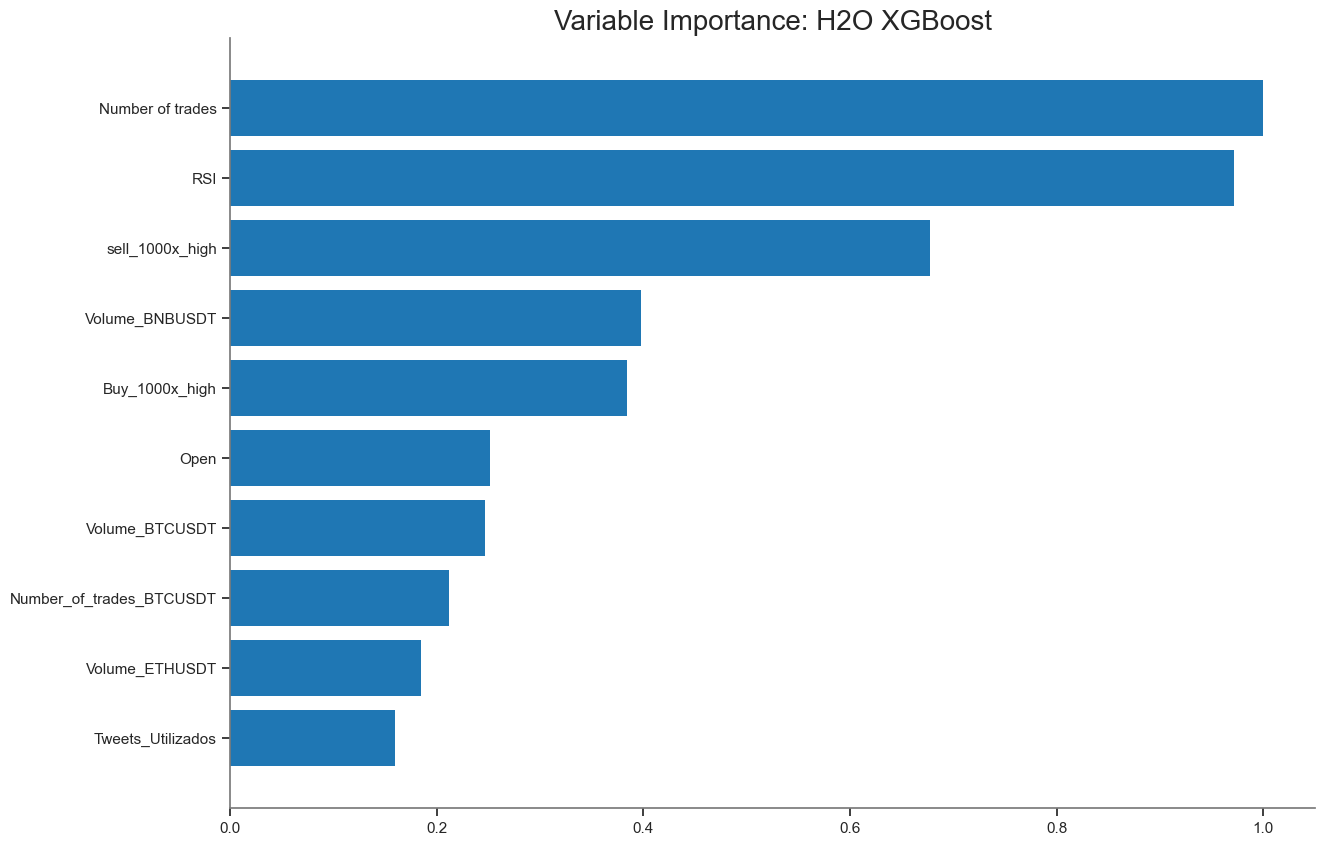

<Figure size 640x480 with 0 Axes>

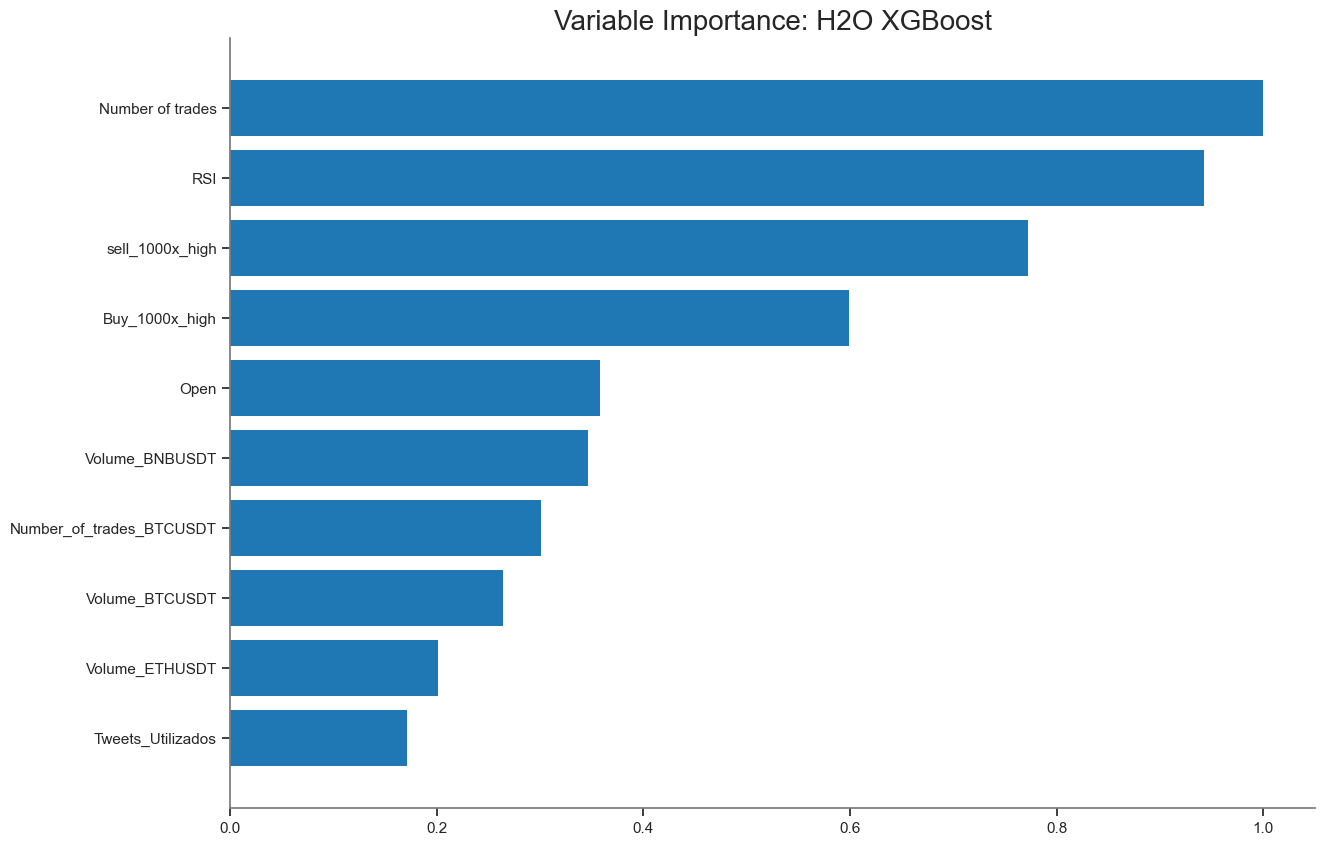

<Figure size 640x480 with 0 Axes>

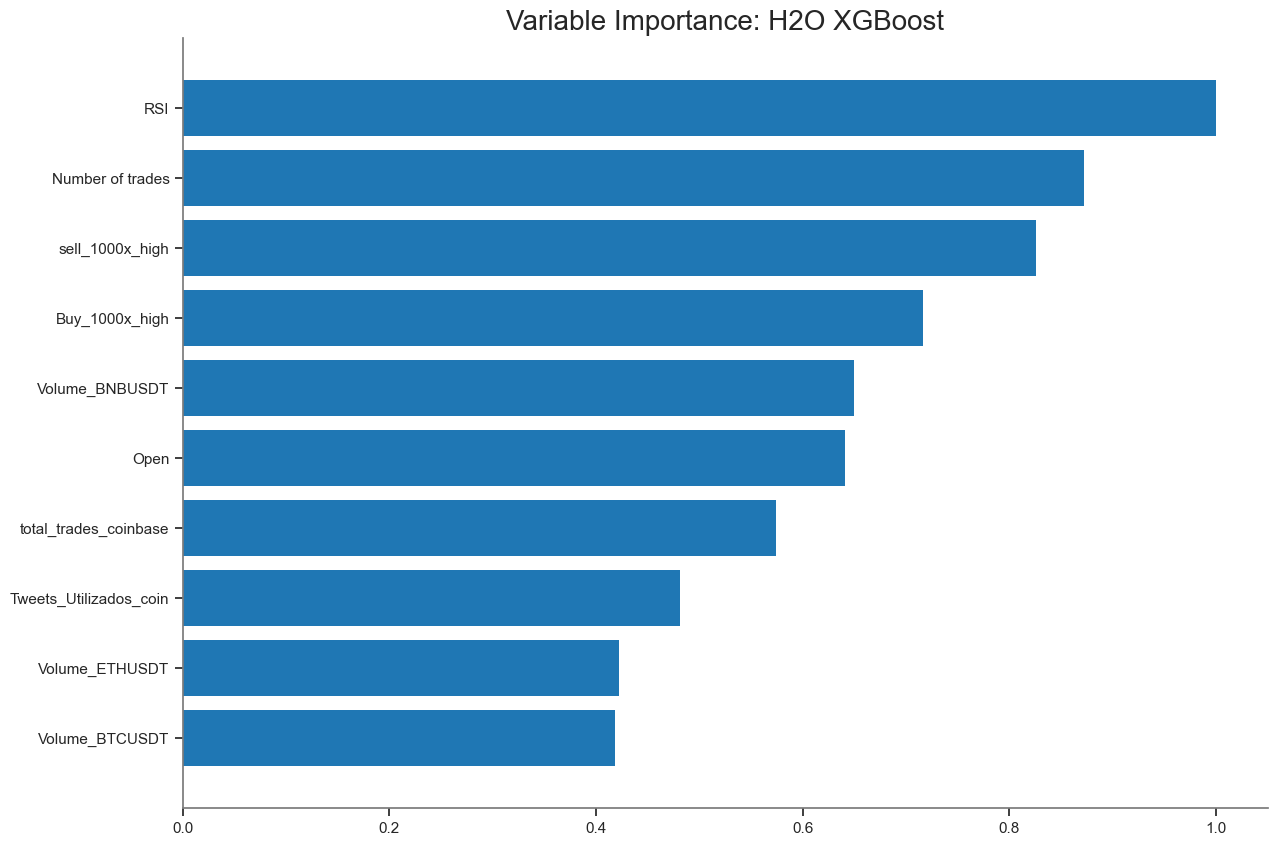

<Figure size 640x480 with 0 Axes>

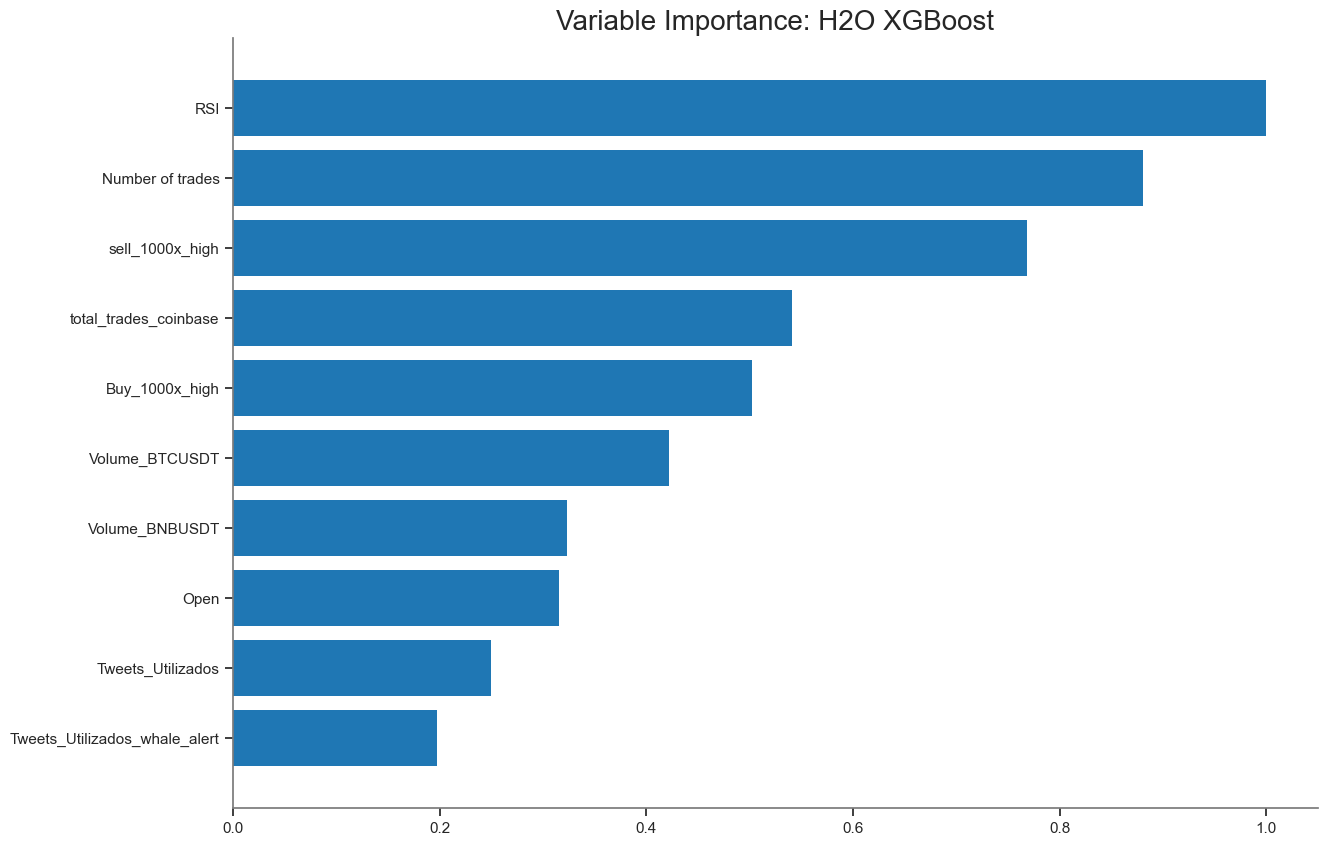

<Figure size 640x480 with 0 Axes>

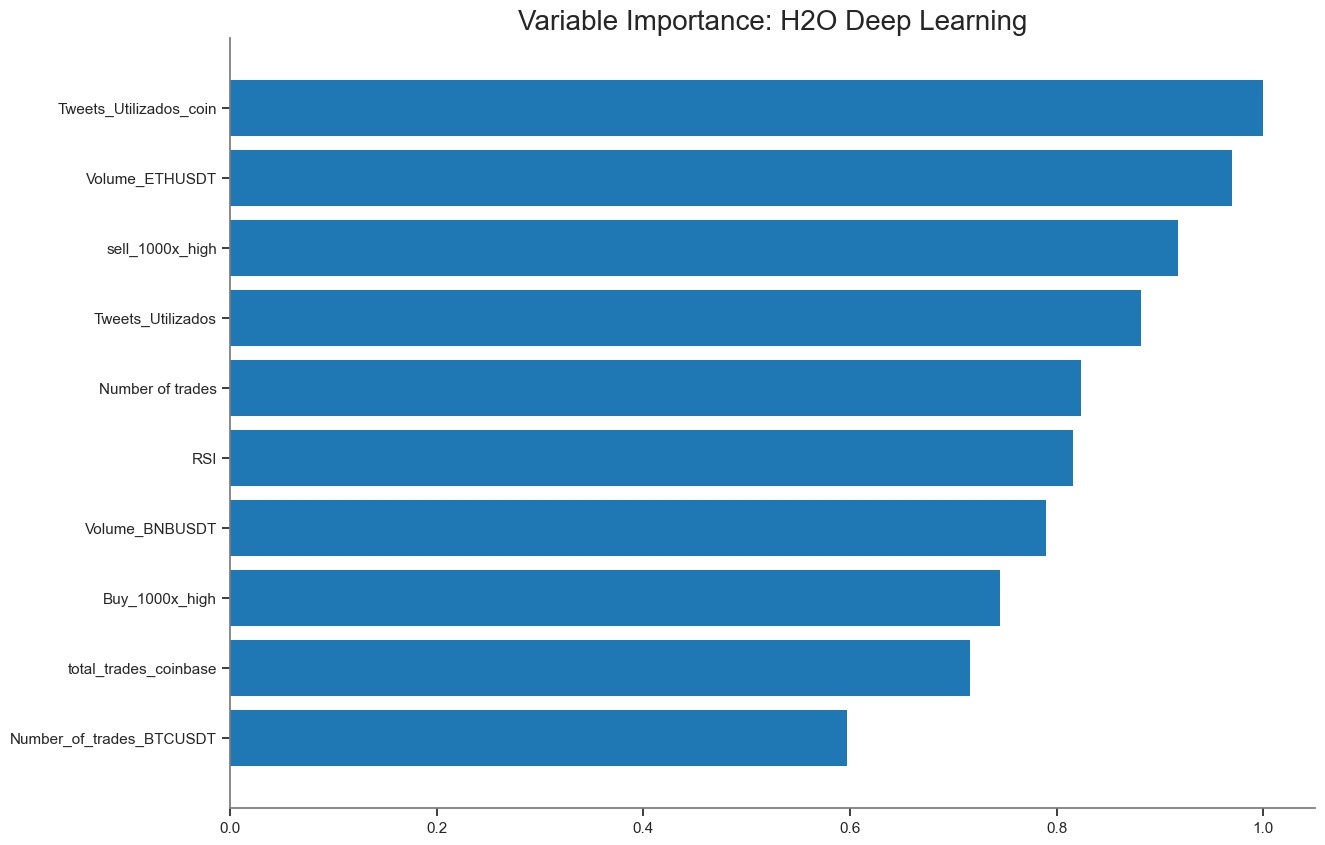

<Figure size 640x480 with 0 Axes>

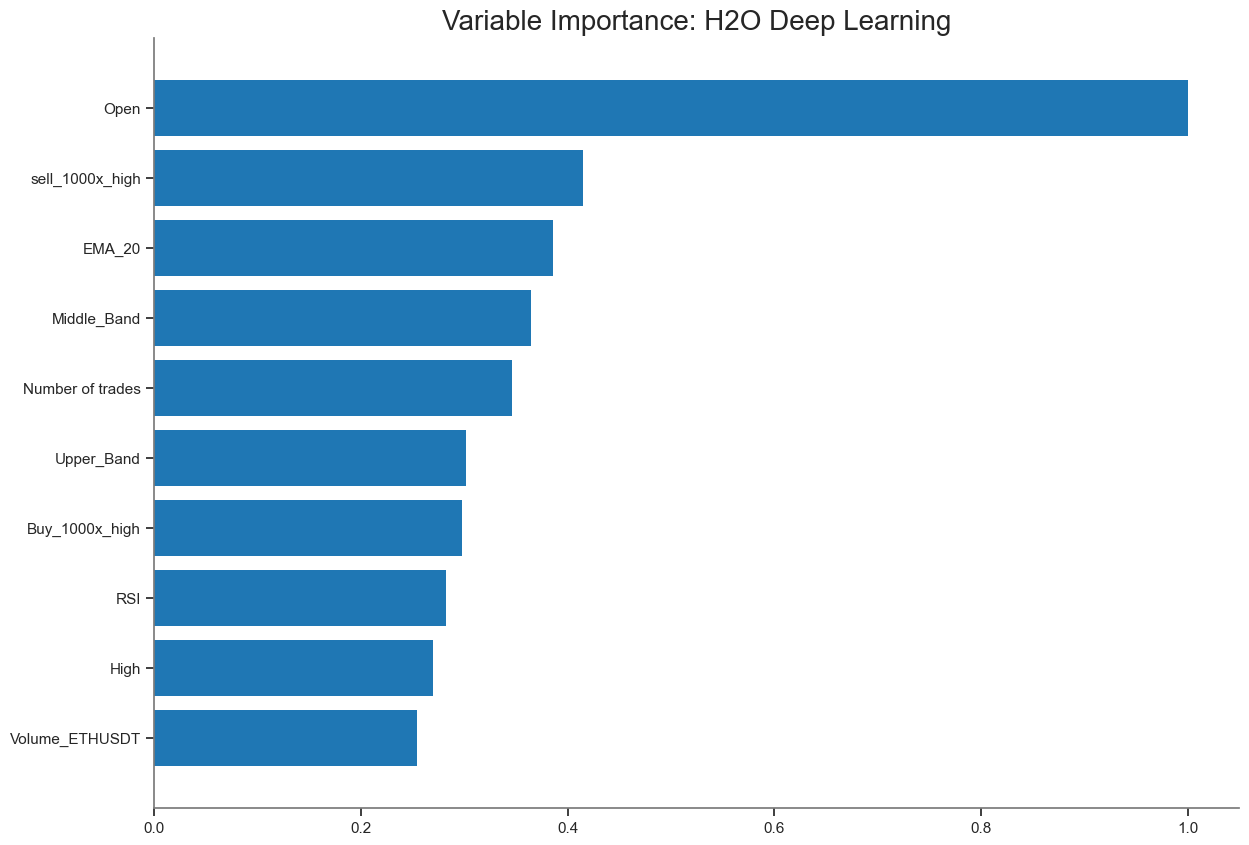

<Figure size 640x480 with 0 Axes>

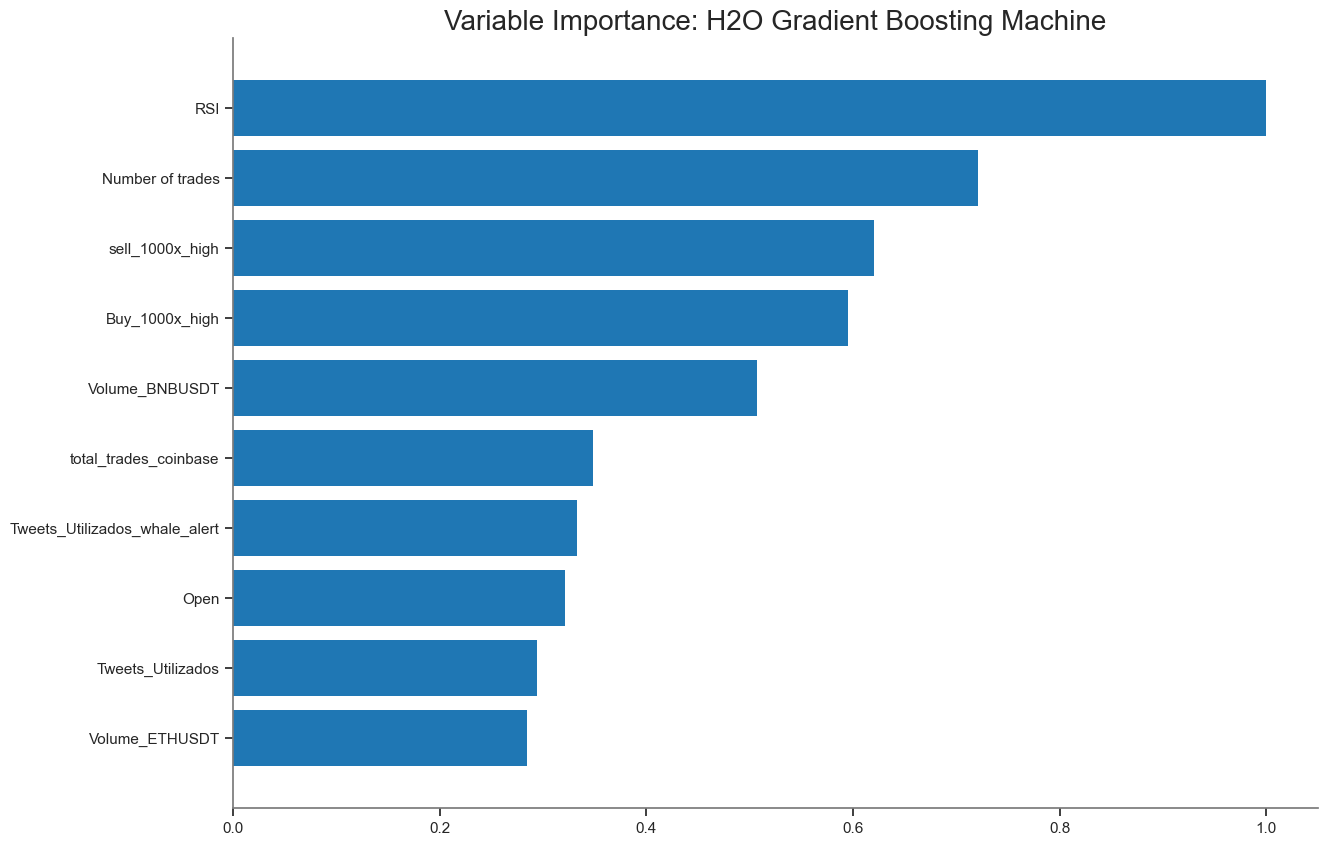

<Figure size 640x480 with 0 Axes>

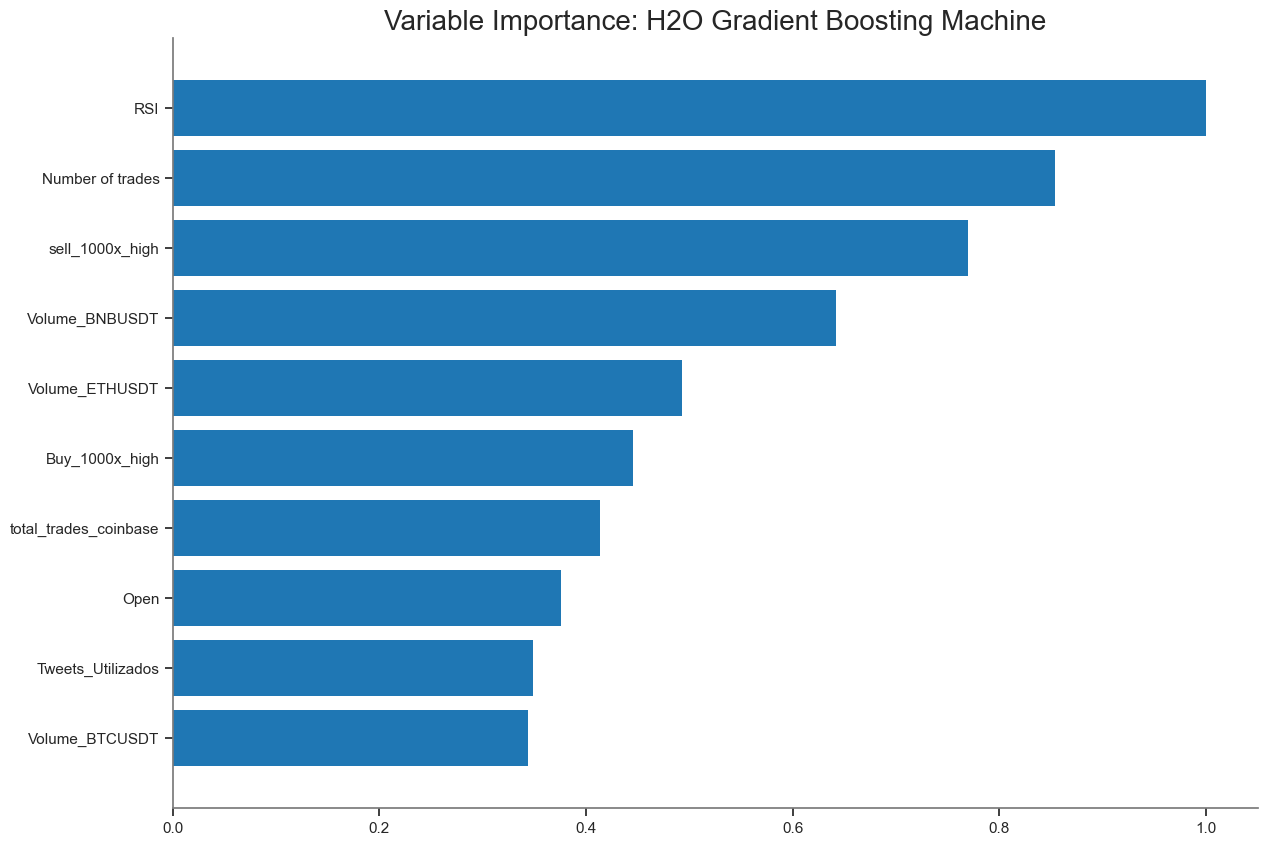

<Figure size 640x480 with 0 Axes>

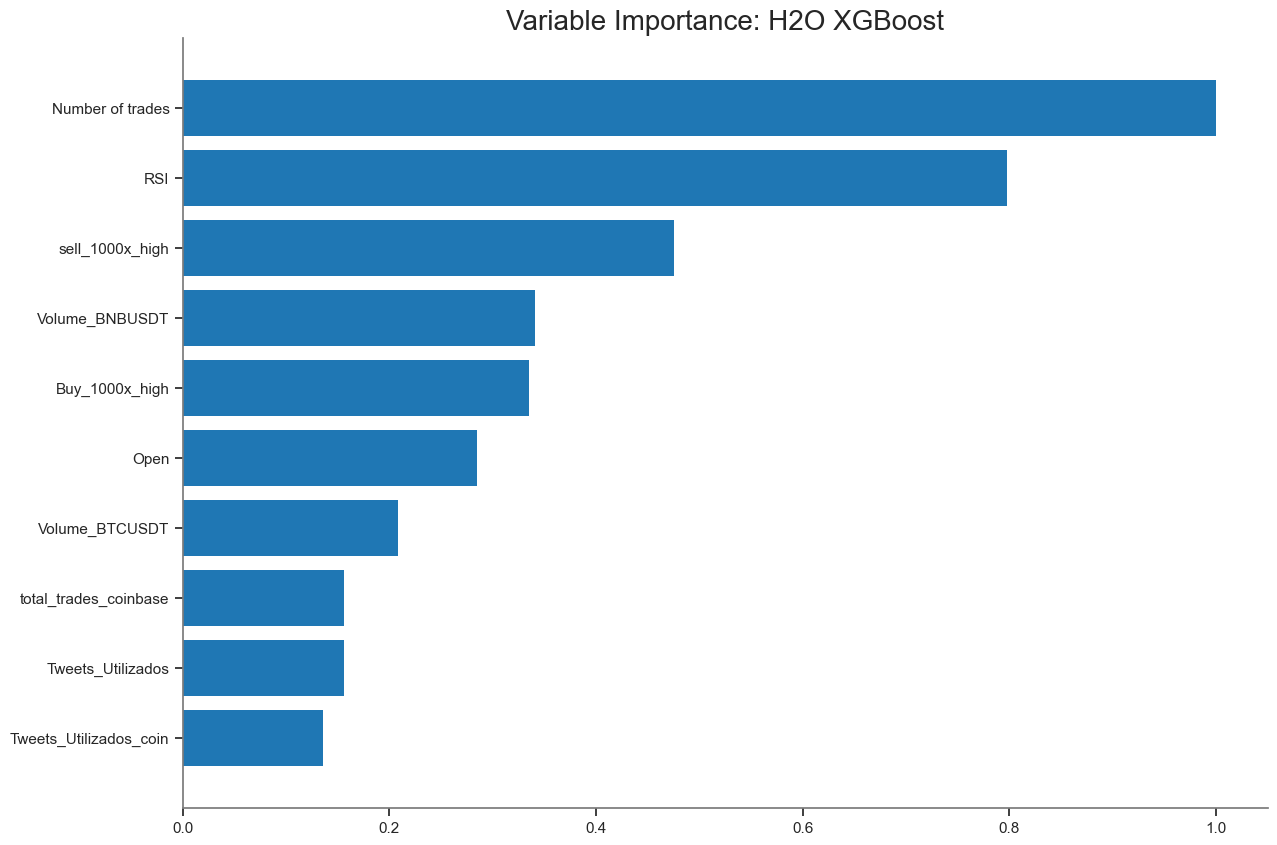

<Figure size 640x480 with 0 Axes>

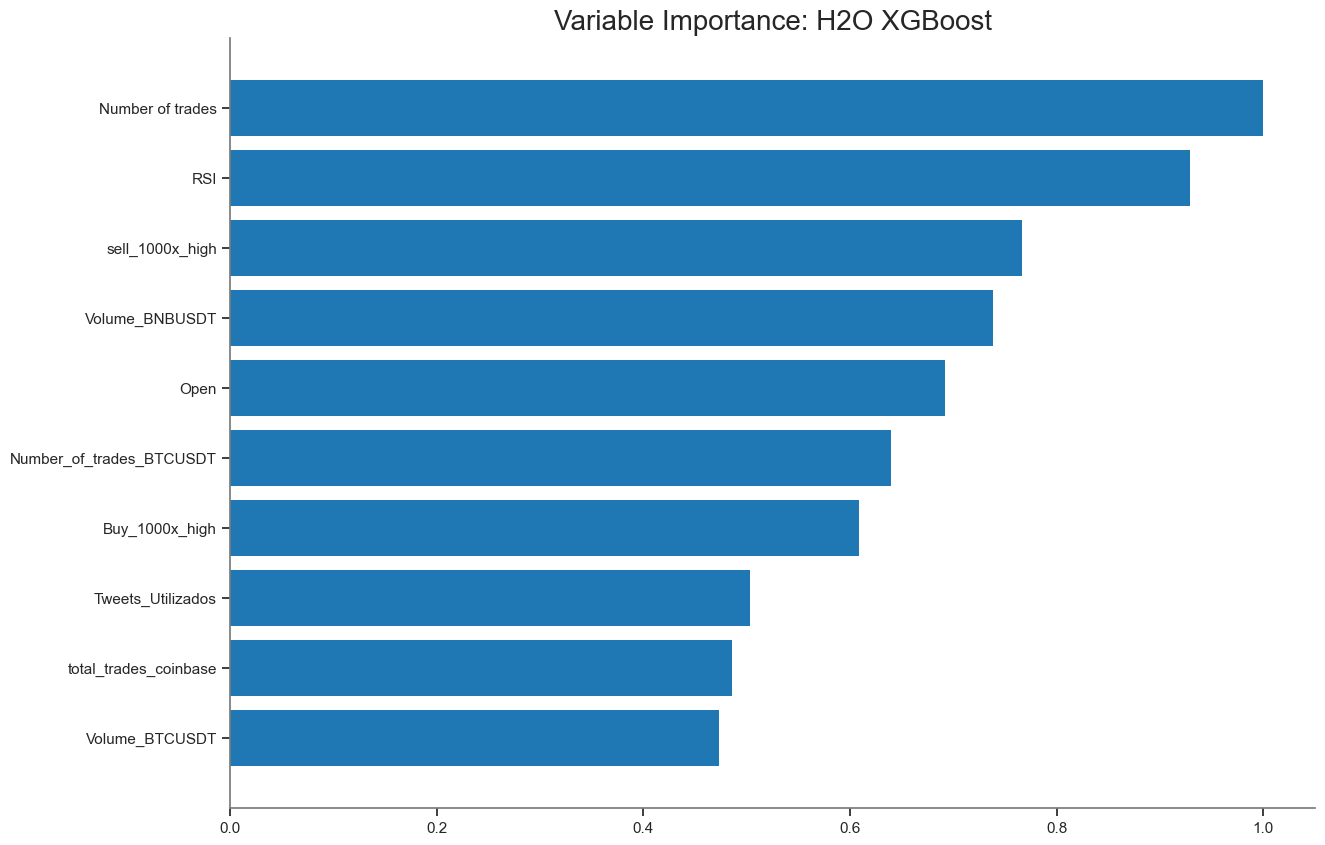

<Figure size 640x480 with 0 Axes>

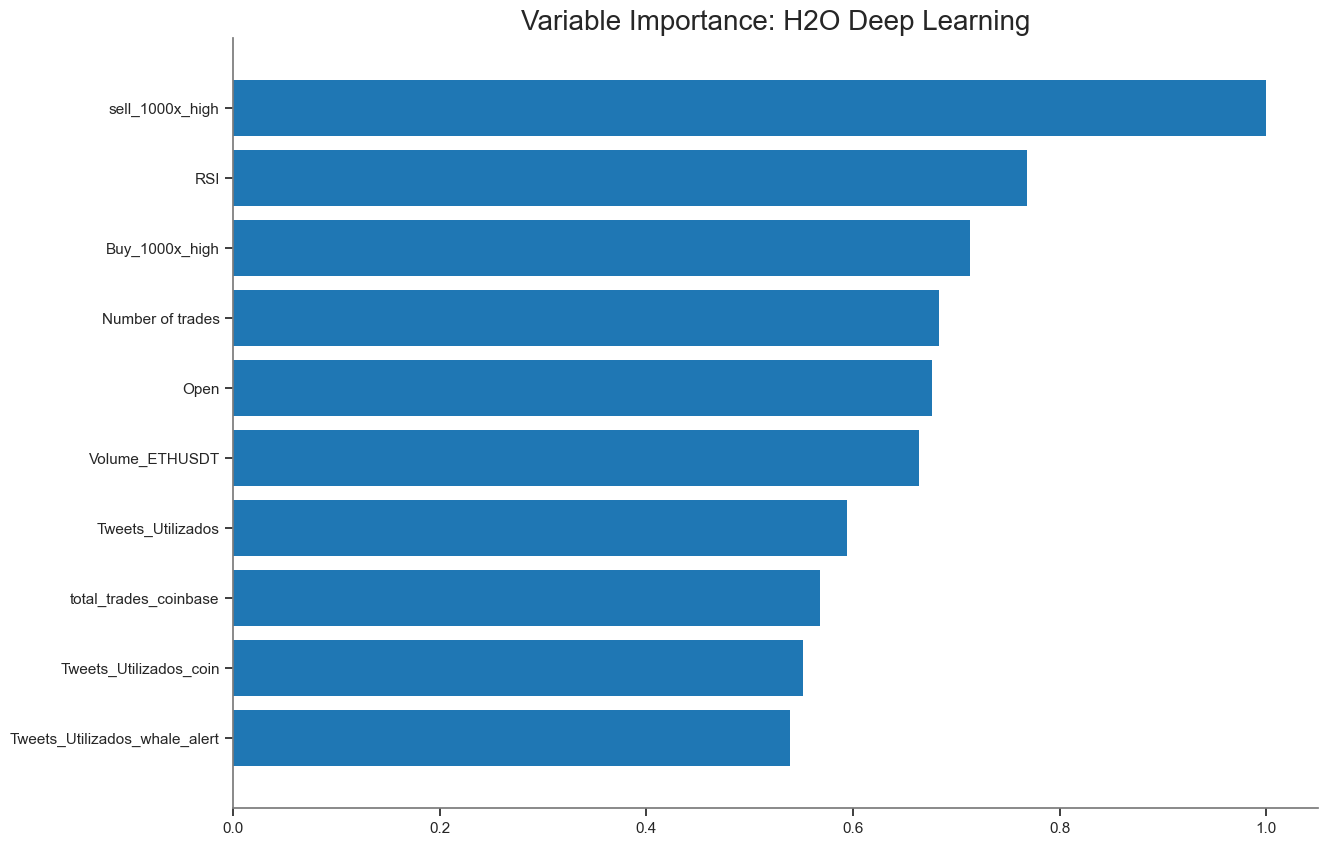

<Figure size 640x480 with 0 Axes>

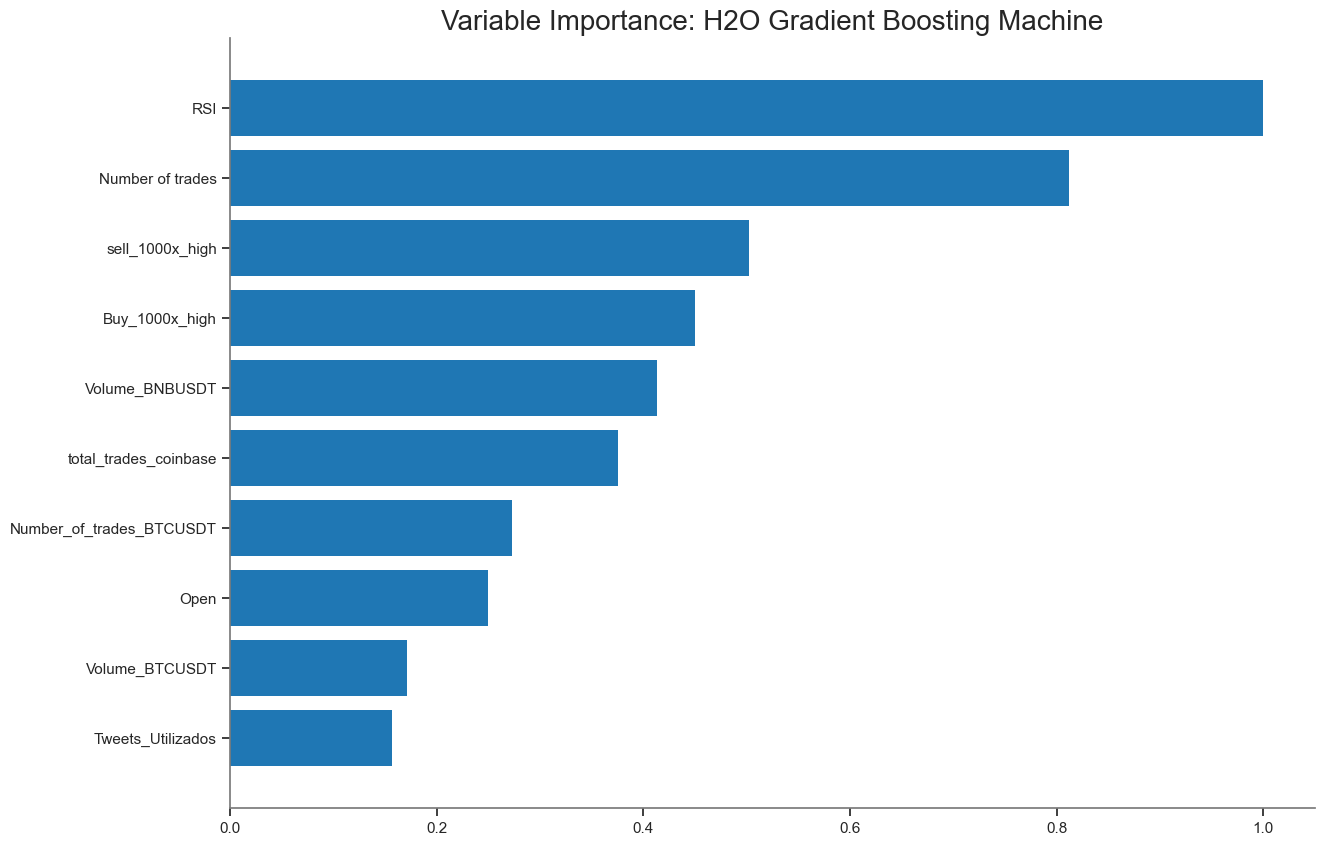

<Figure size 640x480 with 0 Axes>

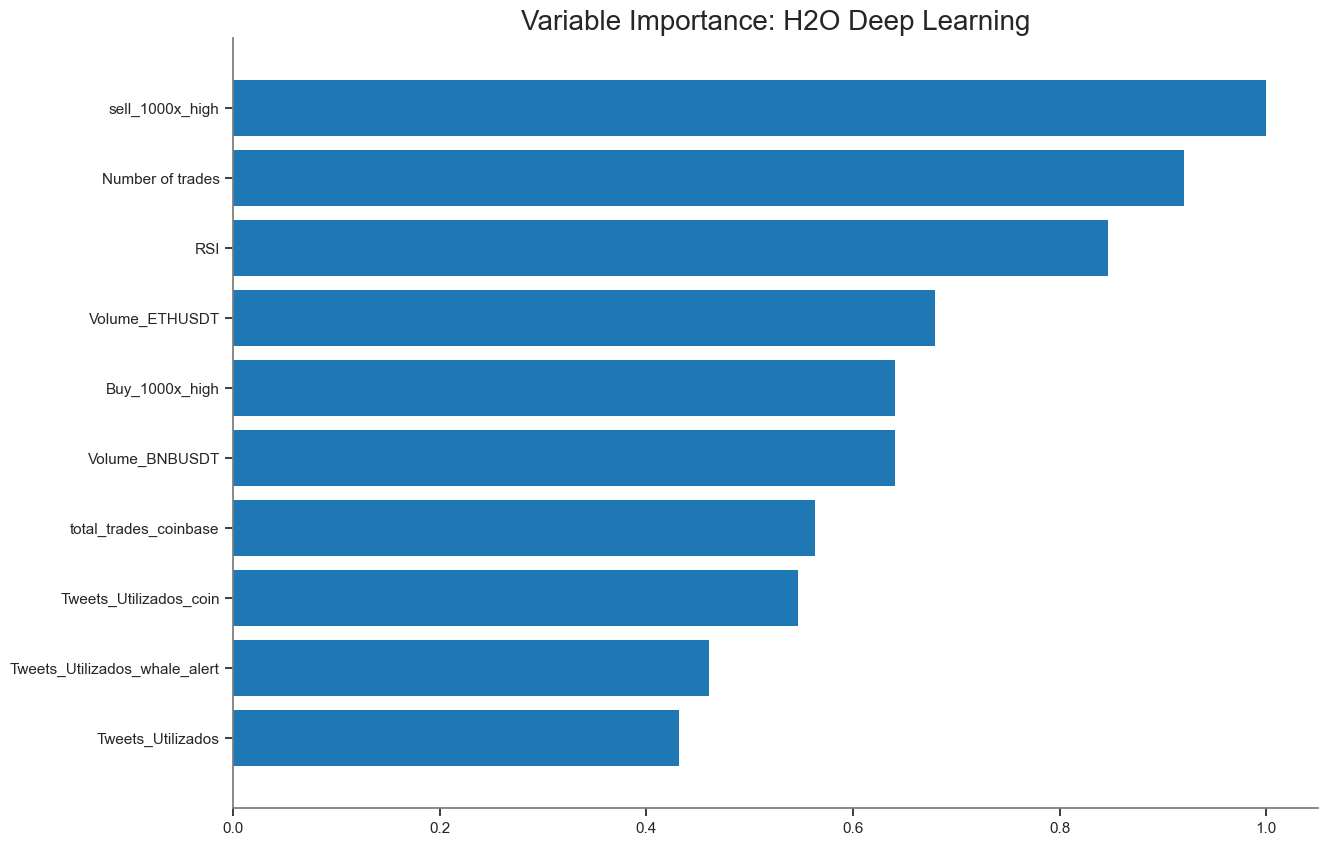

<Figure size 640x480 with 0 Axes>

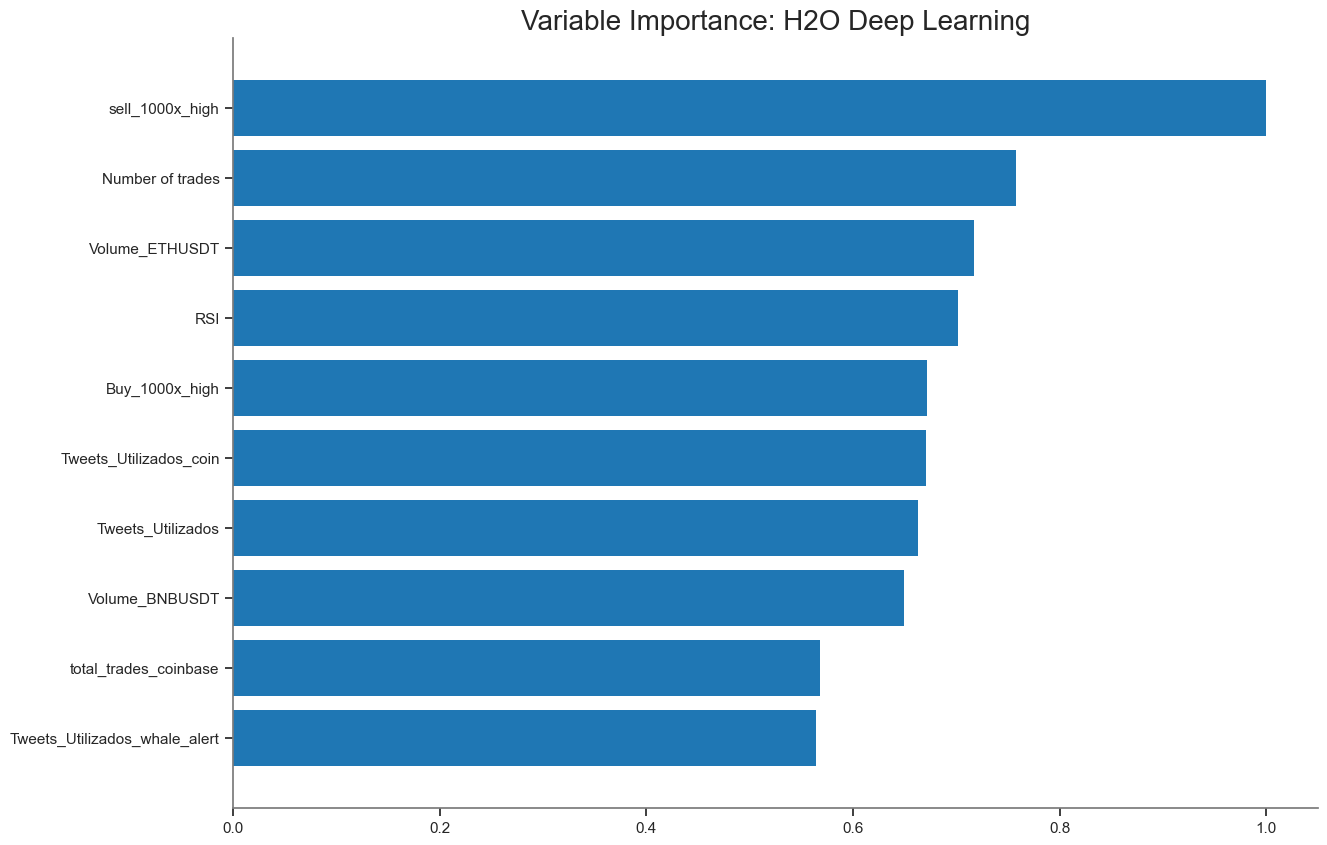

<Figure size 640x480 with 0 Axes>

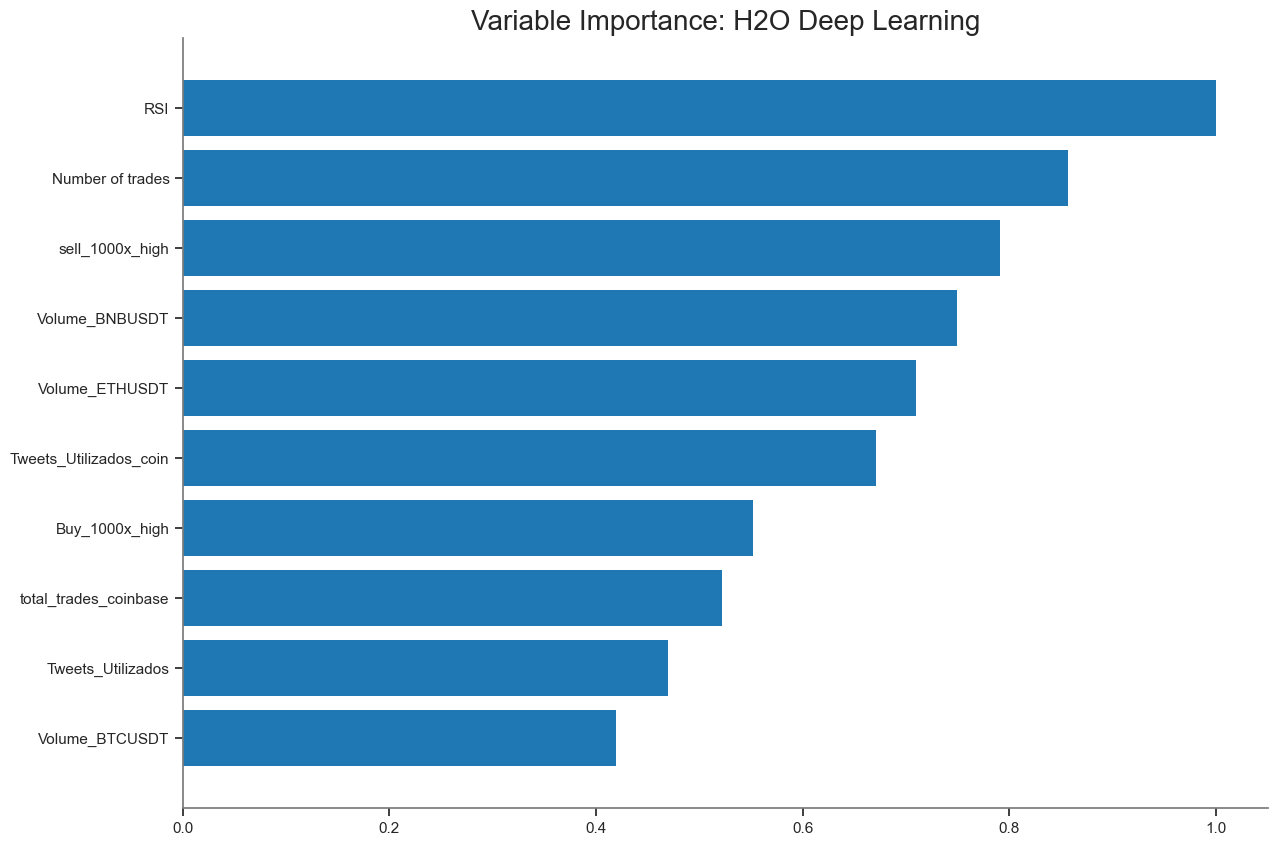

<Figure size 640x480 with 0 Axes>

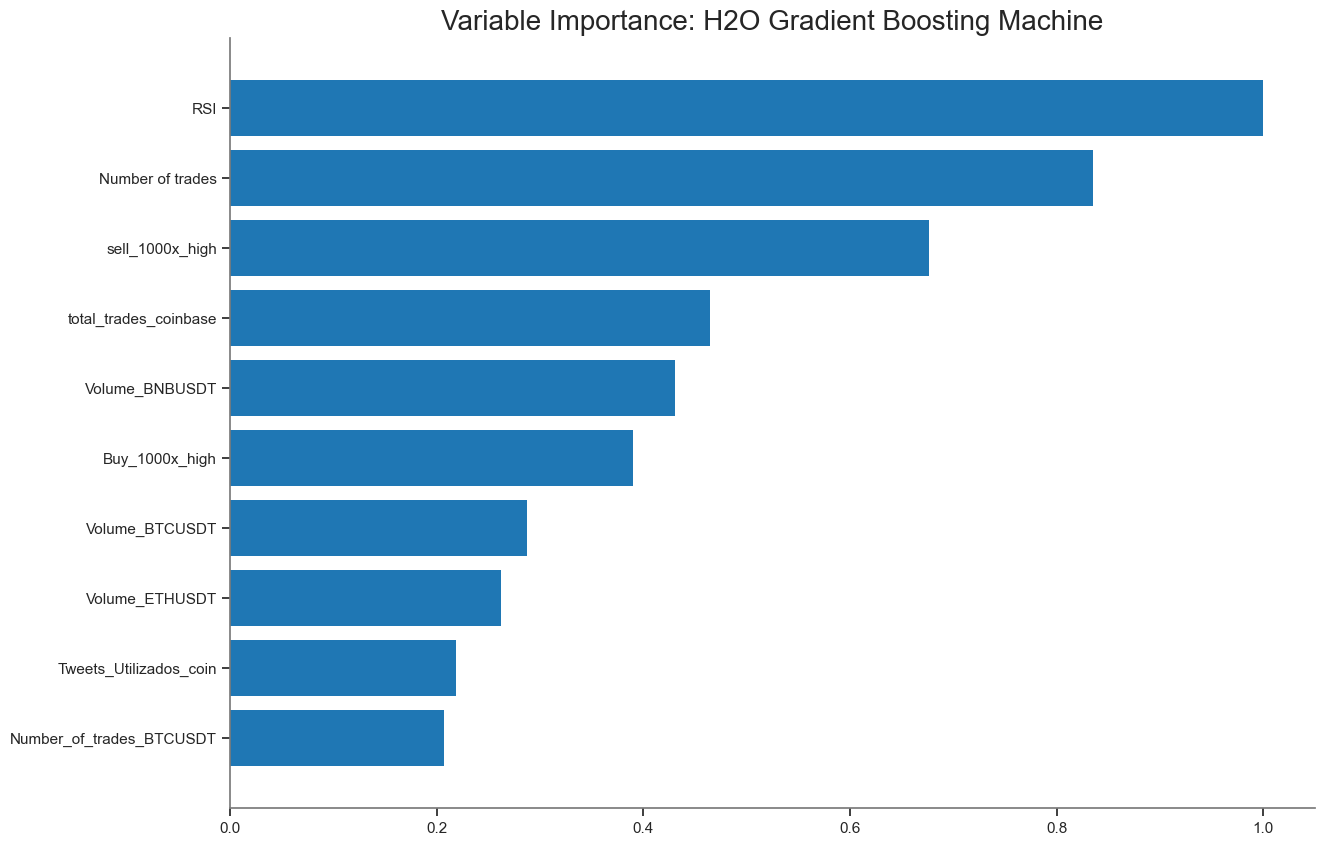

<Figure size 640x480 with 0 Axes>

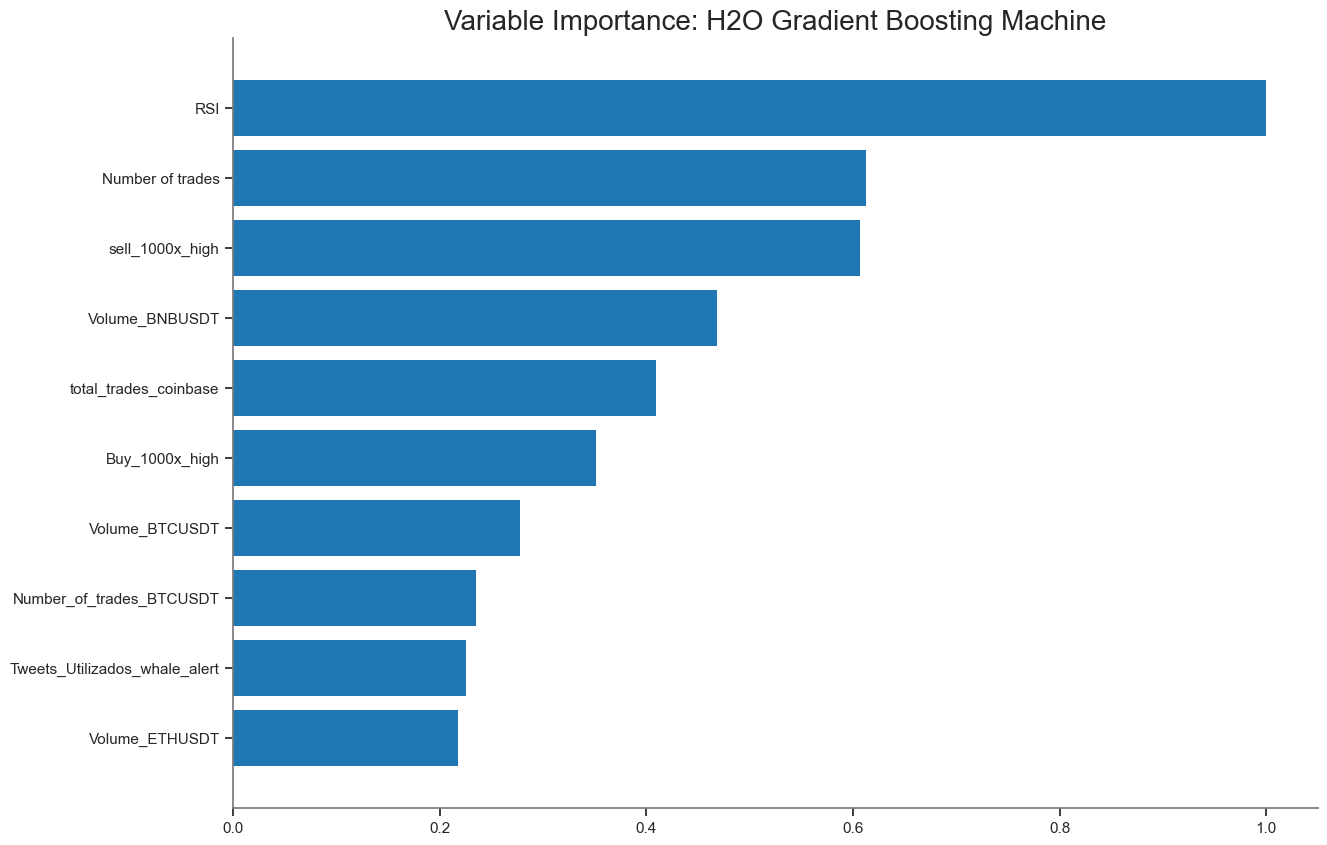

<Figure size 640x480 with 0 Axes>

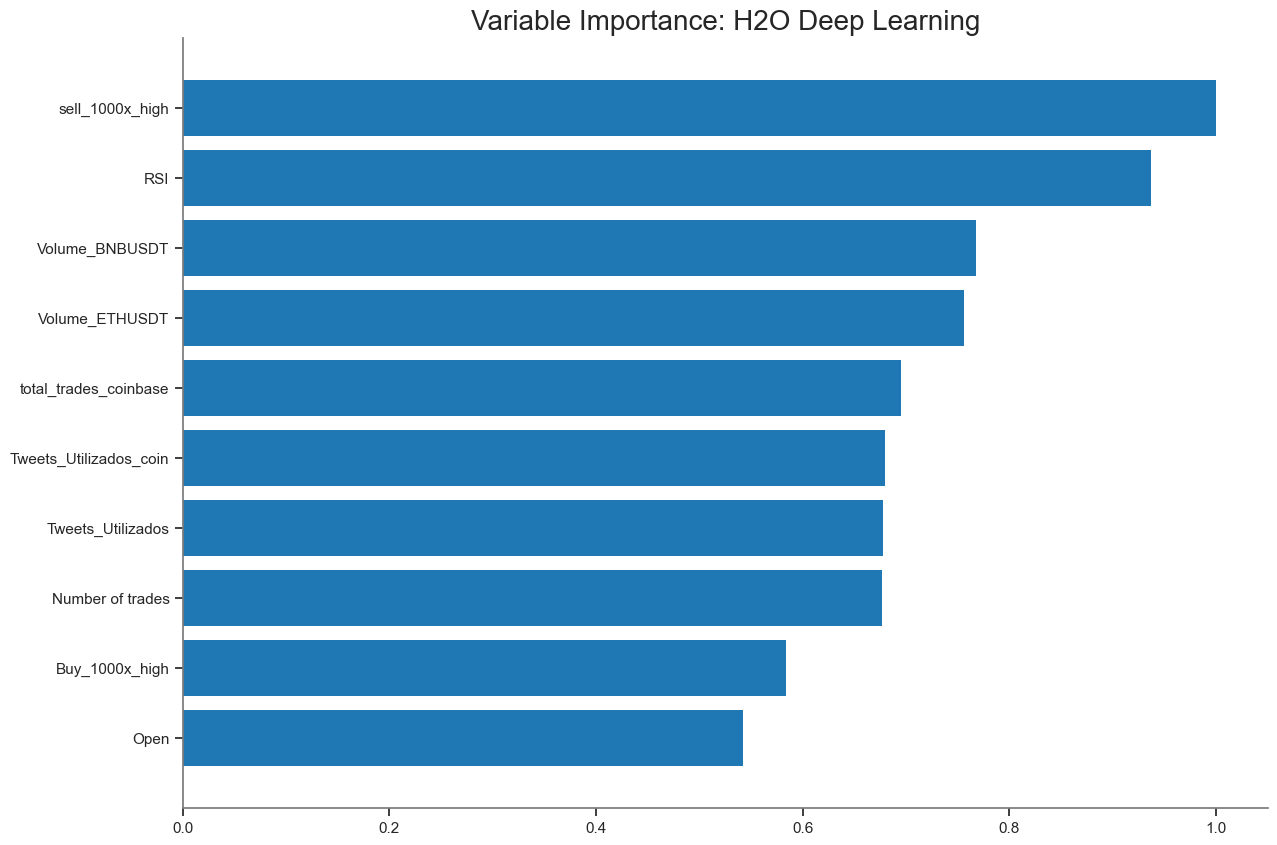

<Figure size 640x480 with 0 Axes>

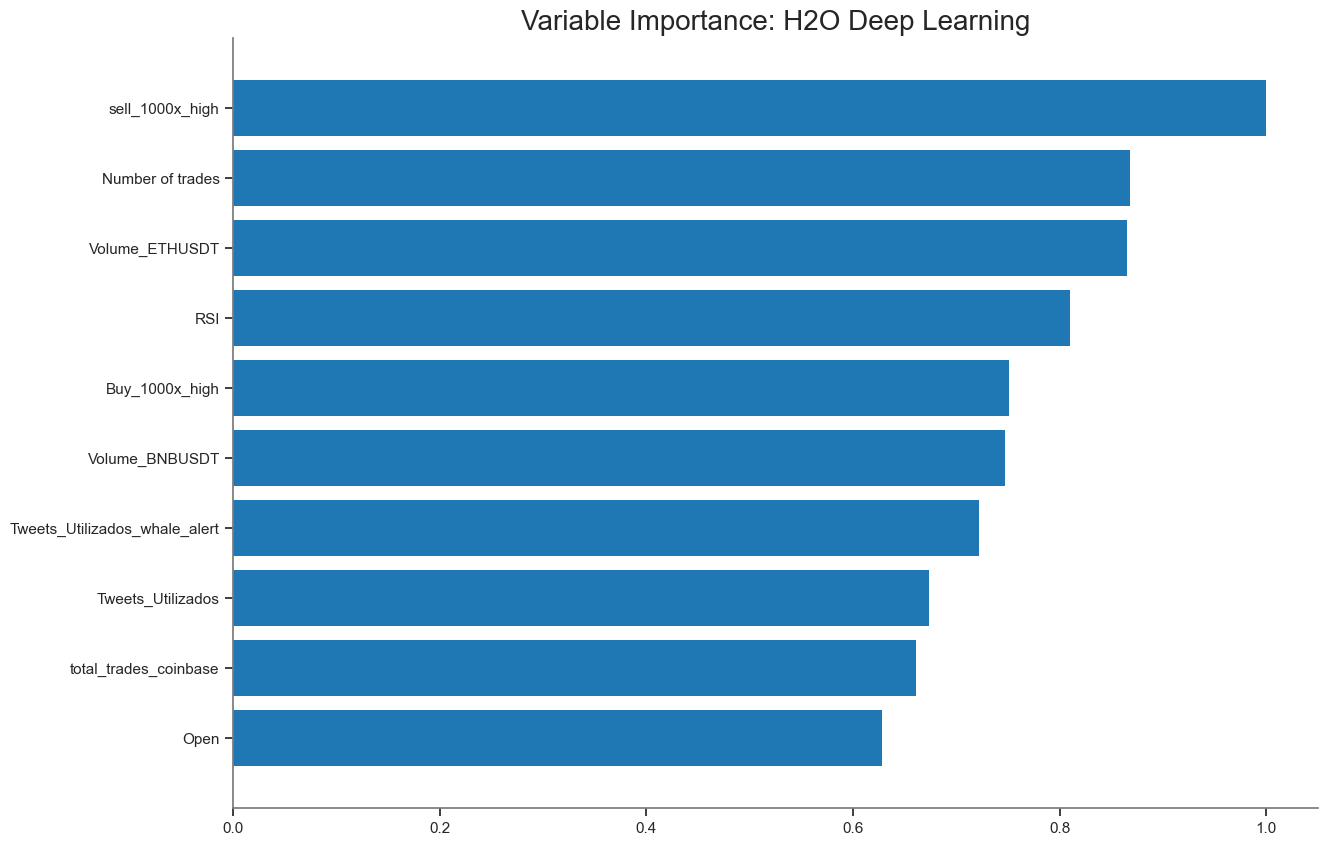

<Figure size 640x480 with 0 Axes>

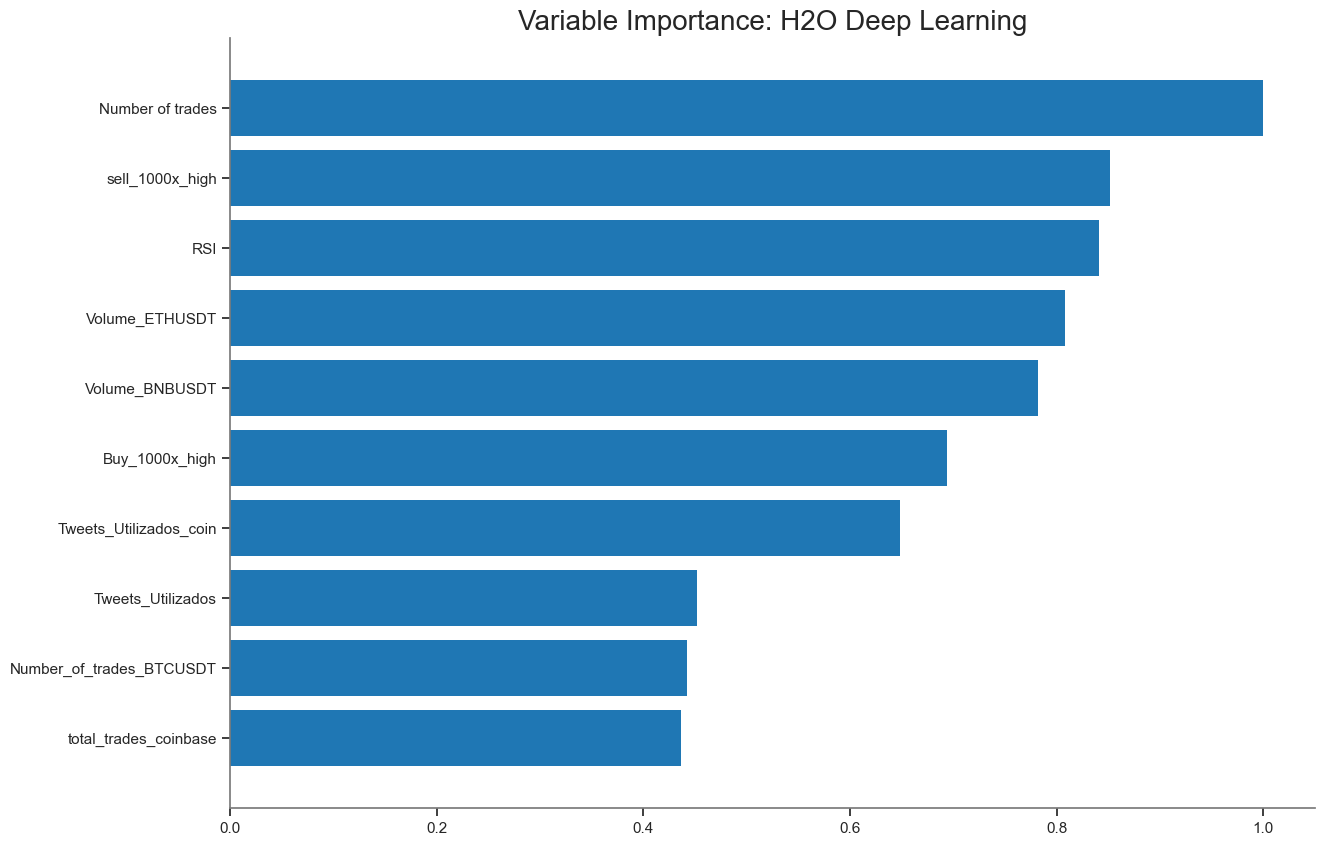

<Figure size 640x480 with 0 Axes>

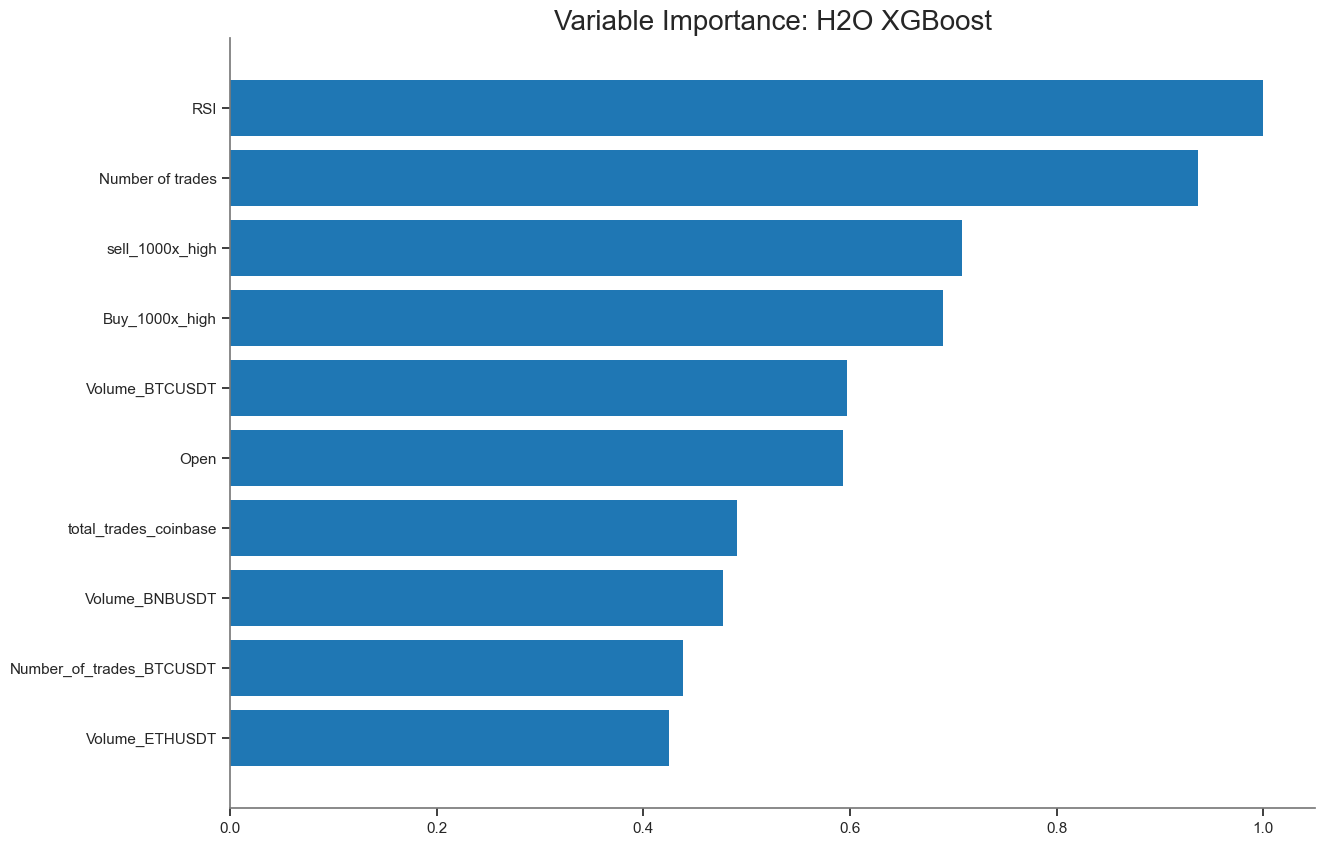

<Figure size 640x480 with 0 Axes>

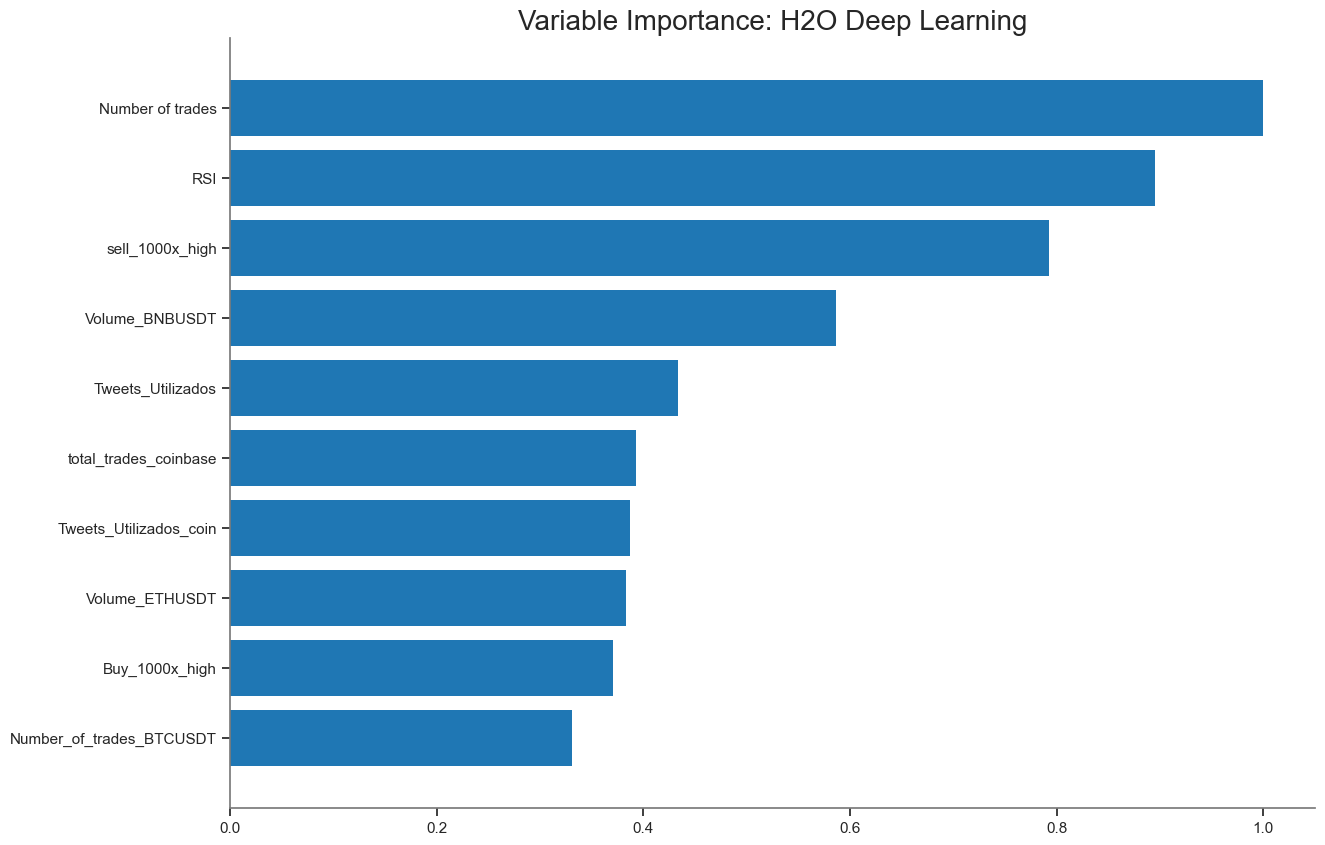

<Figure size 640x480 with 0 Axes>

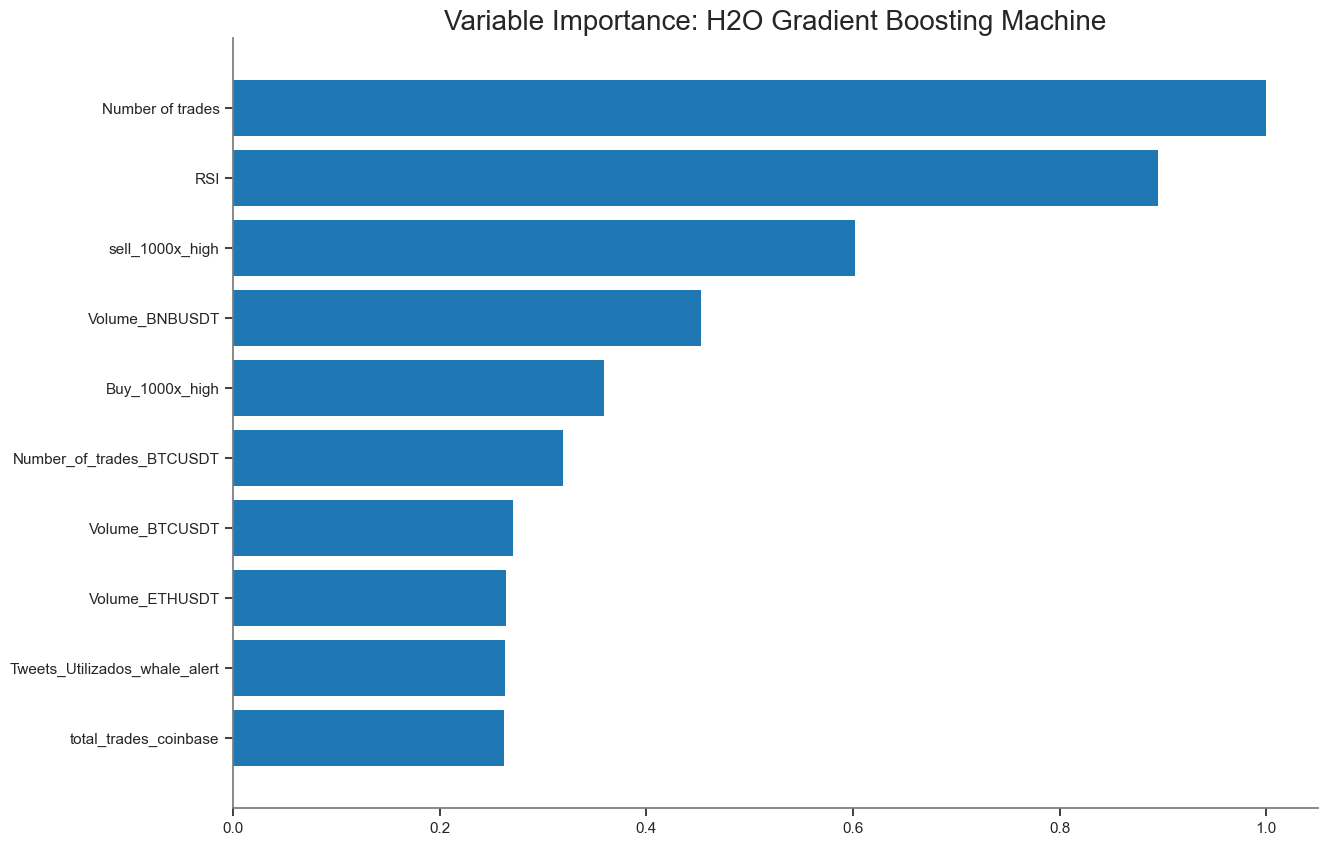

<Figure size 640x480 with 0 Axes>

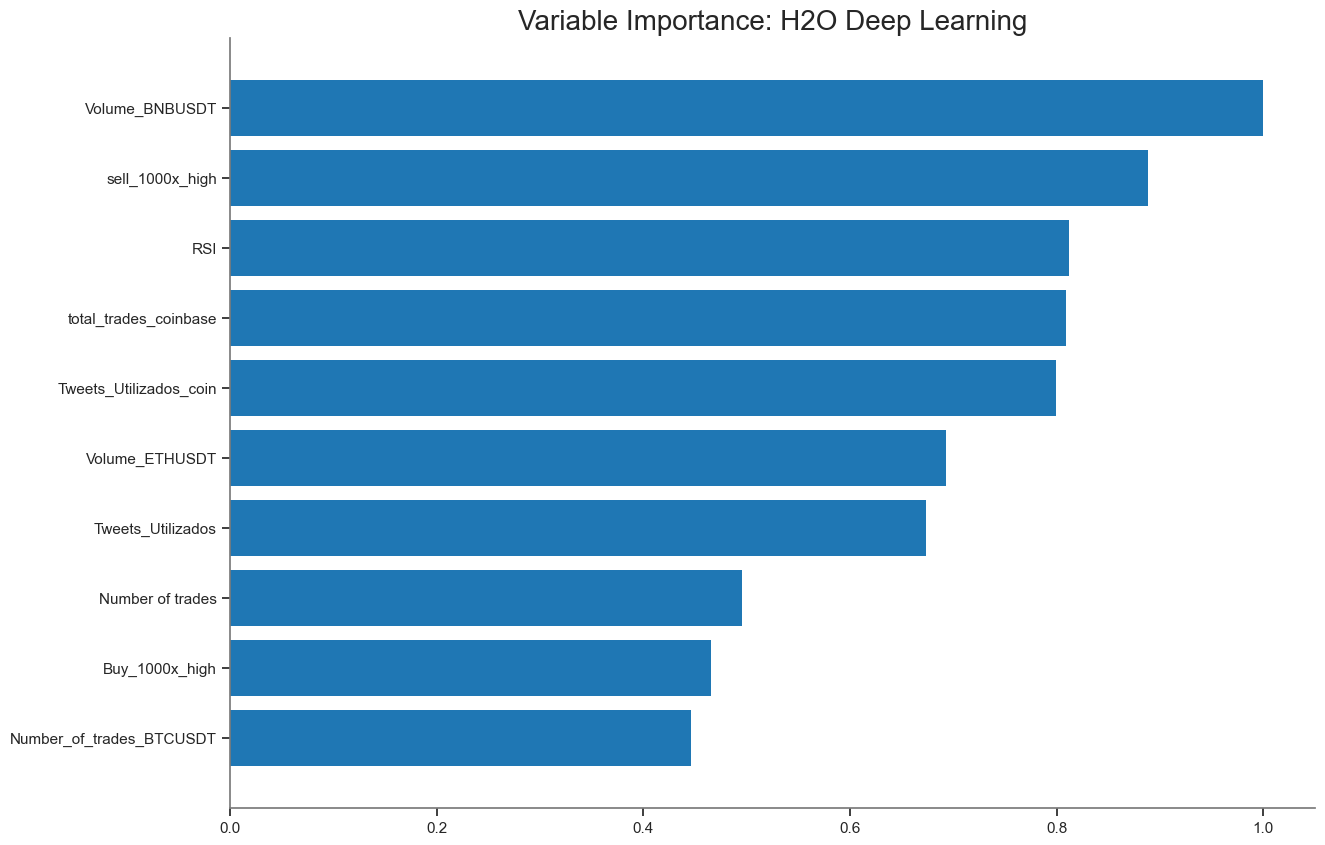

<Figure size 640x480 with 0 Axes>

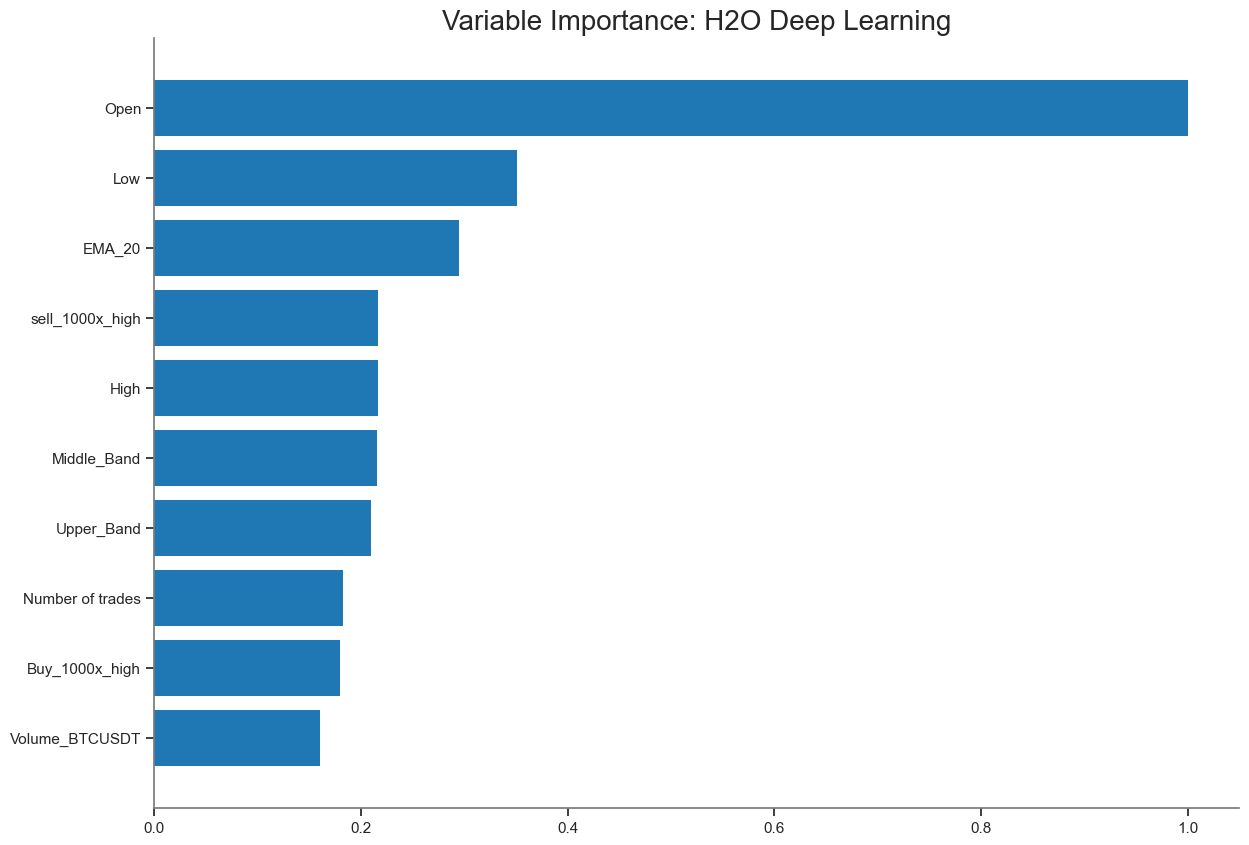

<Figure size 640x480 with 0 Axes>

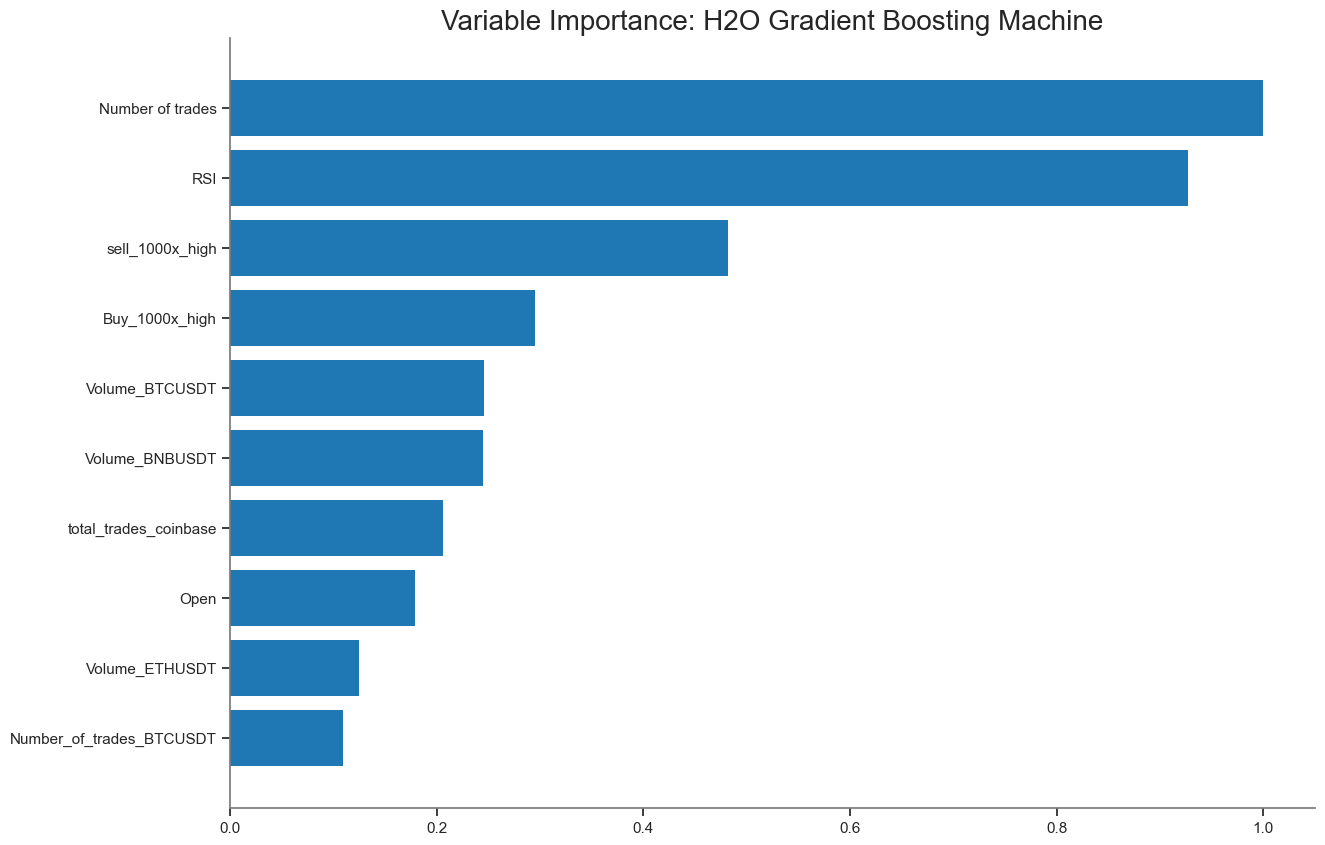

<Figure size 640x480 with 0 Axes>

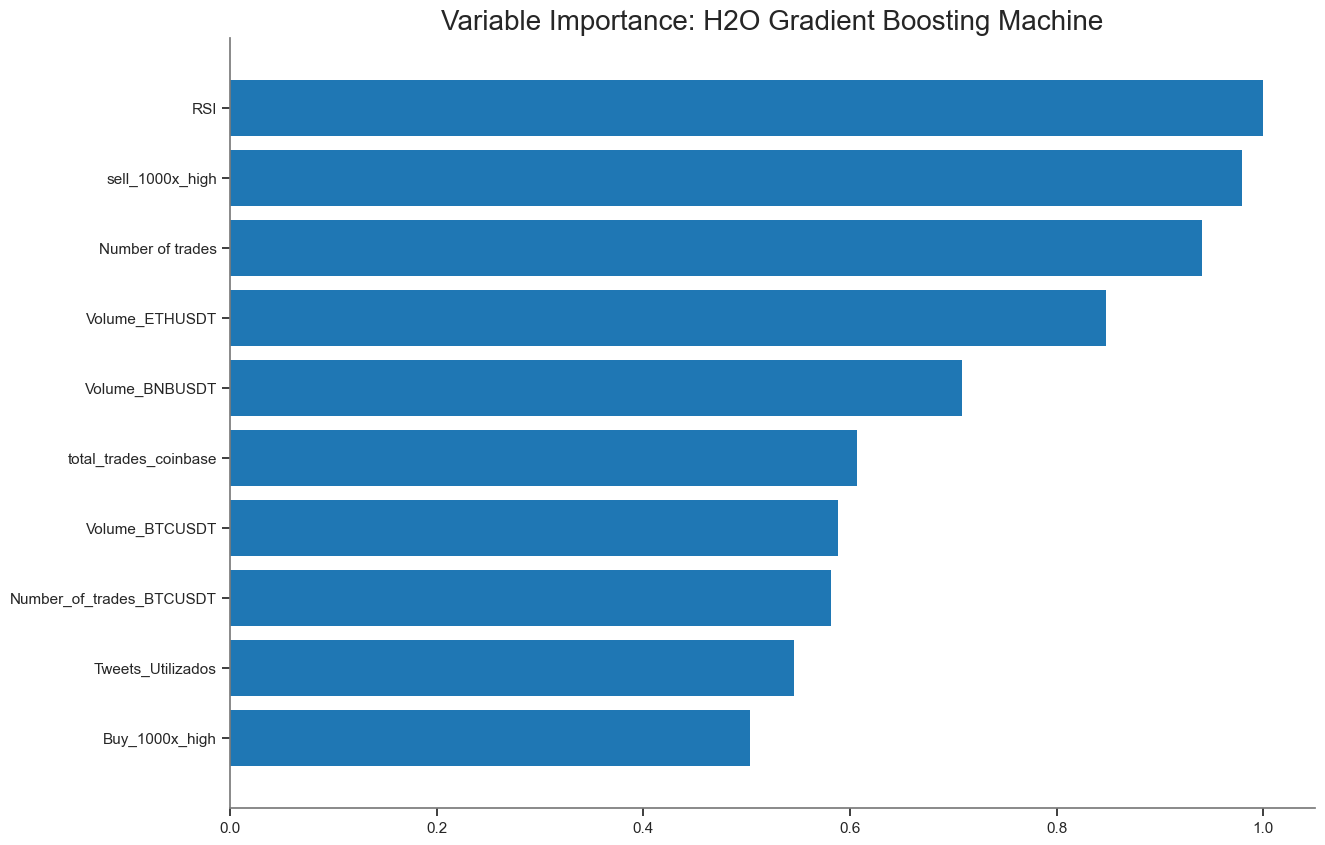

<Figure size 640x480 with 0 Axes>

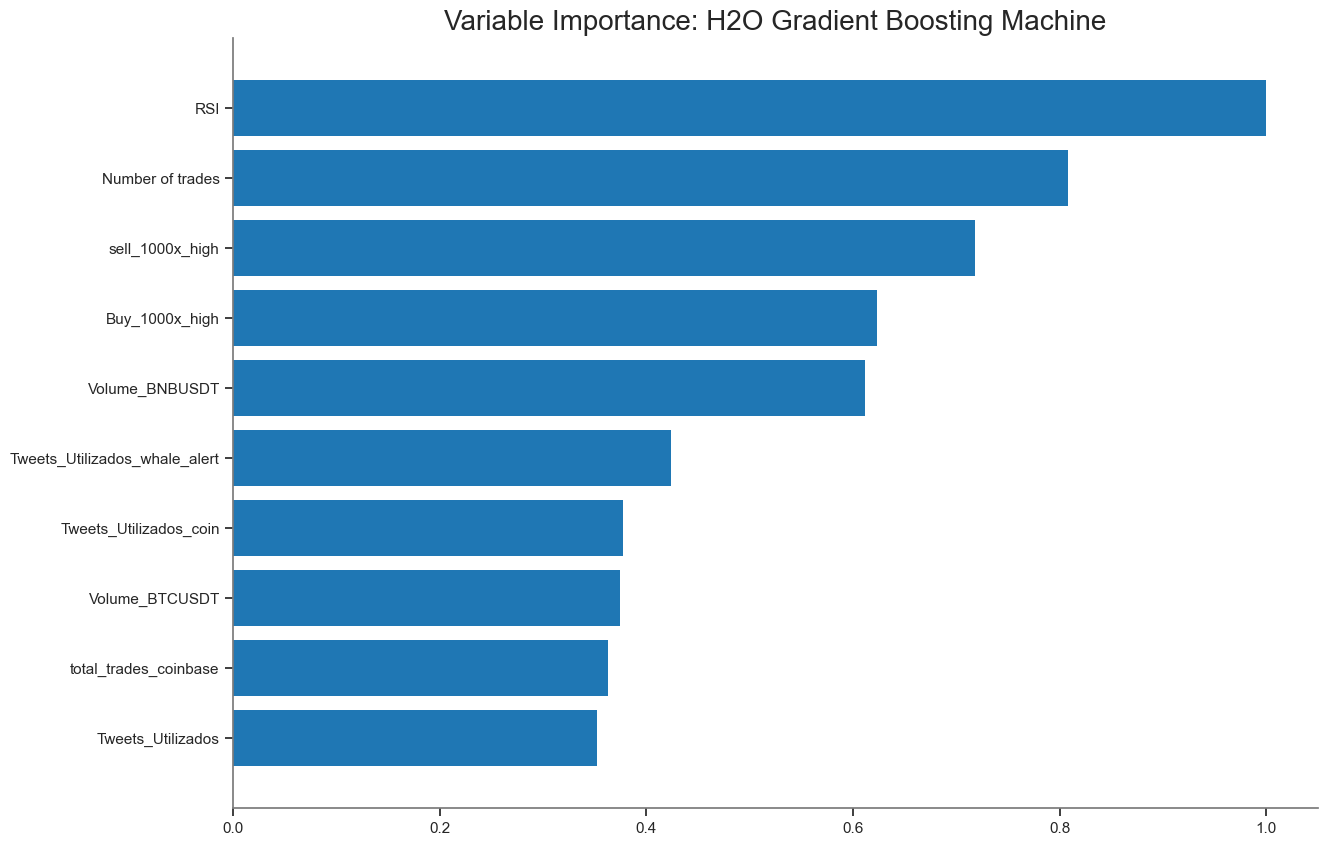

<Figure size 640x480 with 0 Axes>

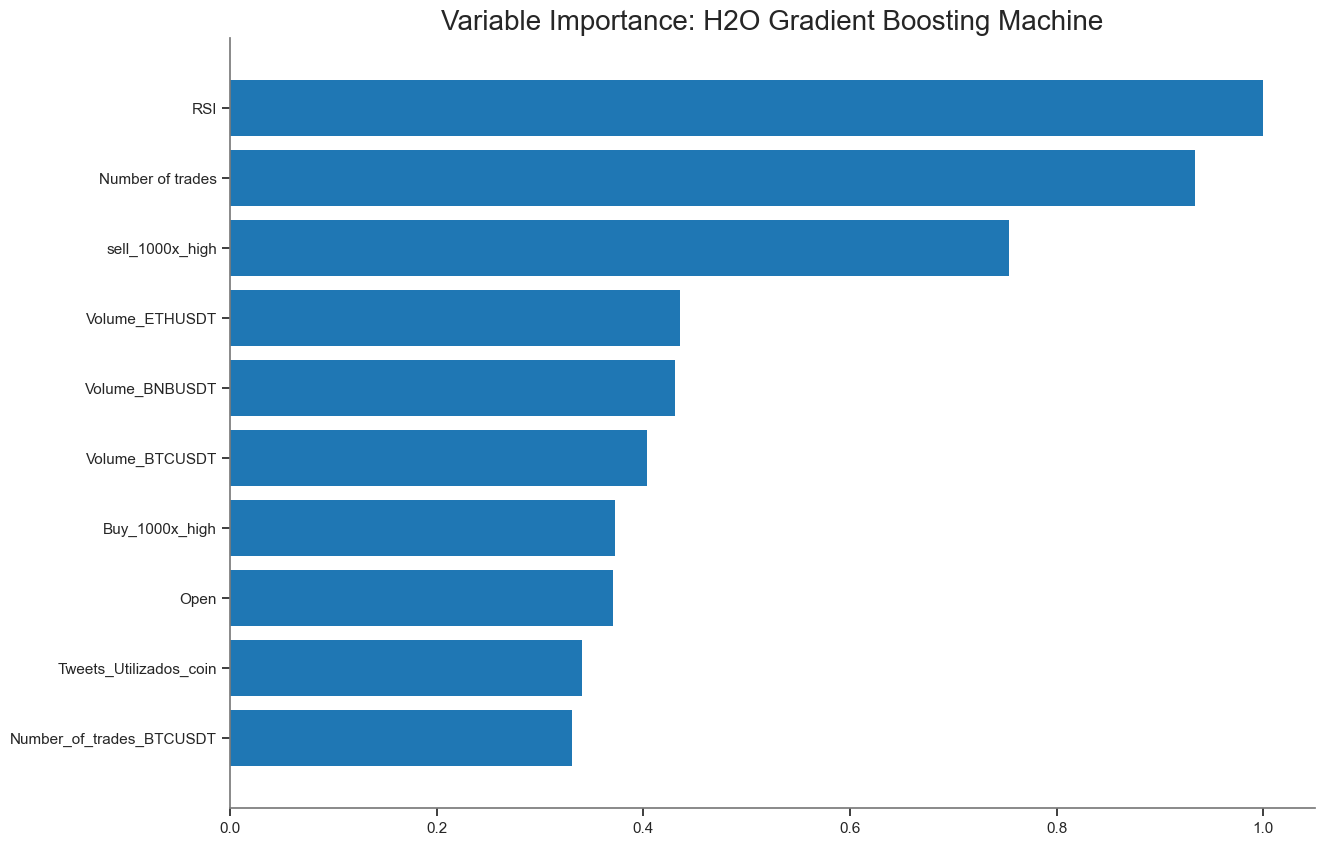

<Figure size 640x480 with 0 Axes>

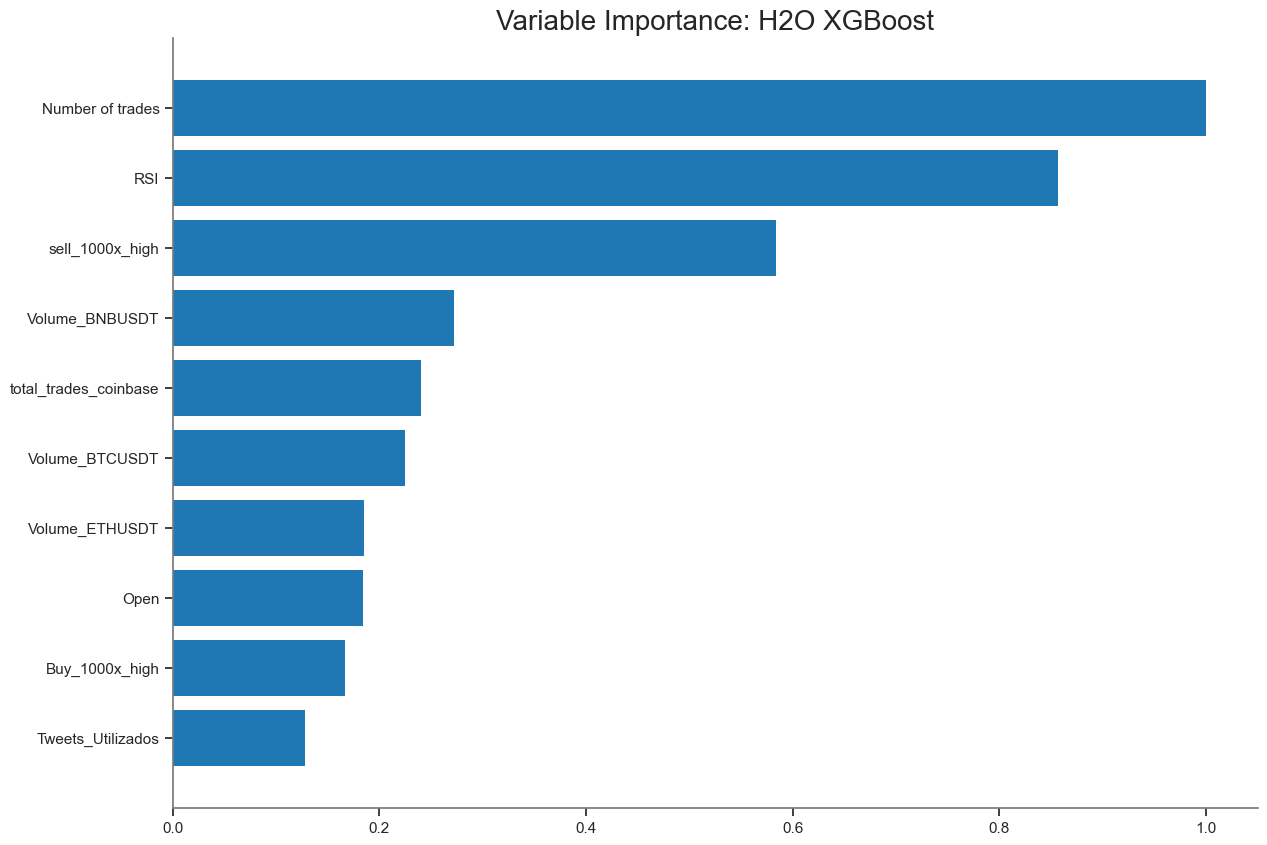

<Figure size 640x480 with 0 Axes>

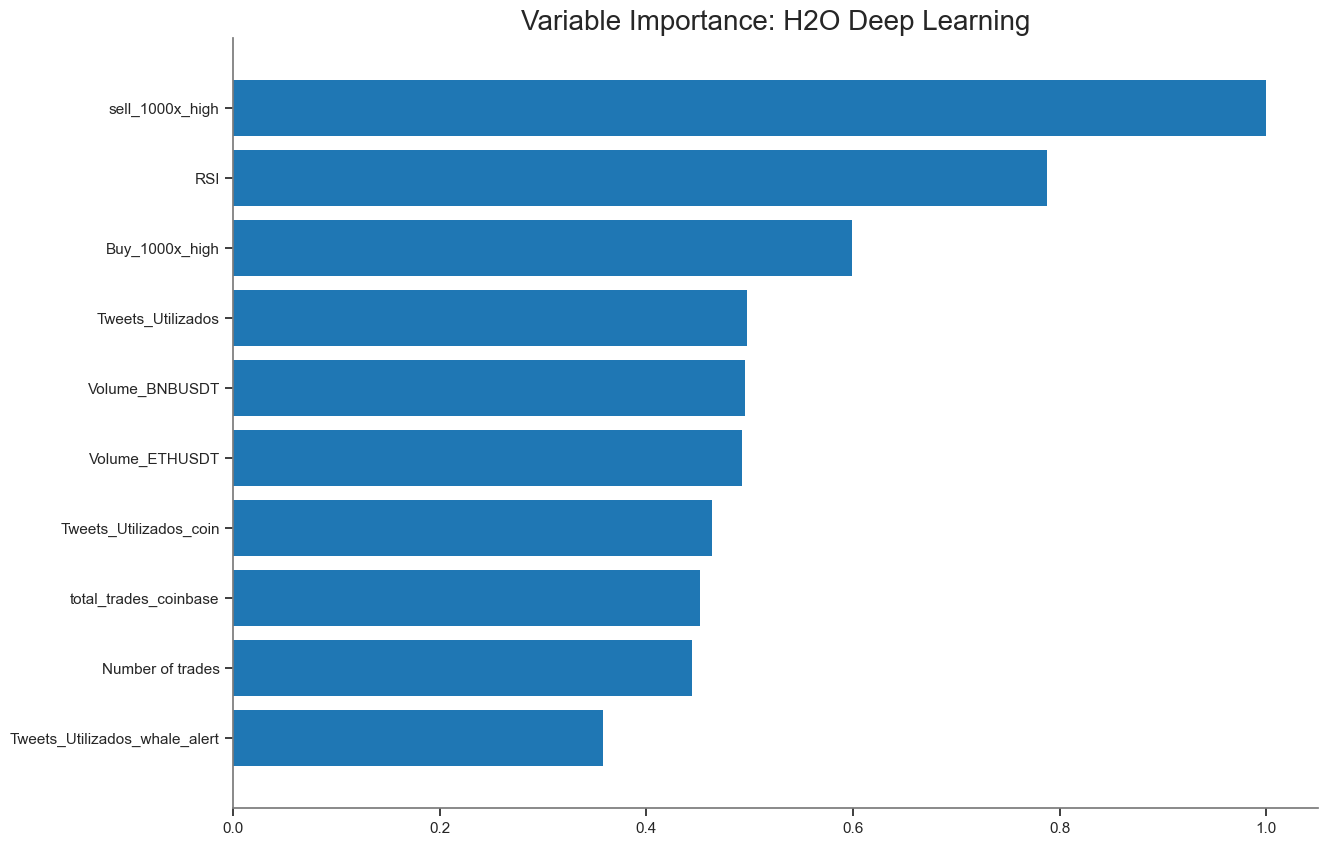

<Figure size 640x480 with 0 Axes>

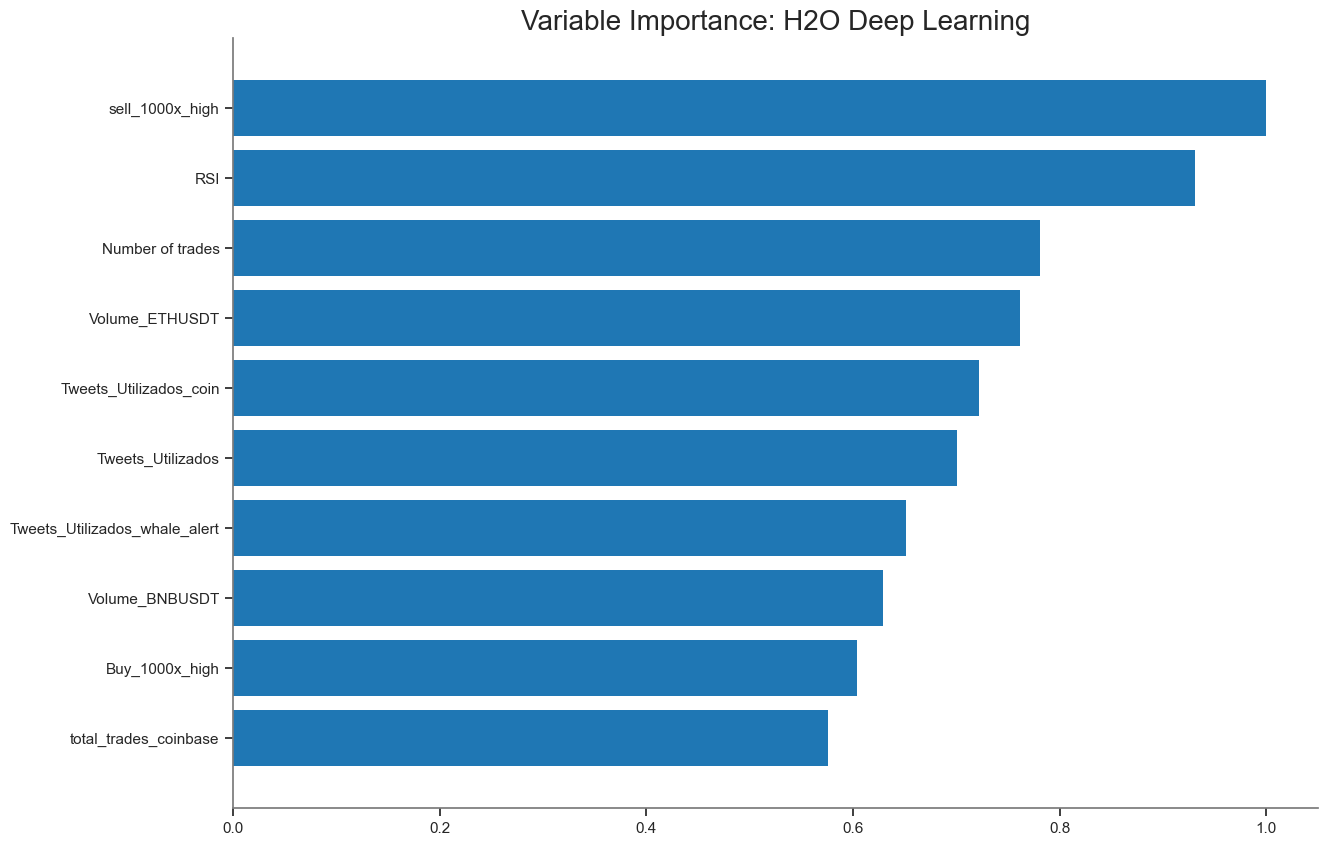

<Figure size 640x480 with 0 Axes>

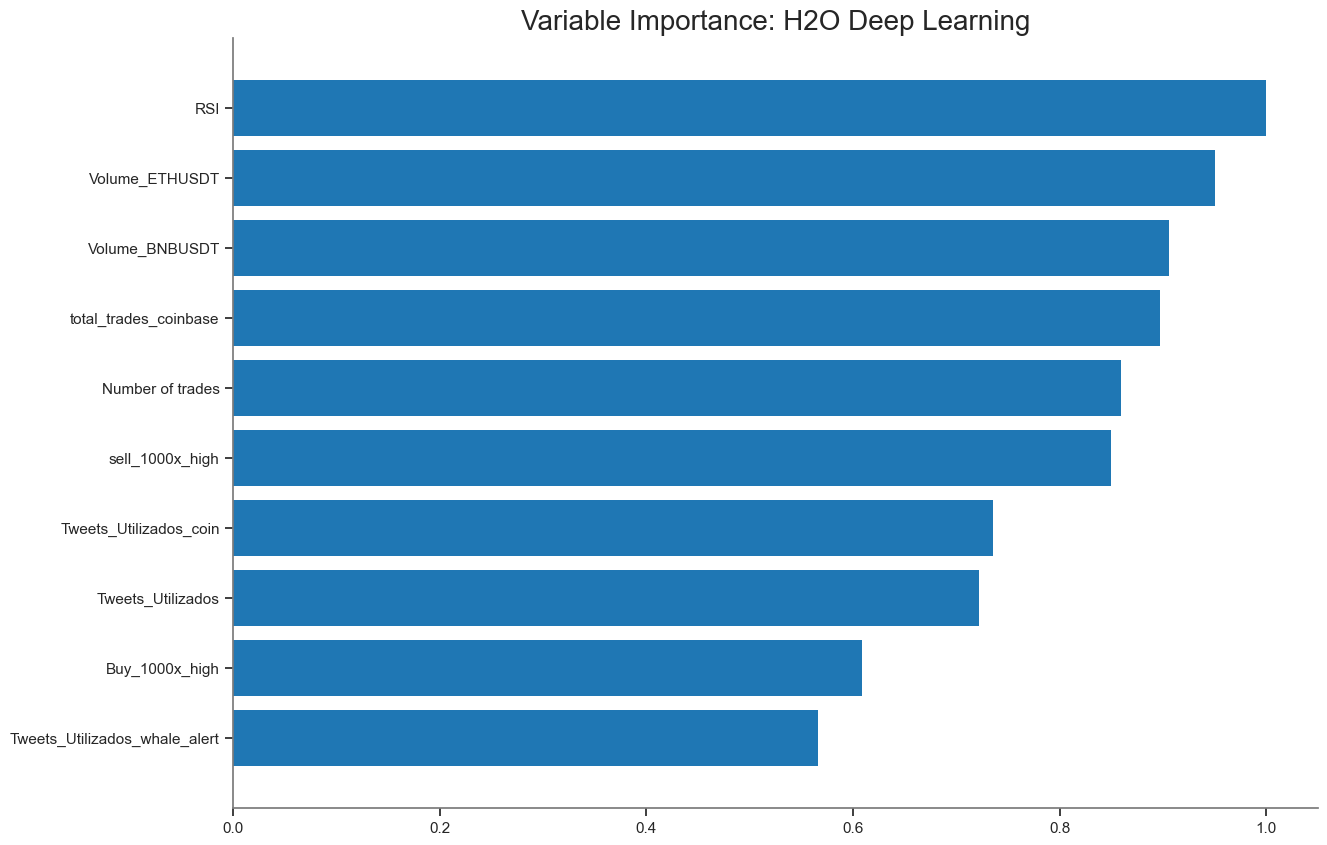

<Figure size 640x480 with 0 Axes>

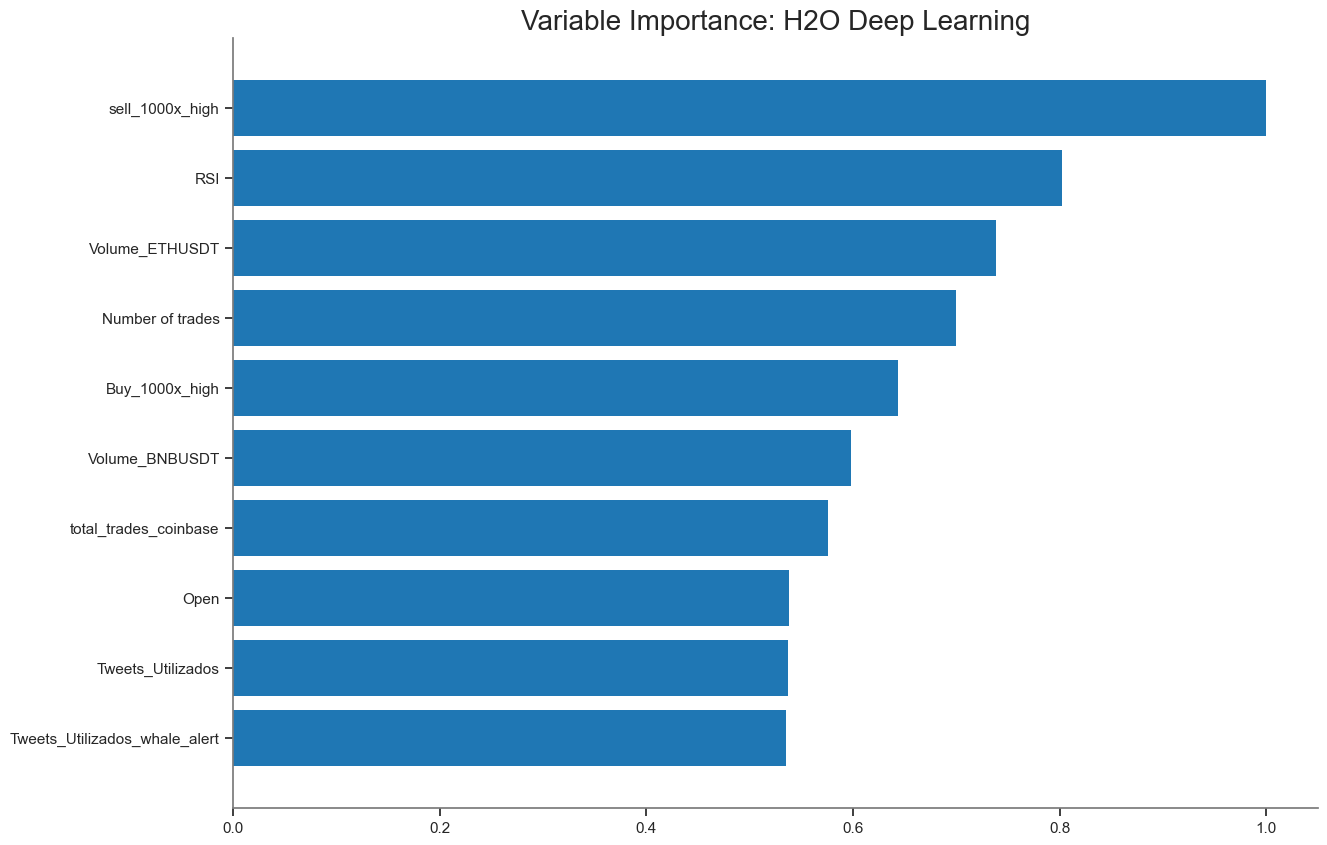

<Figure size 640x480 with 0 Axes>

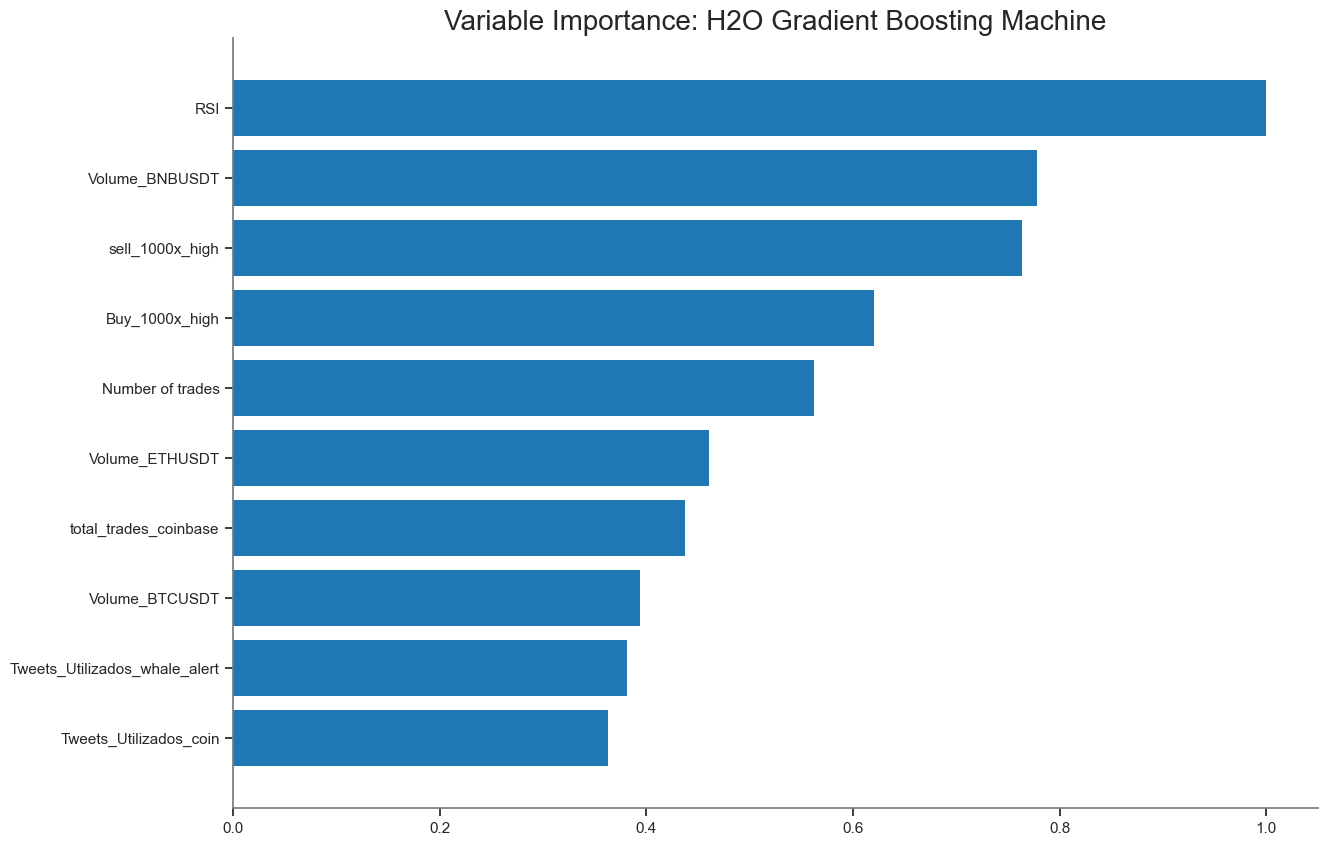

<Figure size 640x480 with 0 Axes>

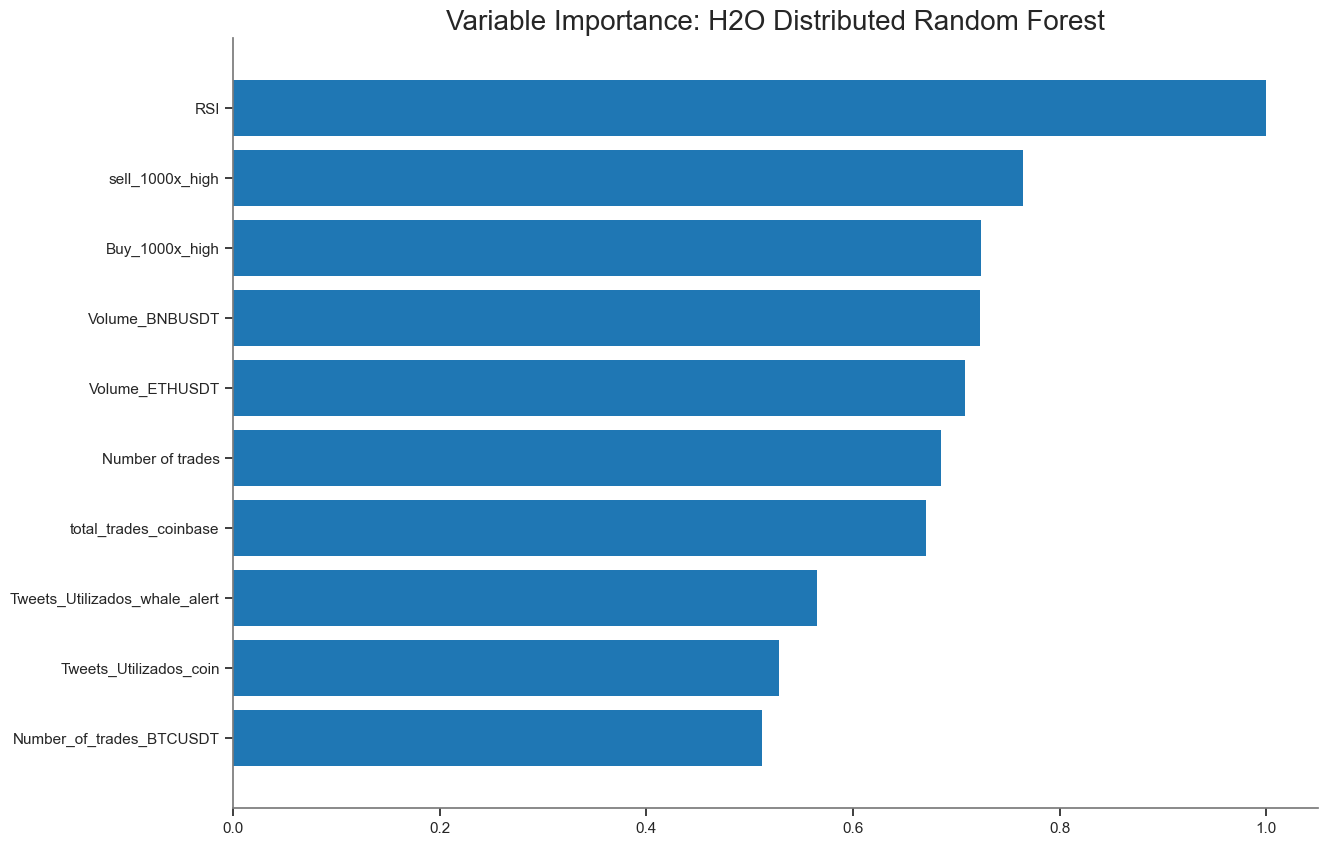

<Figure size 640x480 with 0 Axes>

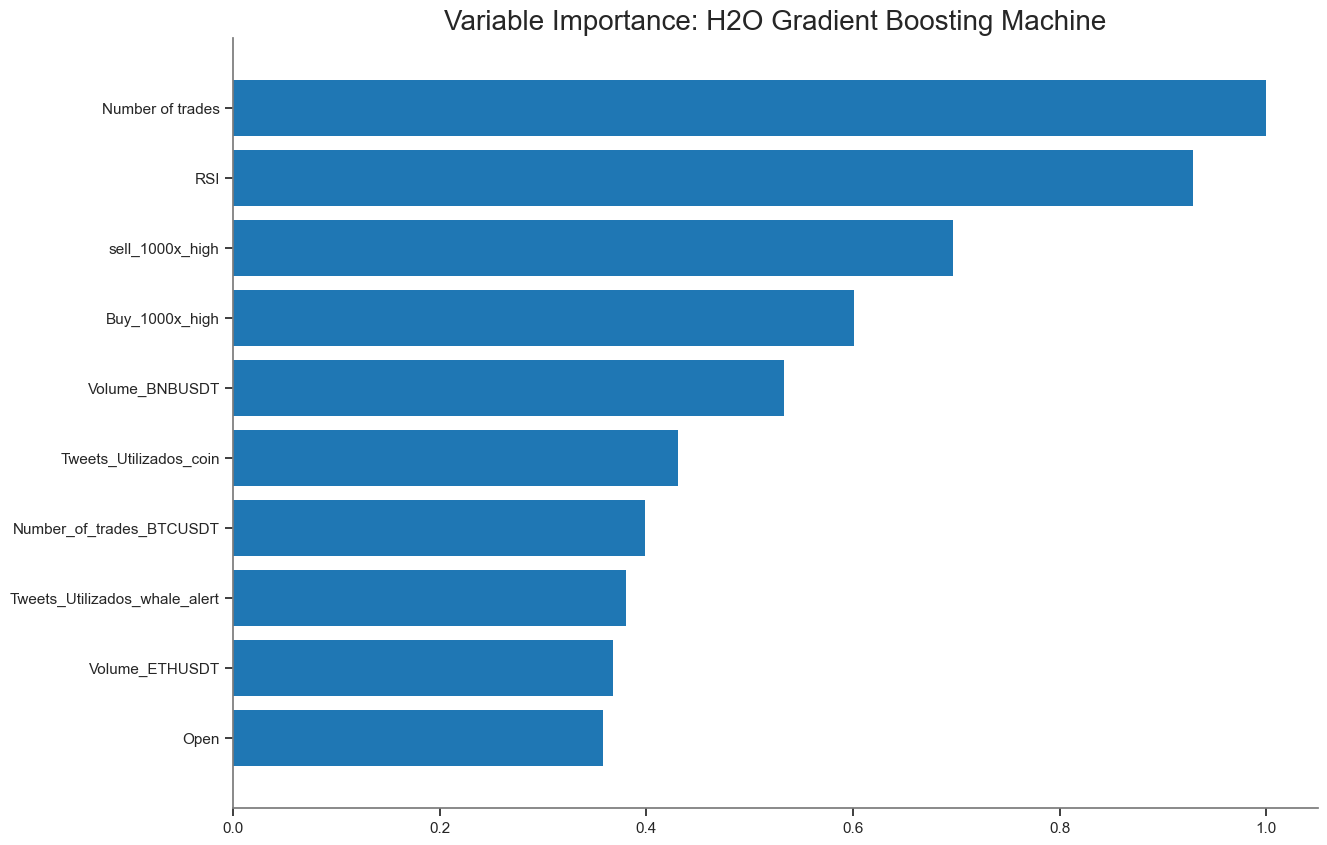

<Figure size 640x480 with 0 Axes>

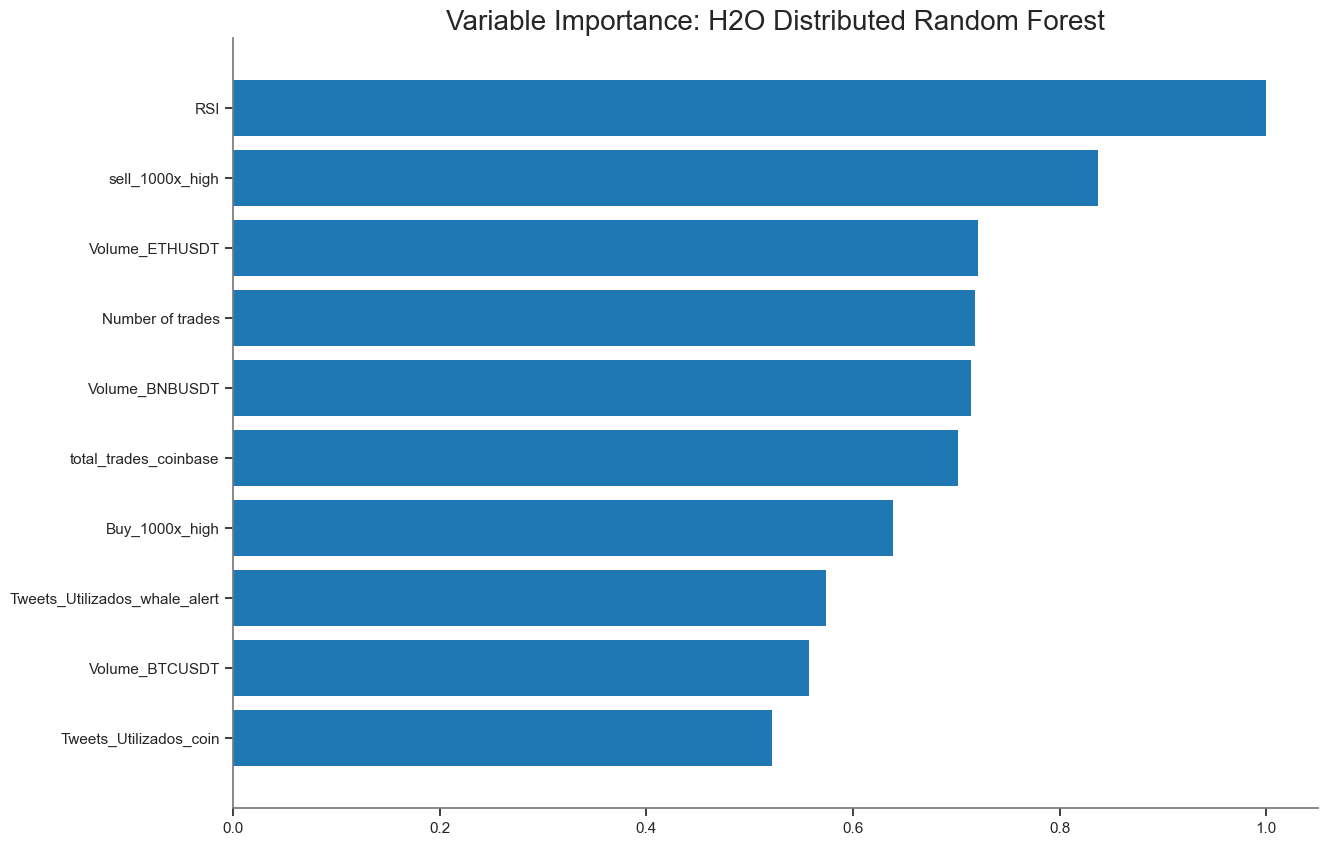

<Figure size 640x480 with 0 Axes>

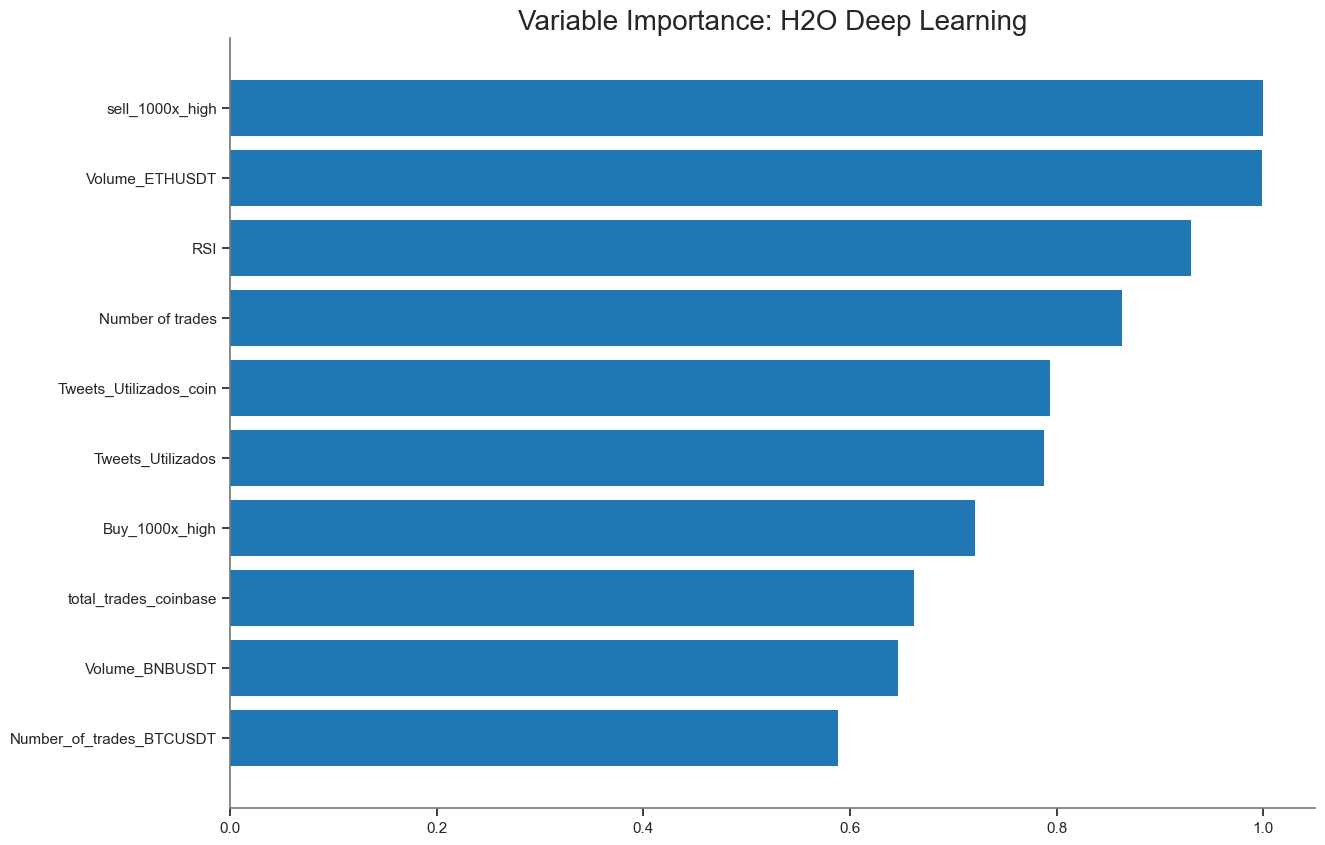

<Figure size 640x480 with 0 Axes>

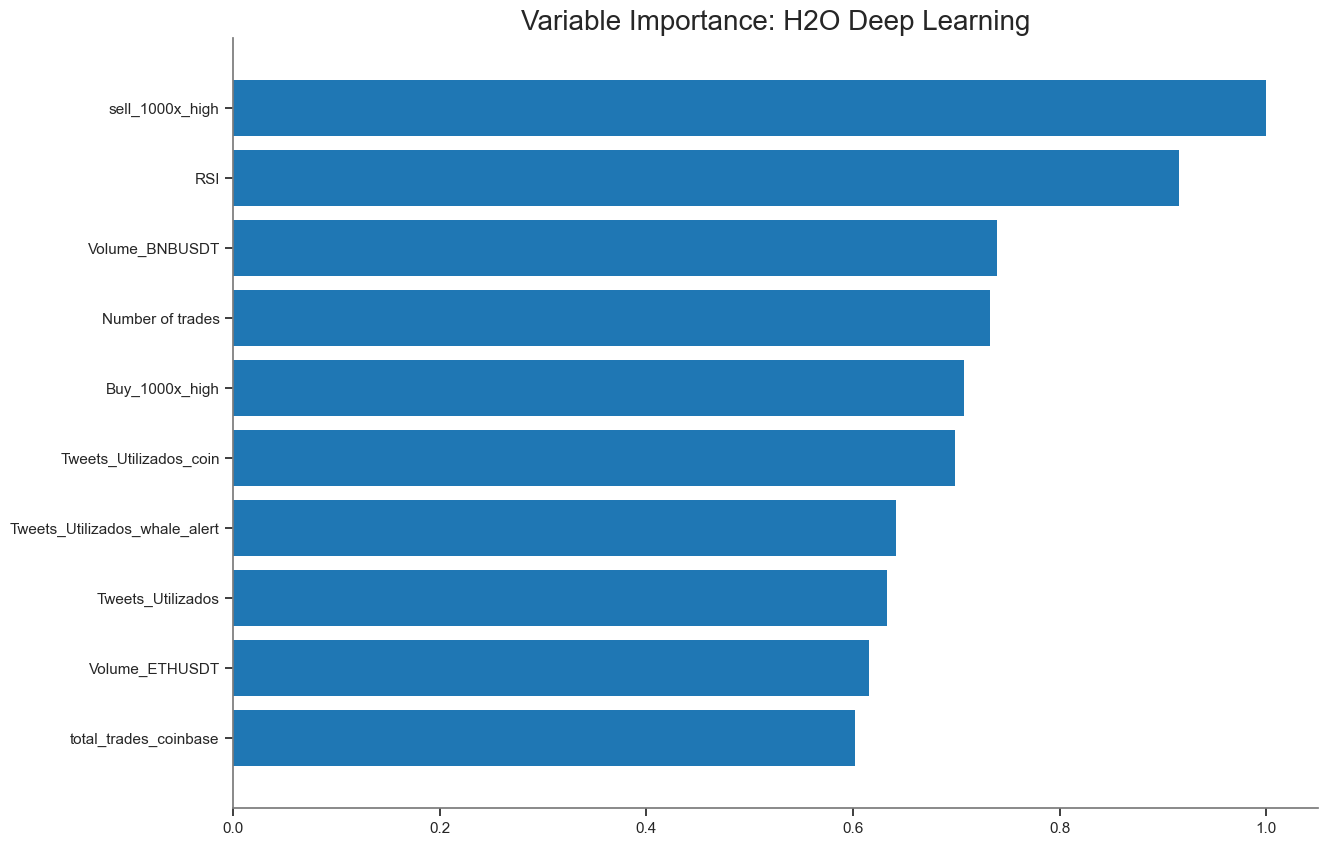

<Figure size 640x480 with 0 Axes>

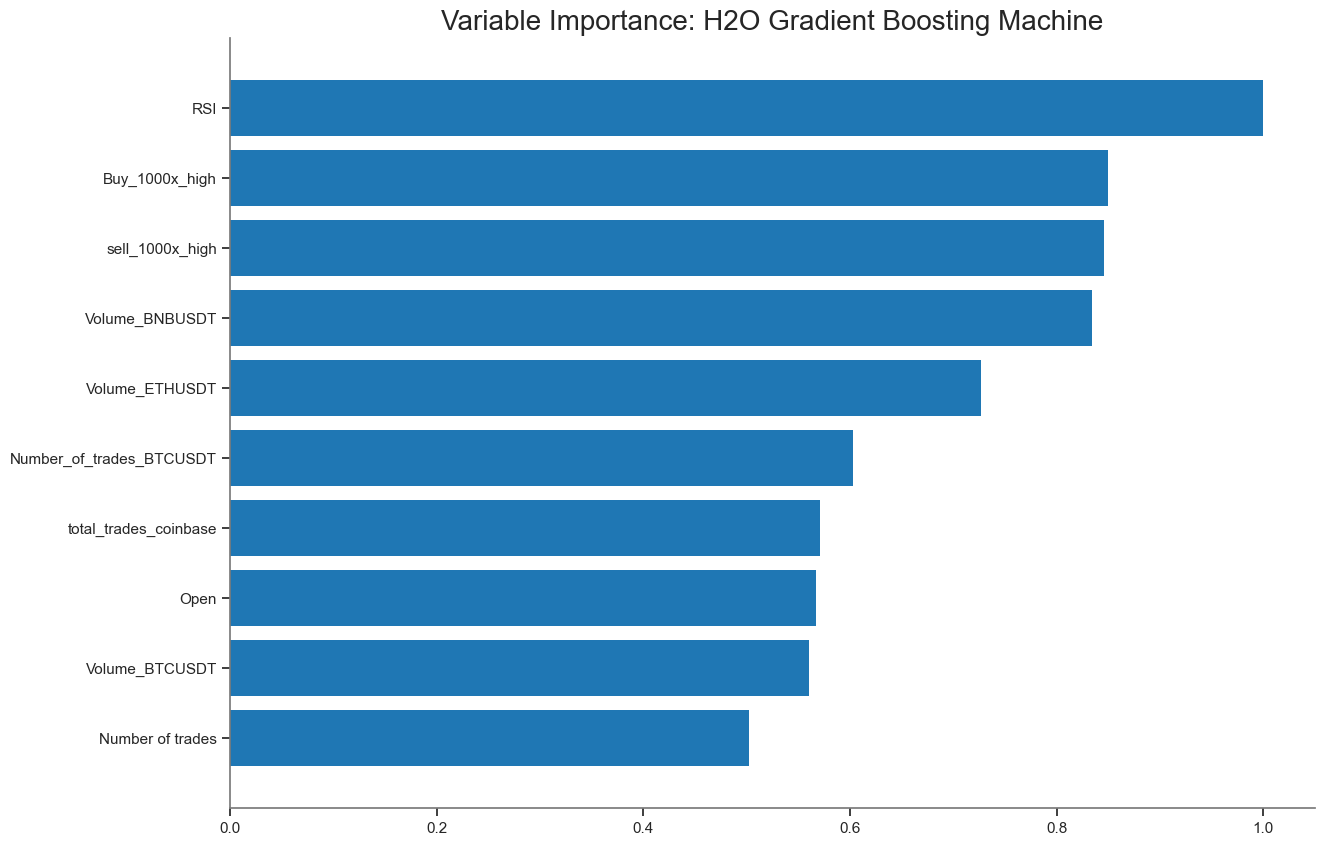

<Figure size 640x480 with 0 Axes>

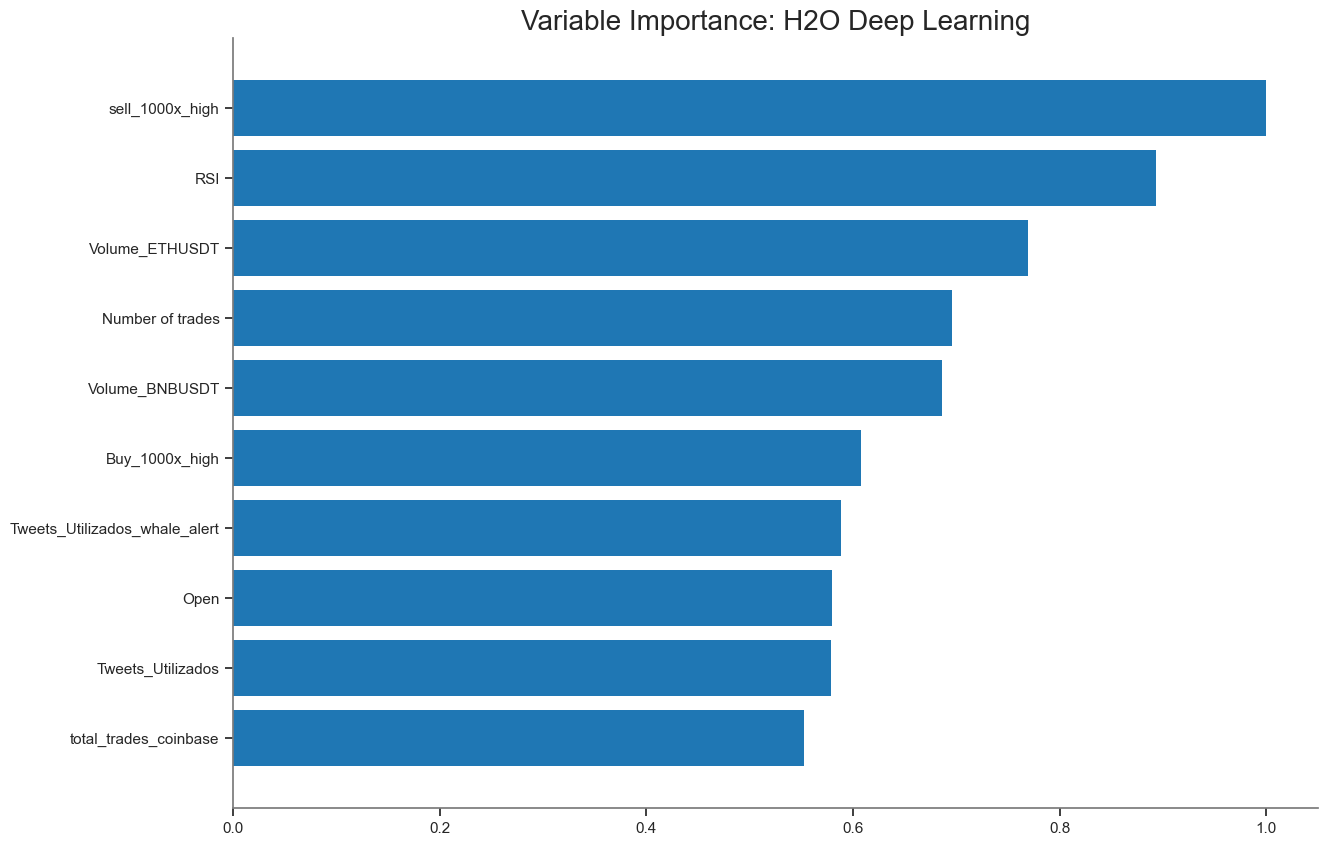

<Figure size 640x480 with 0 Axes>

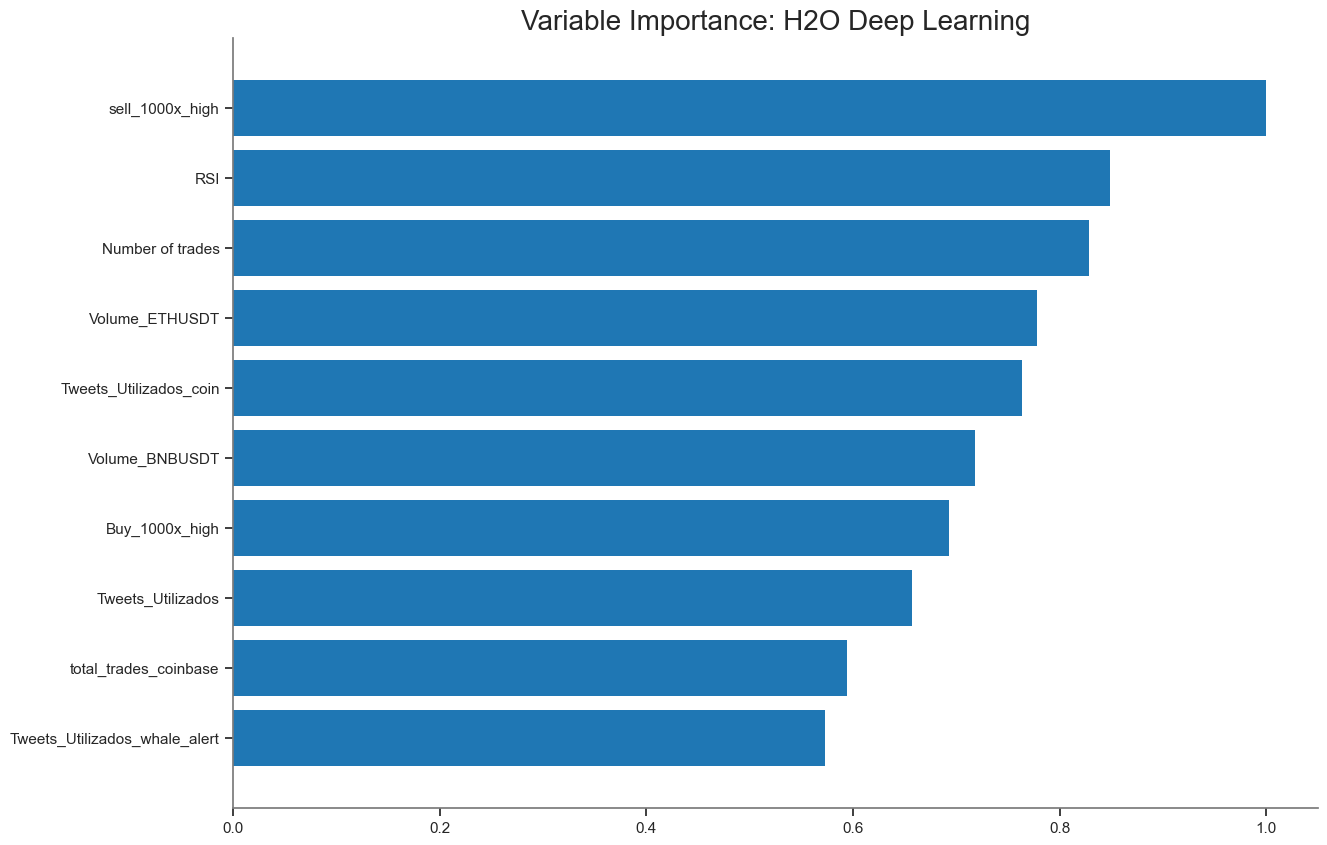

<Figure size 640x480 with 0 Axes>

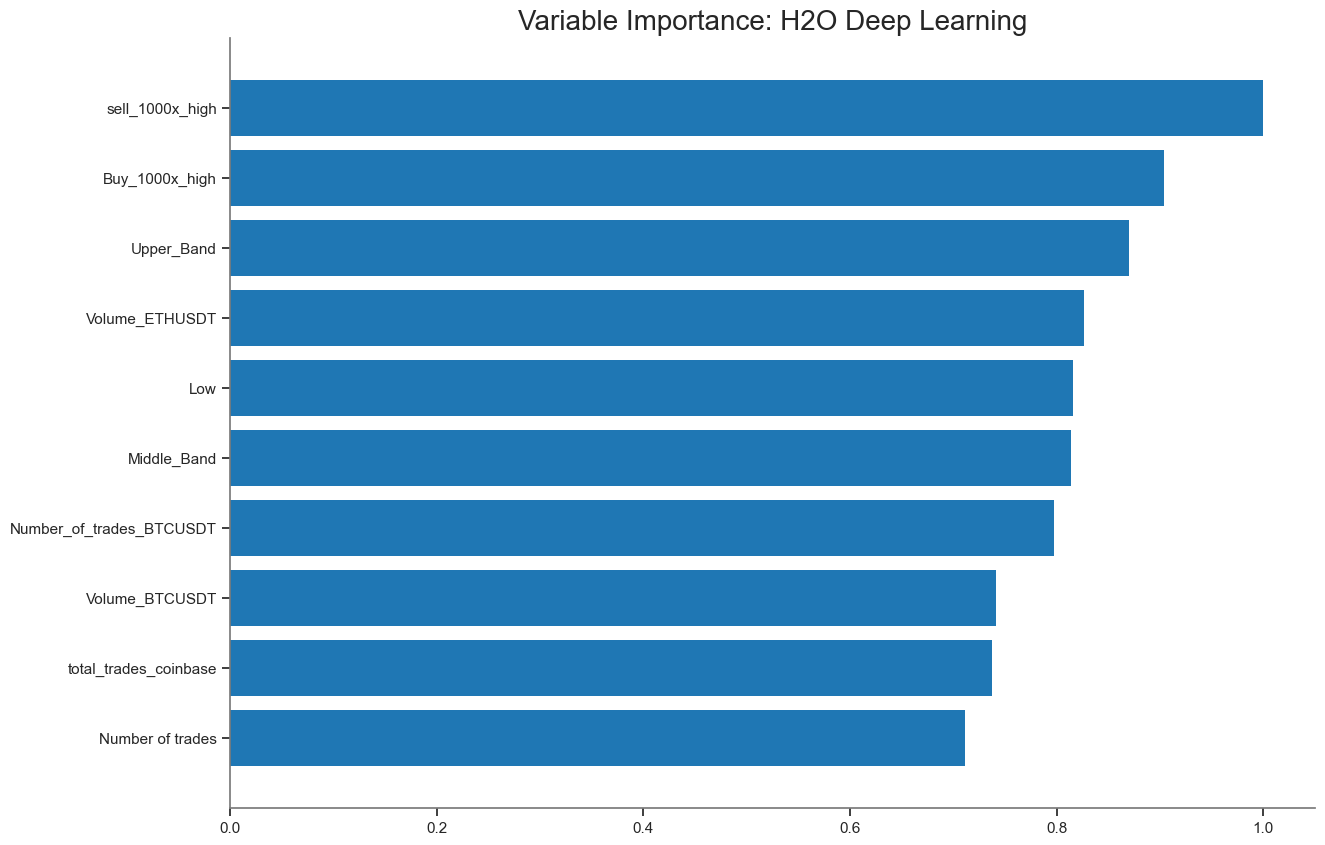

<Figure size 640x480 with 0 Axes>

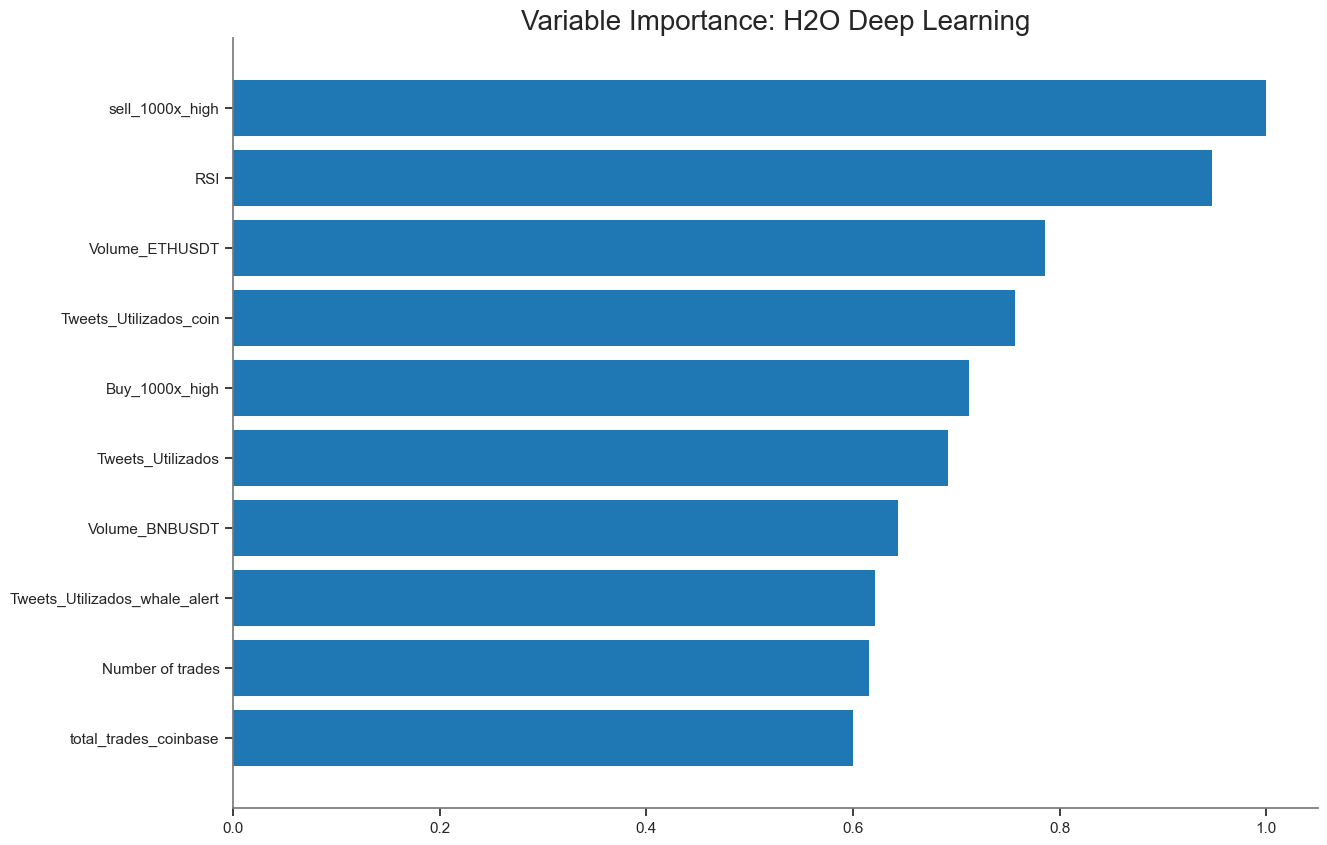

<Figure size 640x480 with 0 Axes>

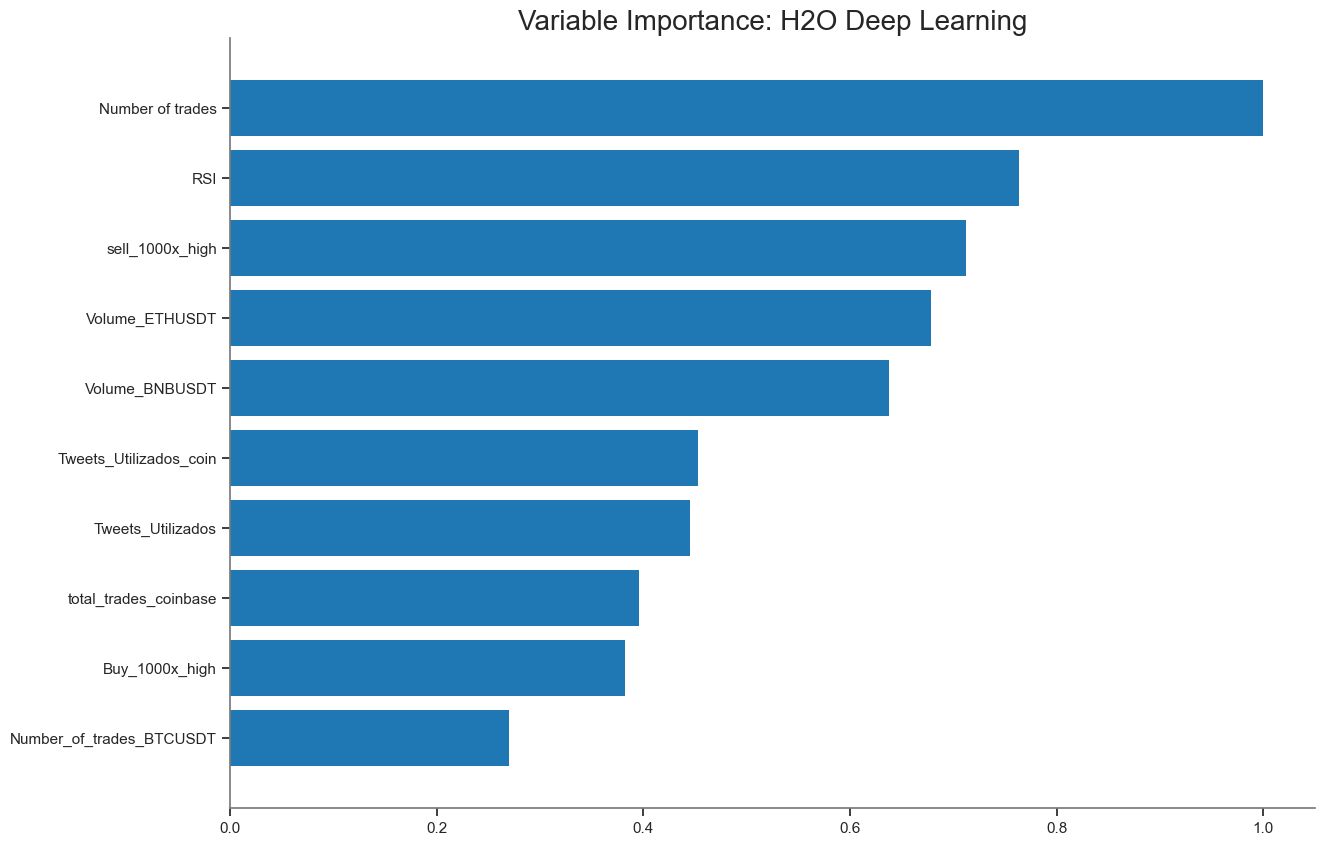

<Figure size 640x480 with 0 Axes>

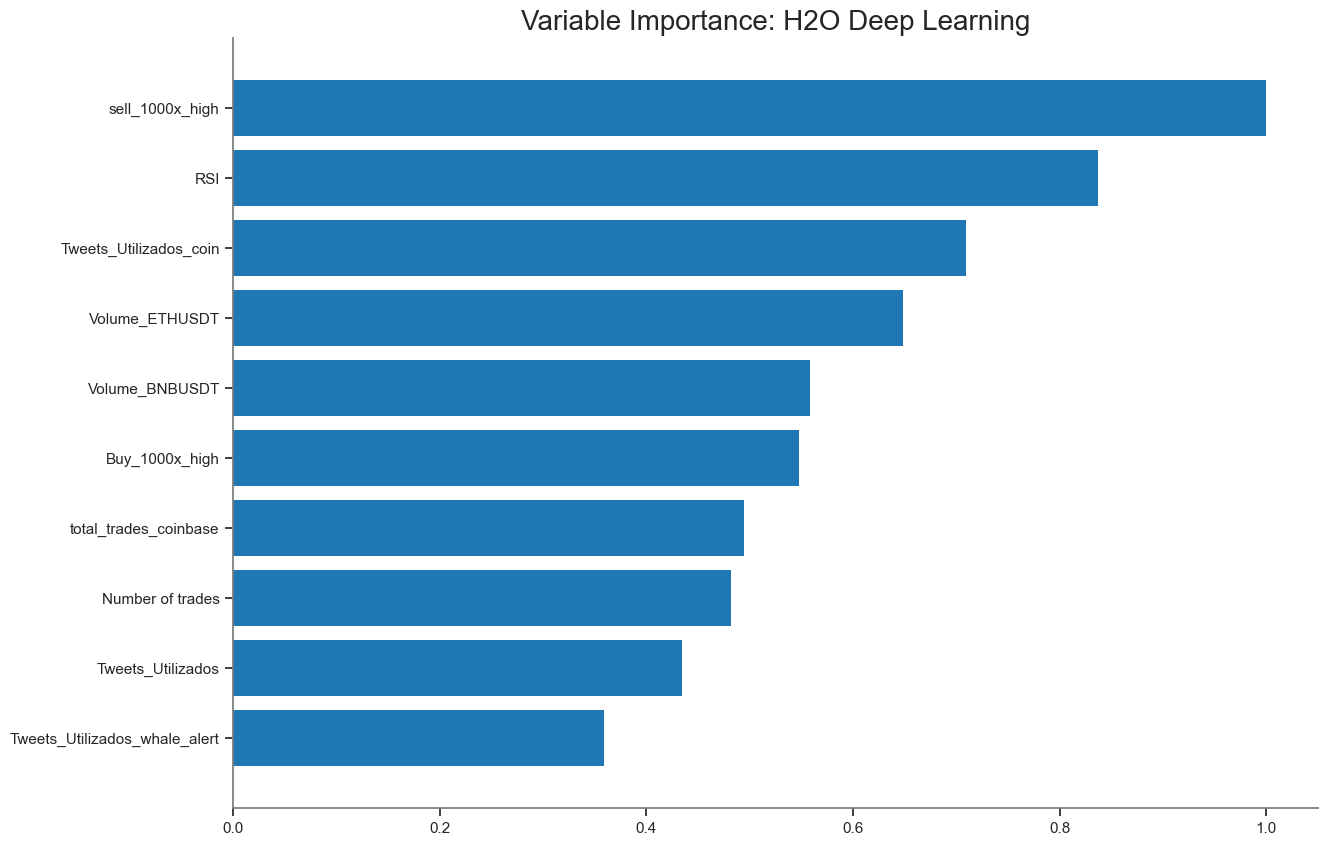

<Figure size 640x480 with 0 Axes>

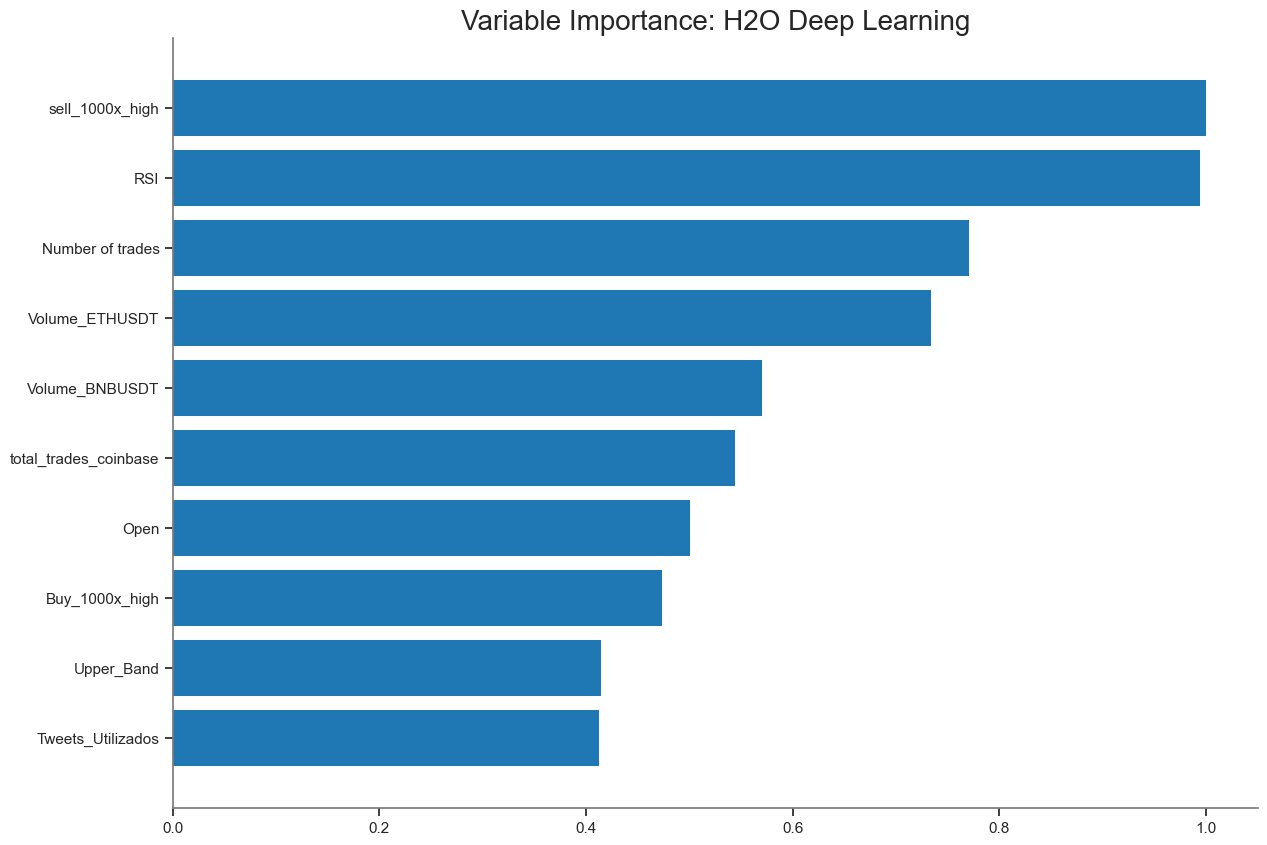

<Figure size 640x480 with 0 Axes>

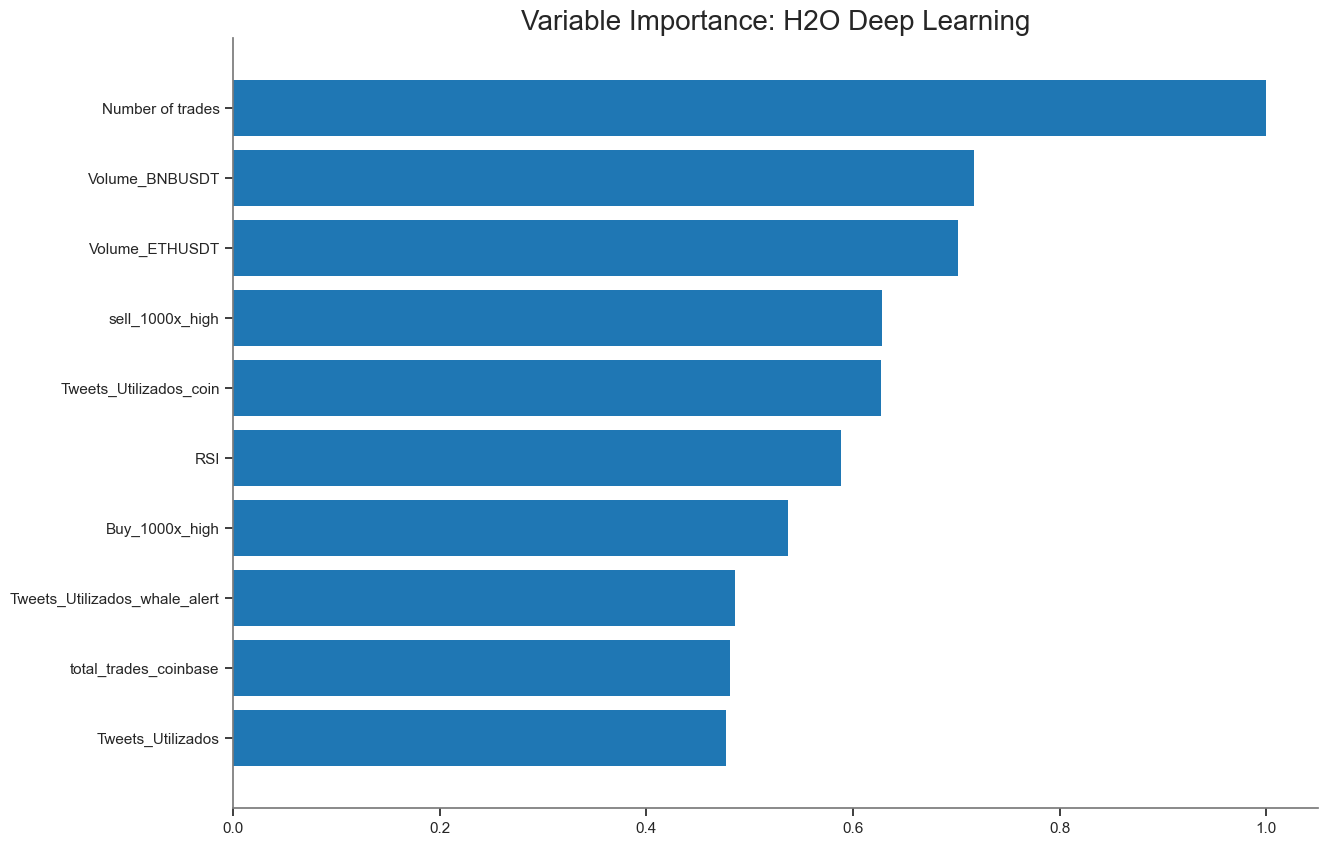

<Figure size 640x480 with 0 Axes>

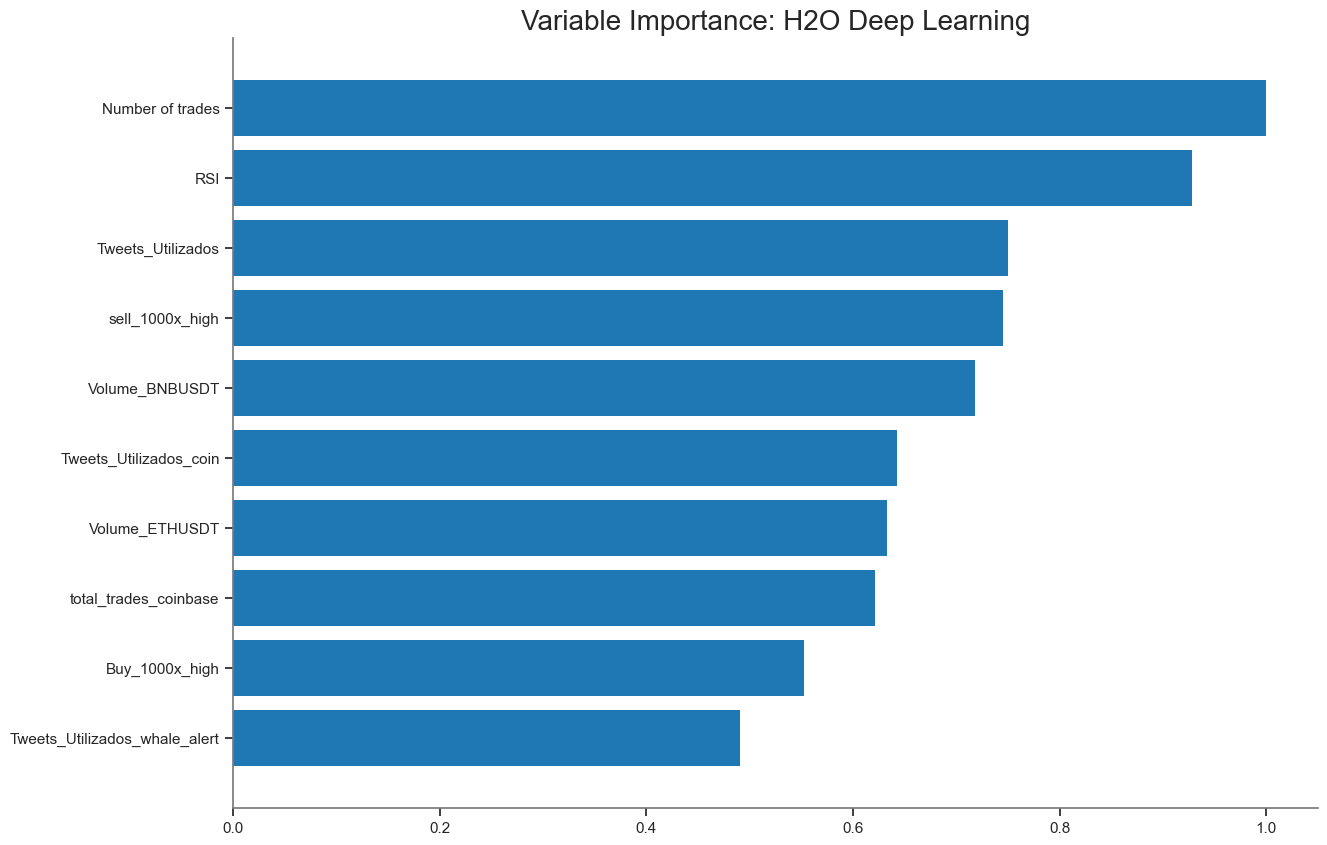

<Figure size 640x480 with 0 Axes>

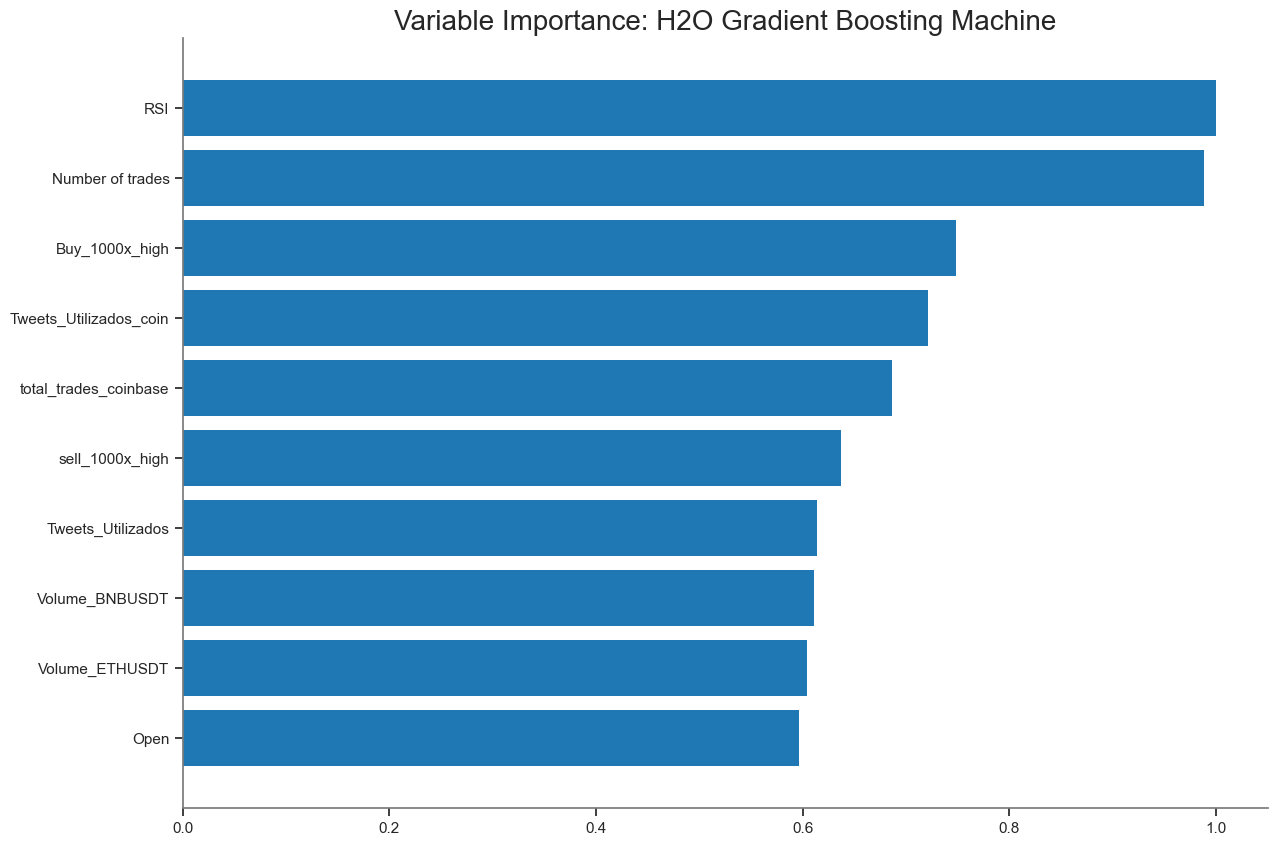

<Figure size 640x480 with 0 Axes>

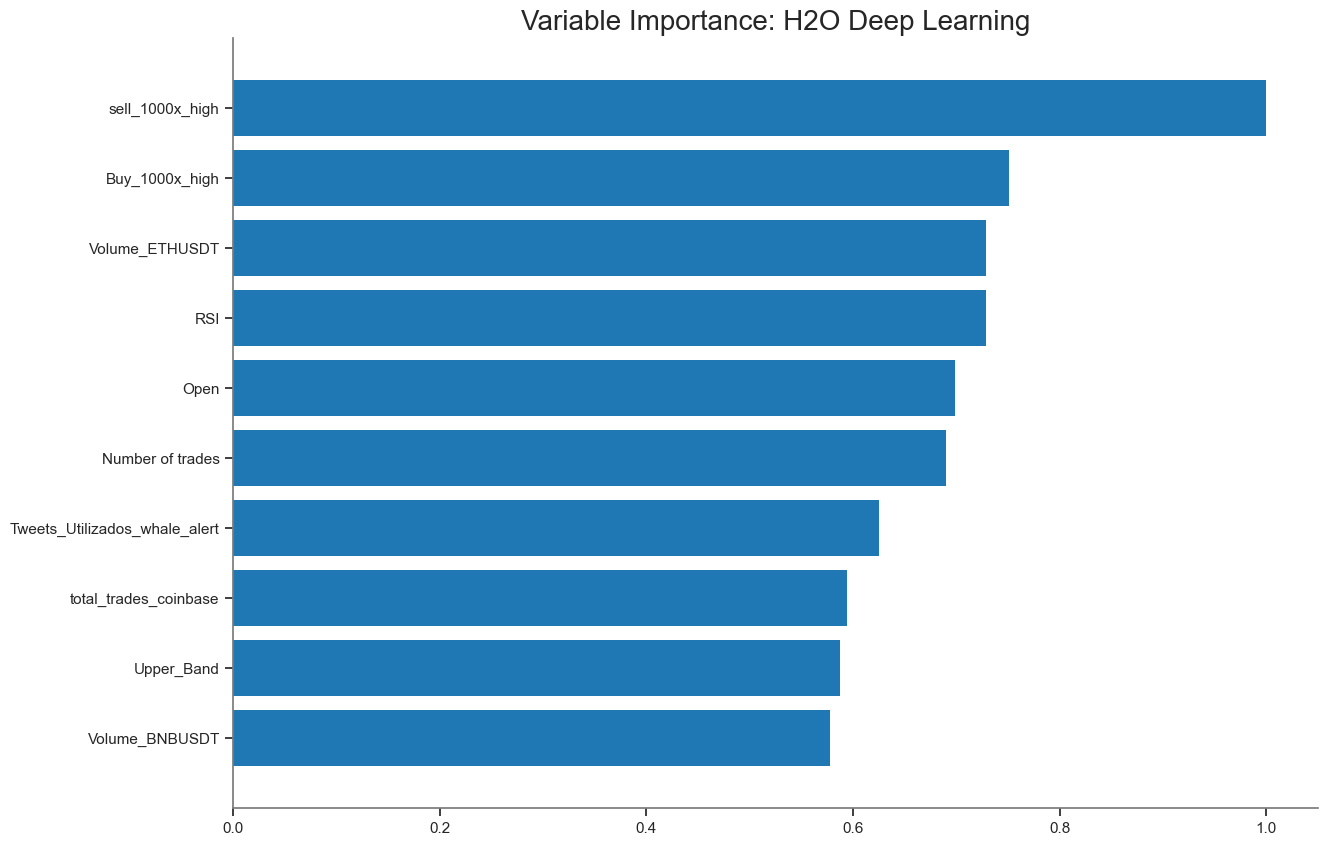

<Figure size 640x480 with 0 Axes>

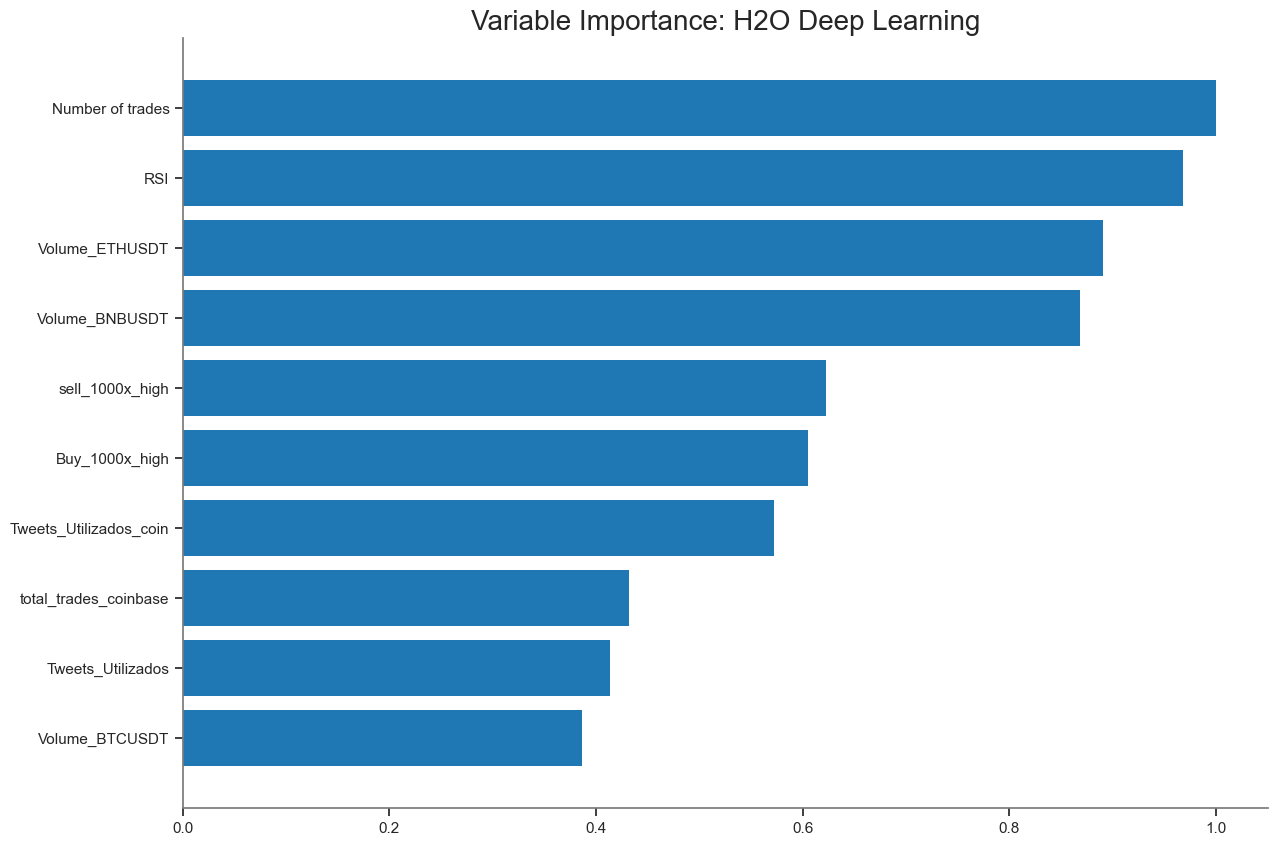

<Figure size 640x480 with 0 Axes>

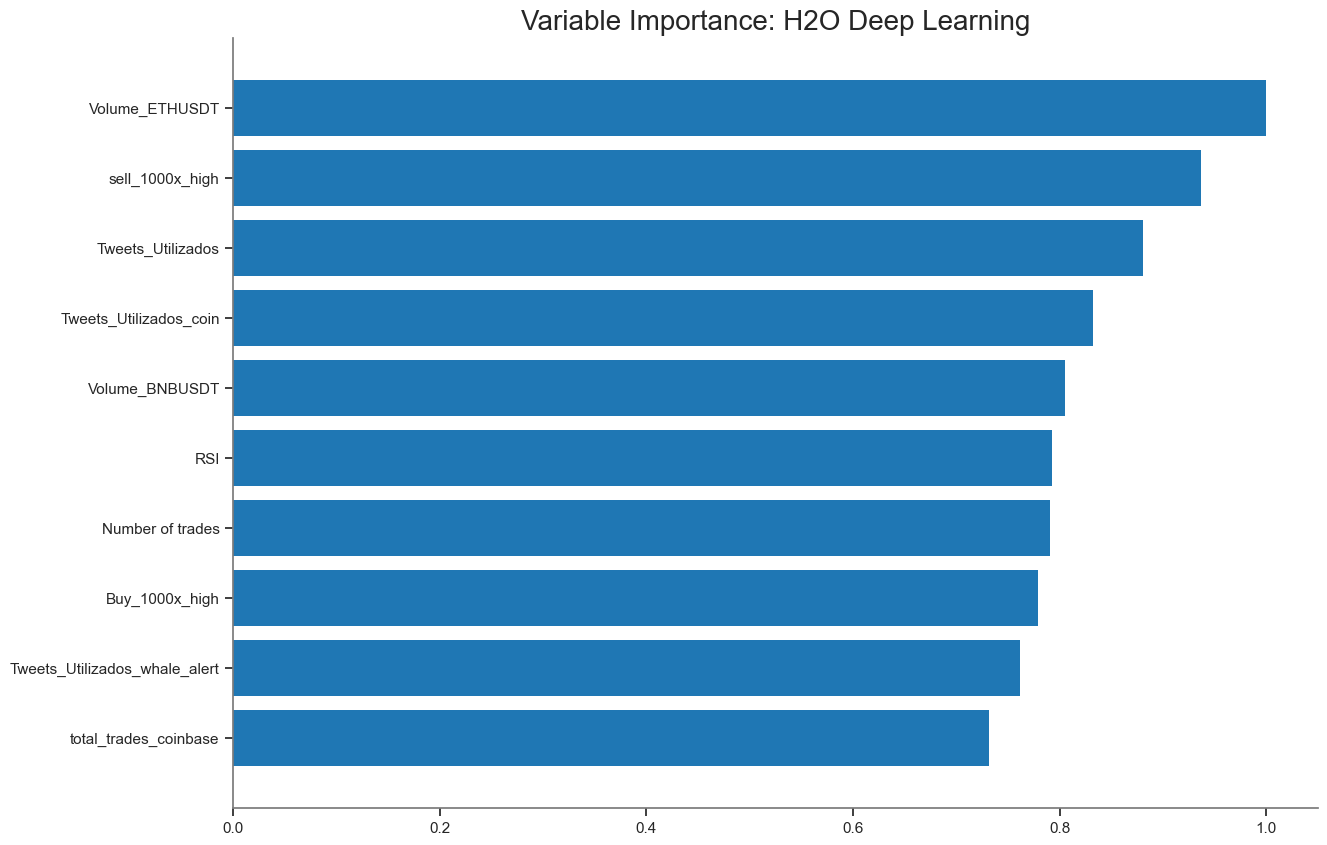

<Figure size 640x480 with 0 Axes>

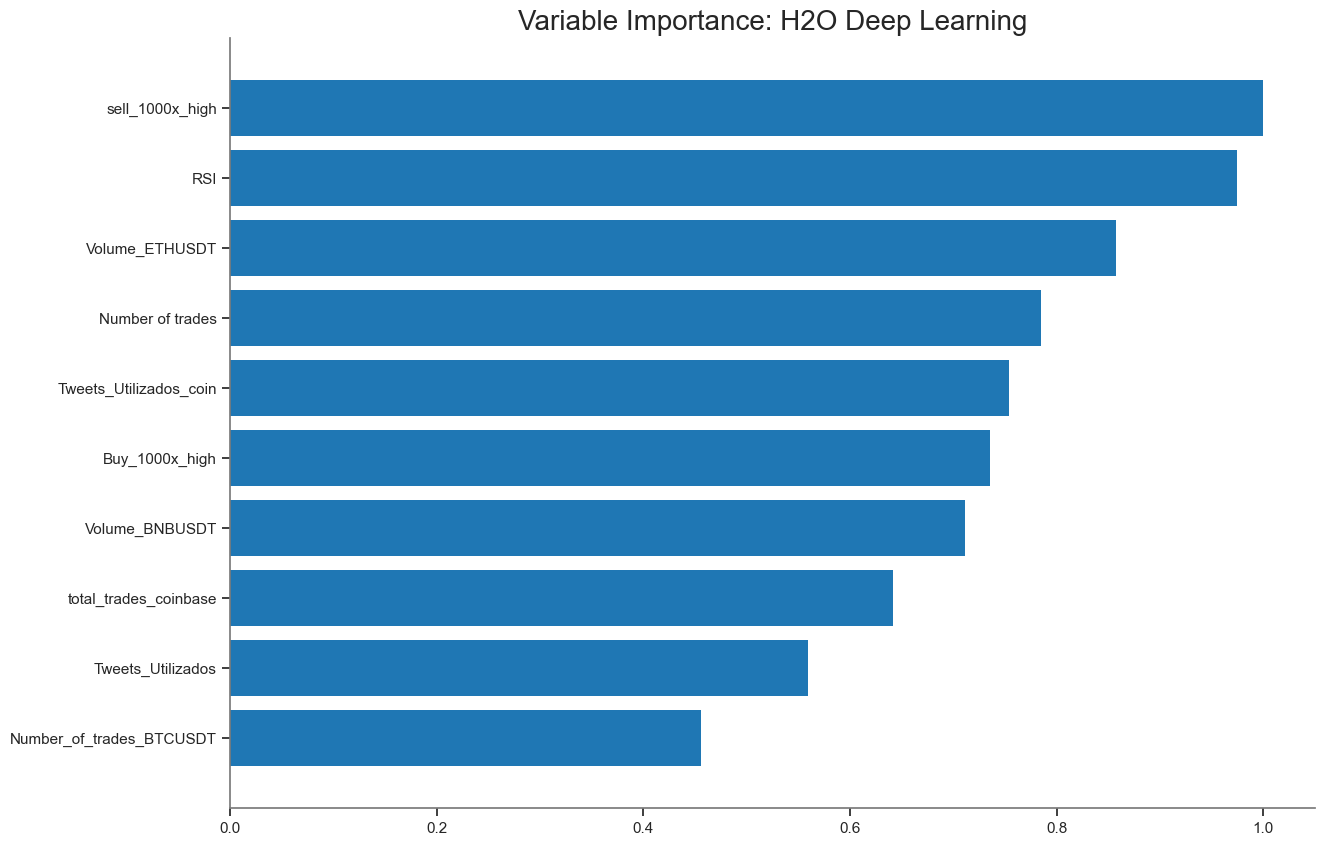

<Figure size 640x480 with 0 Axes>

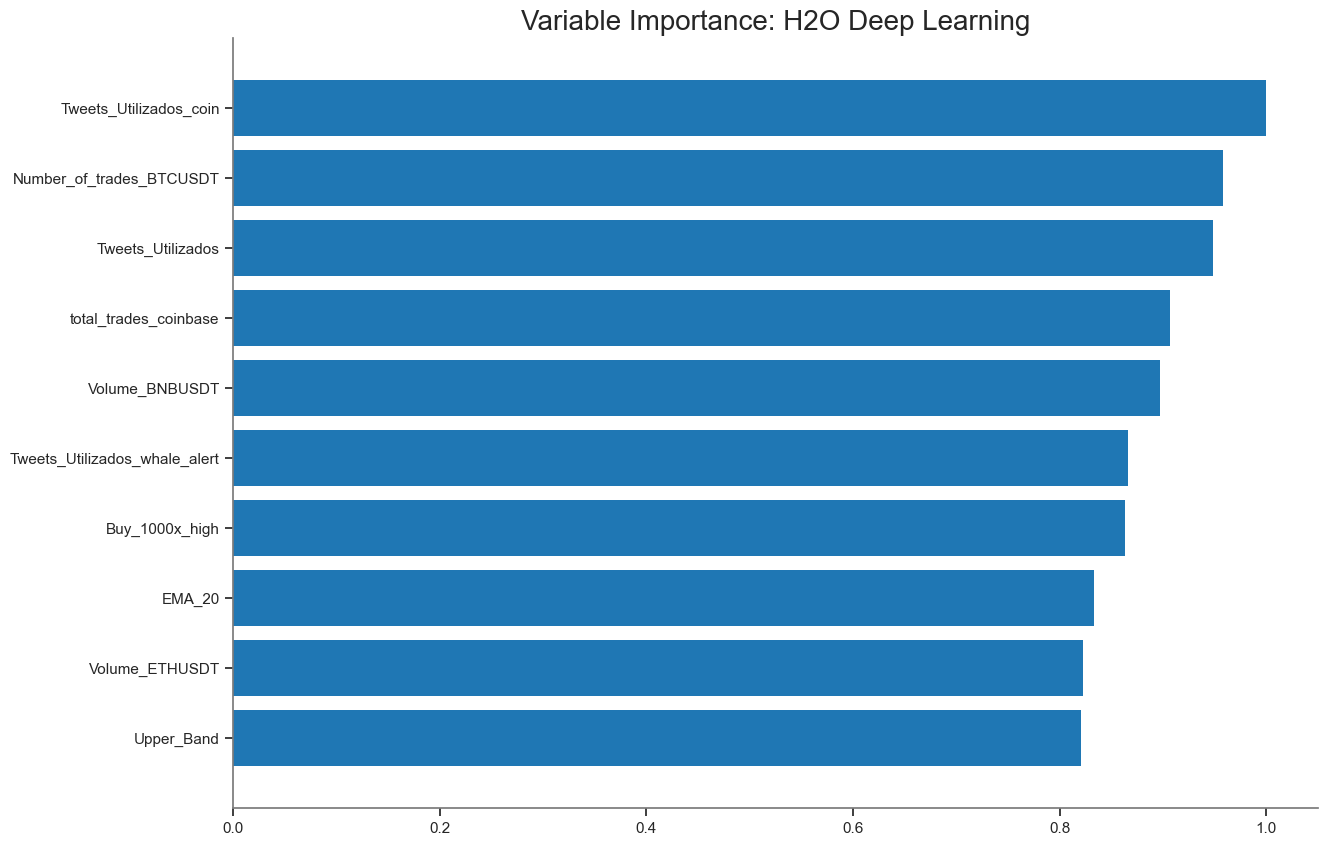

<Figure size 640x480 with 0 Axes>

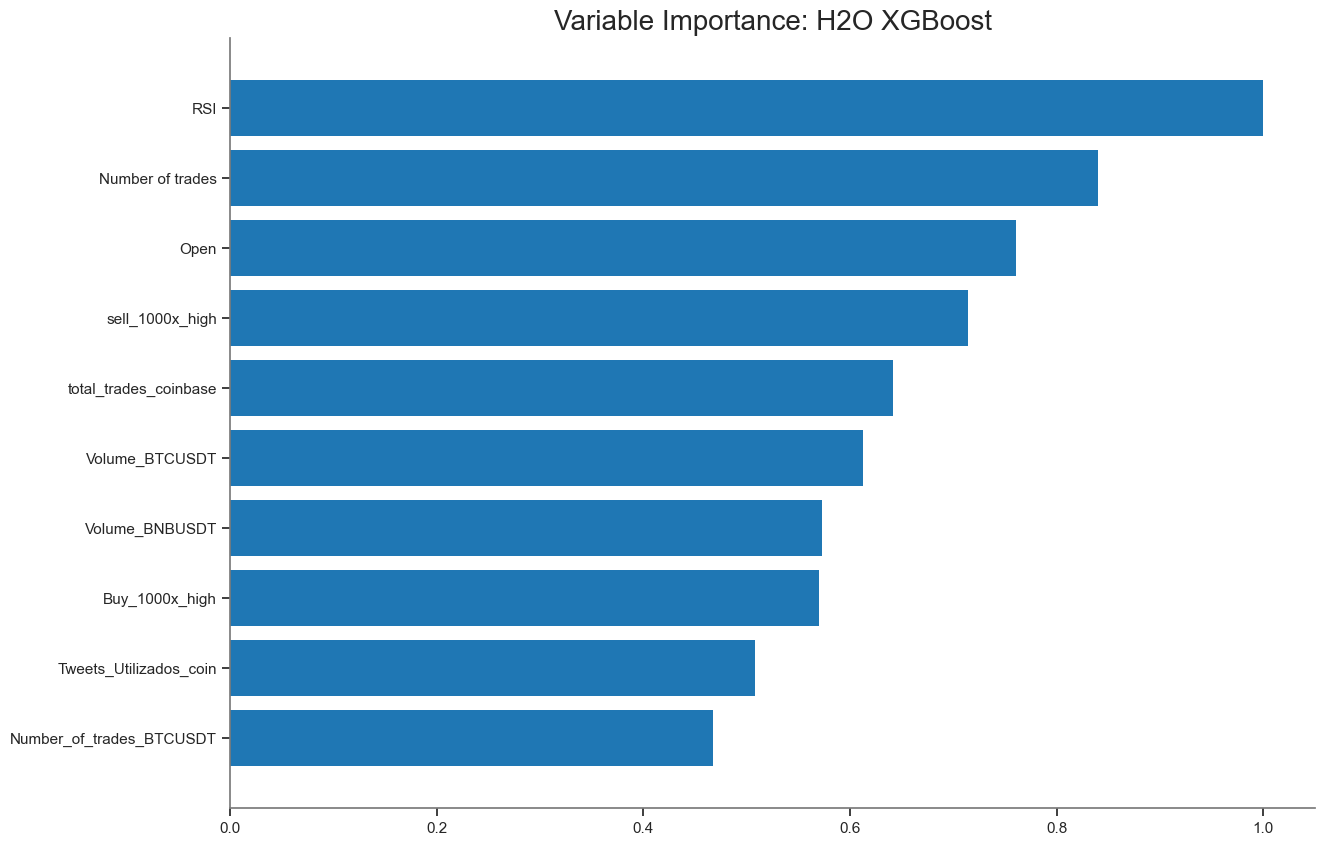

<Figure size 640x480 with 0 Axes>

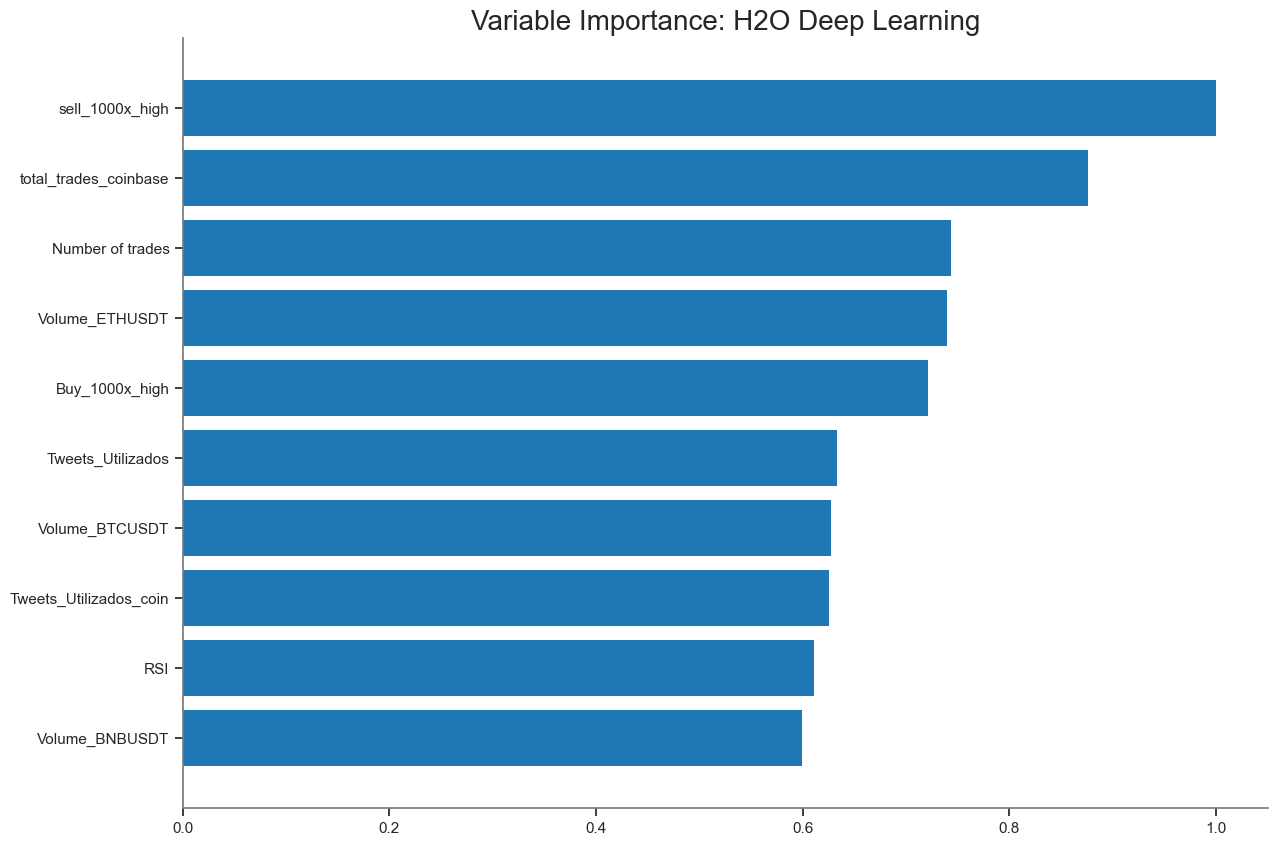

<Figure size 640x480 with 0 Axes>

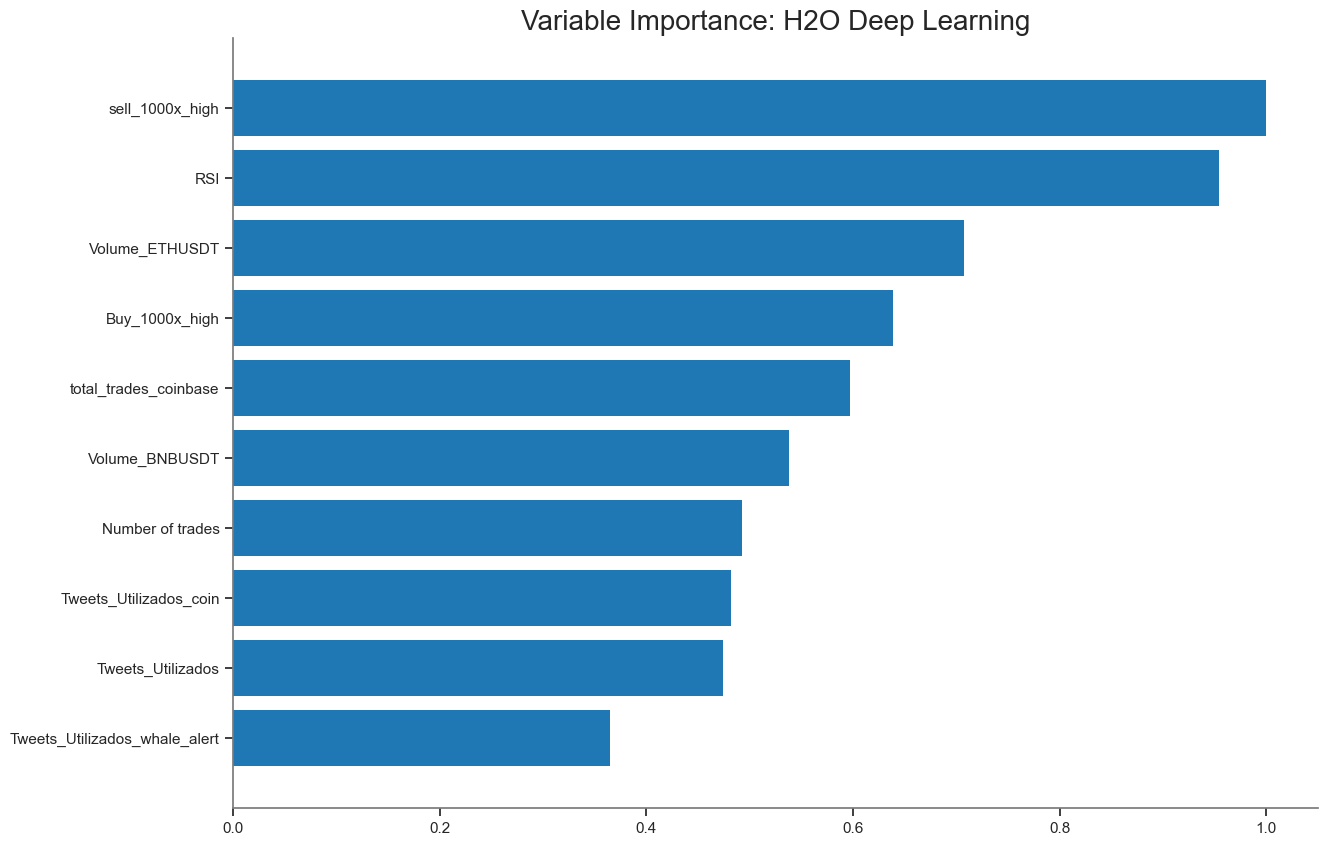

<Figure size 640x480 with 0 Axes>

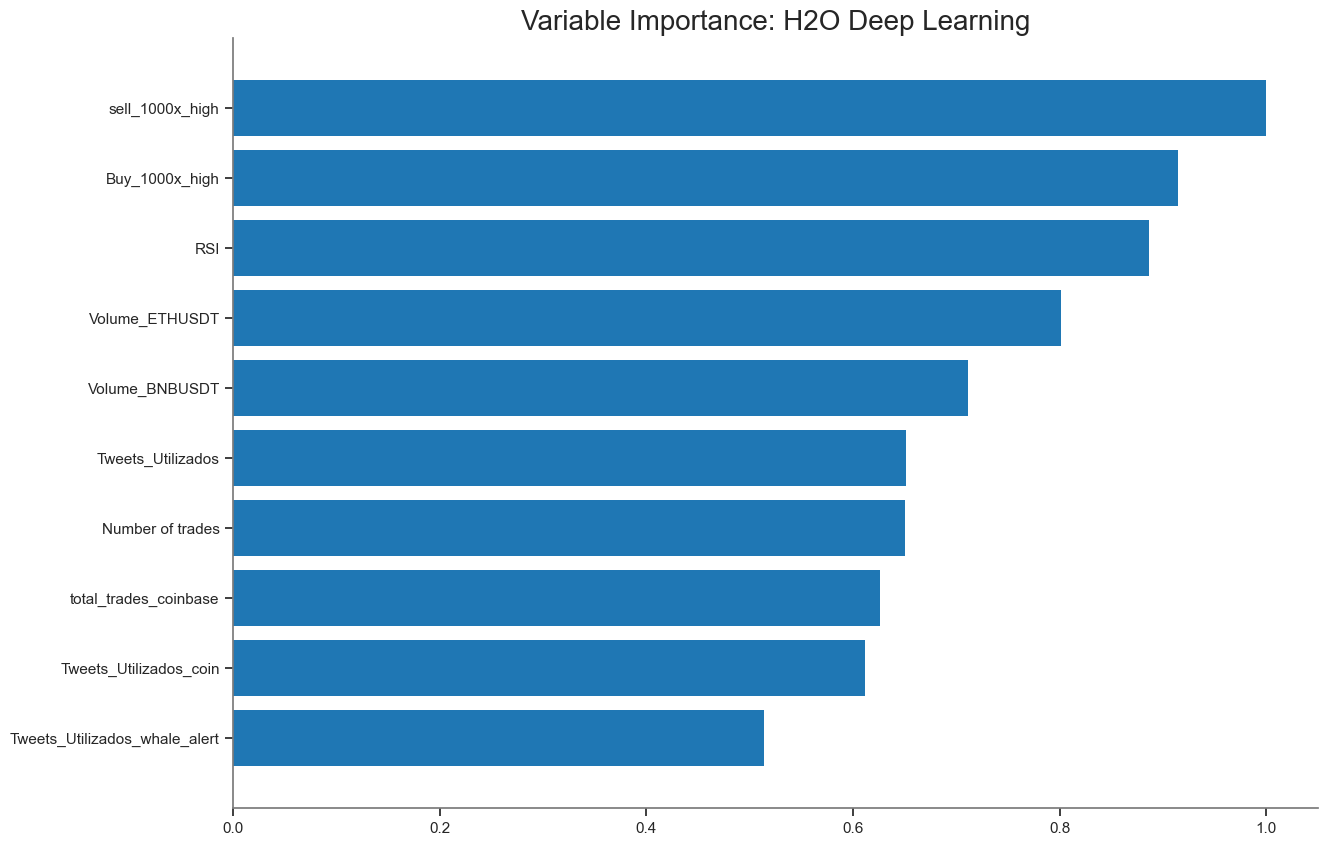

<Figure size 640x480 with 0 Axes>

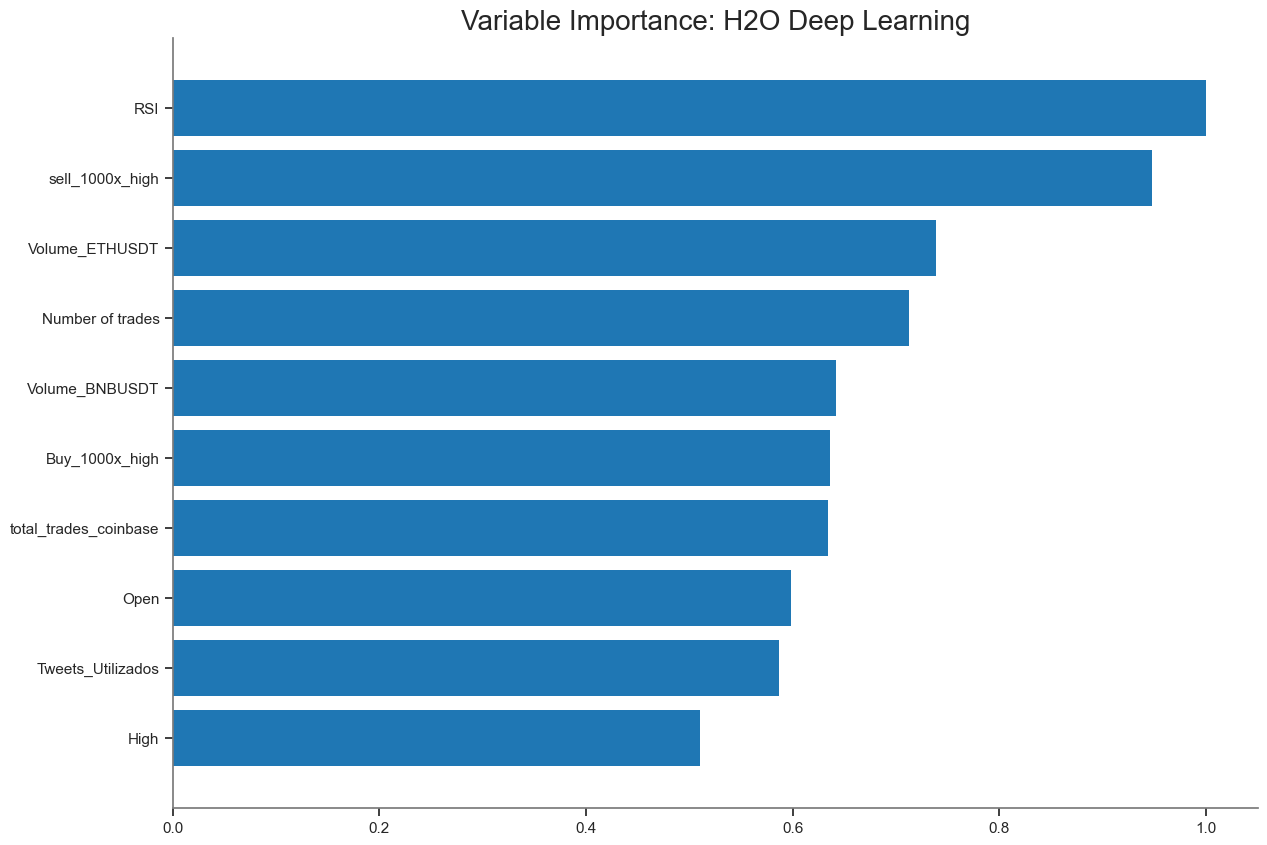

<Figure size 640x480 with 0 Axes>

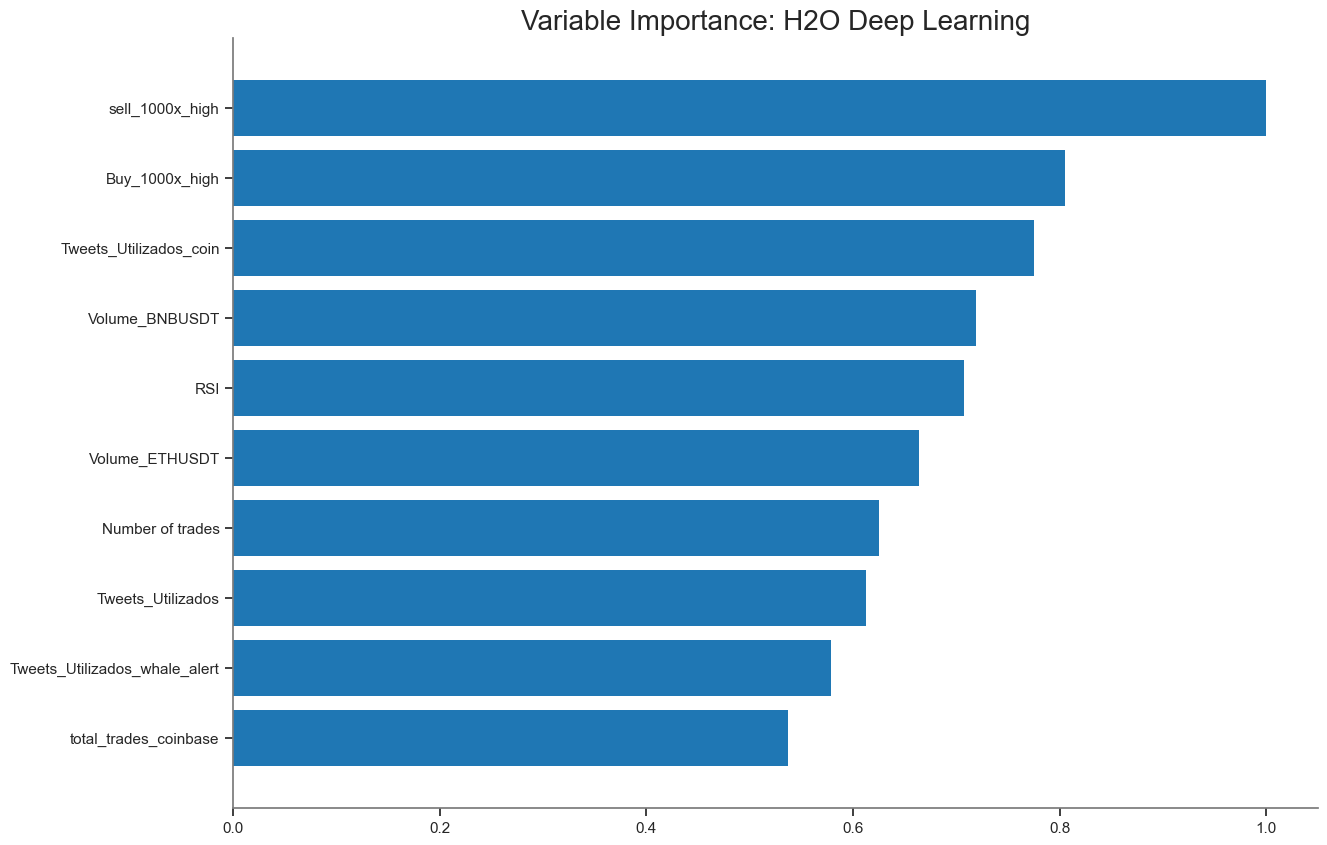

<Figure size 640x480 with 0 Axes>

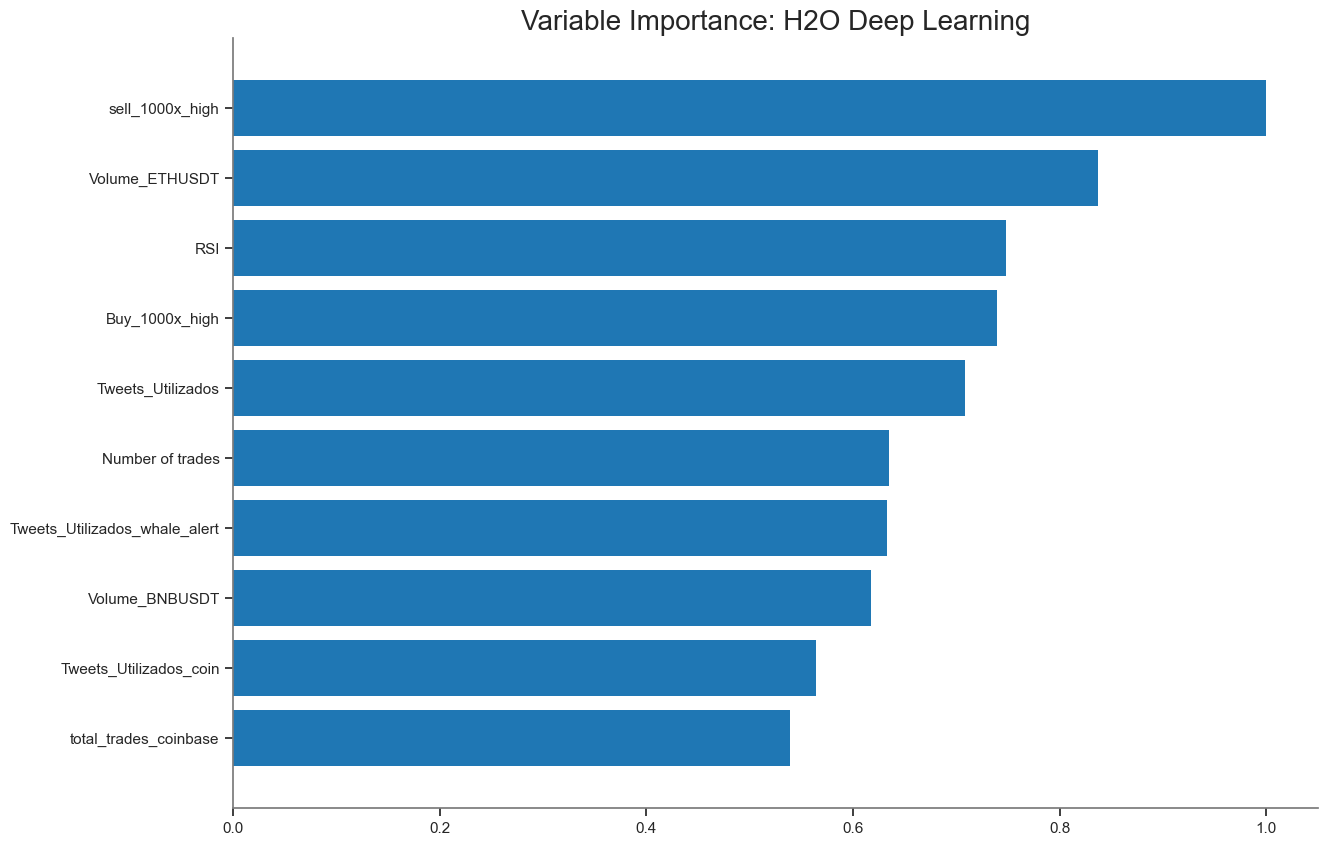

<Figure size 640x480 with 0 Axes>

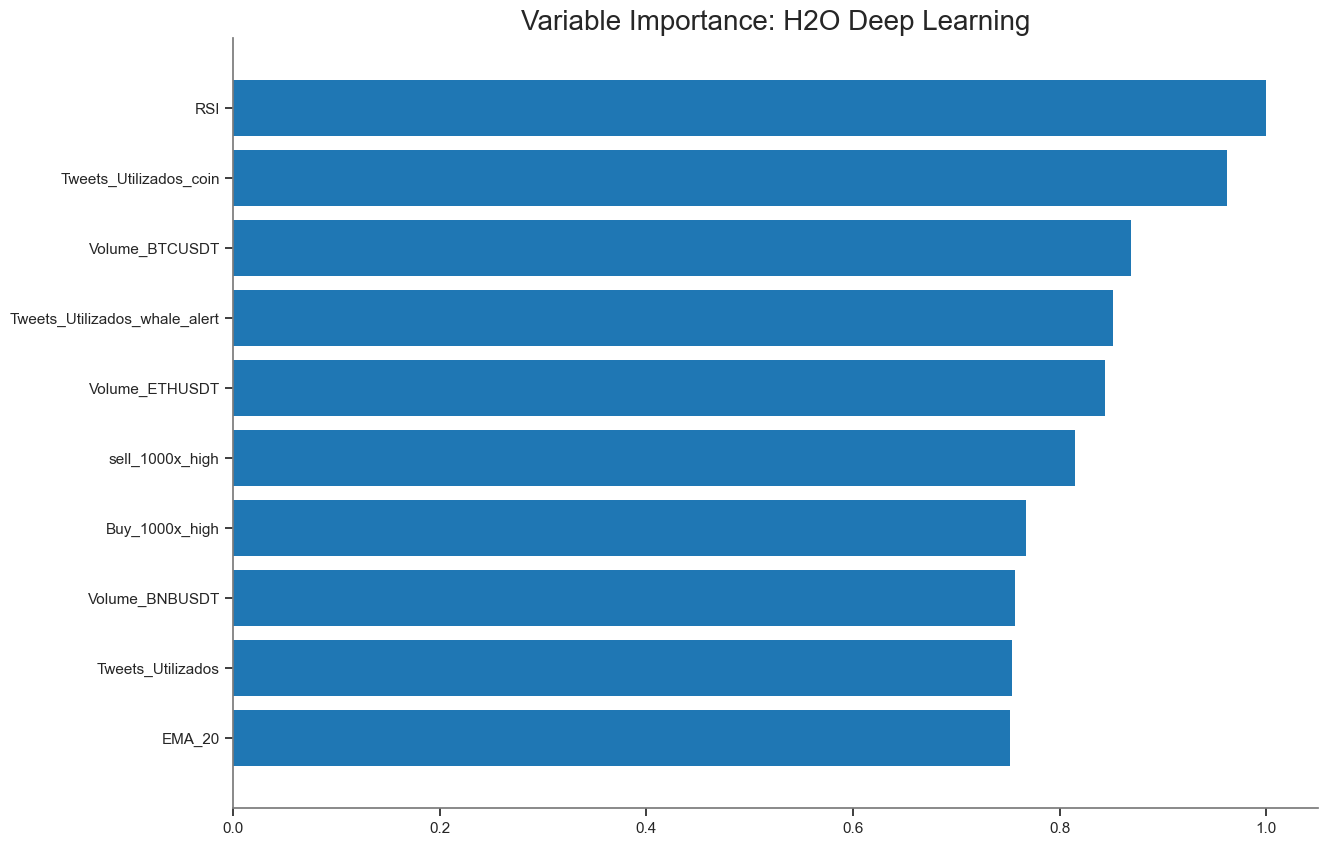

<Figure size 640x480 with 0 Axes>

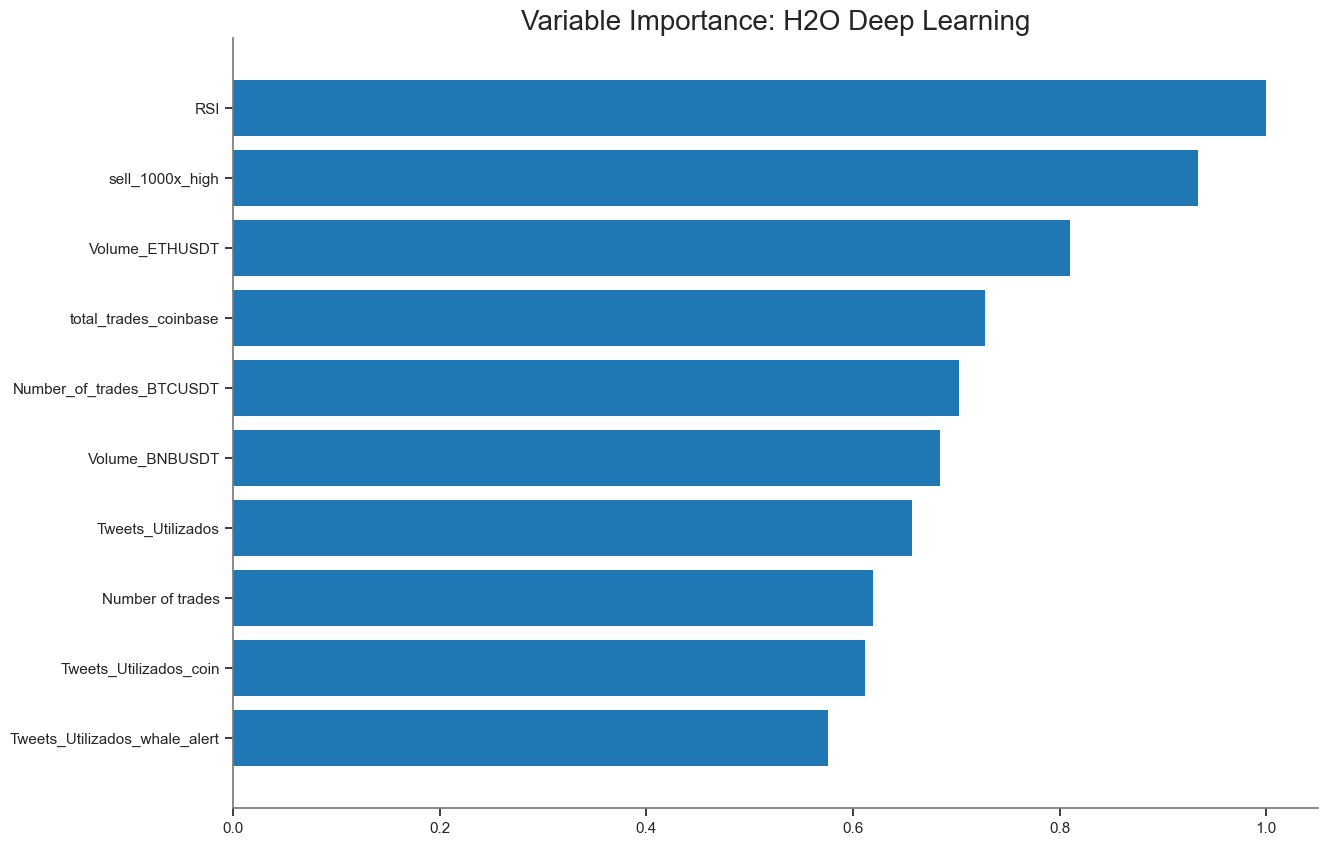

<Figure size 640x480 with 0 Axes>

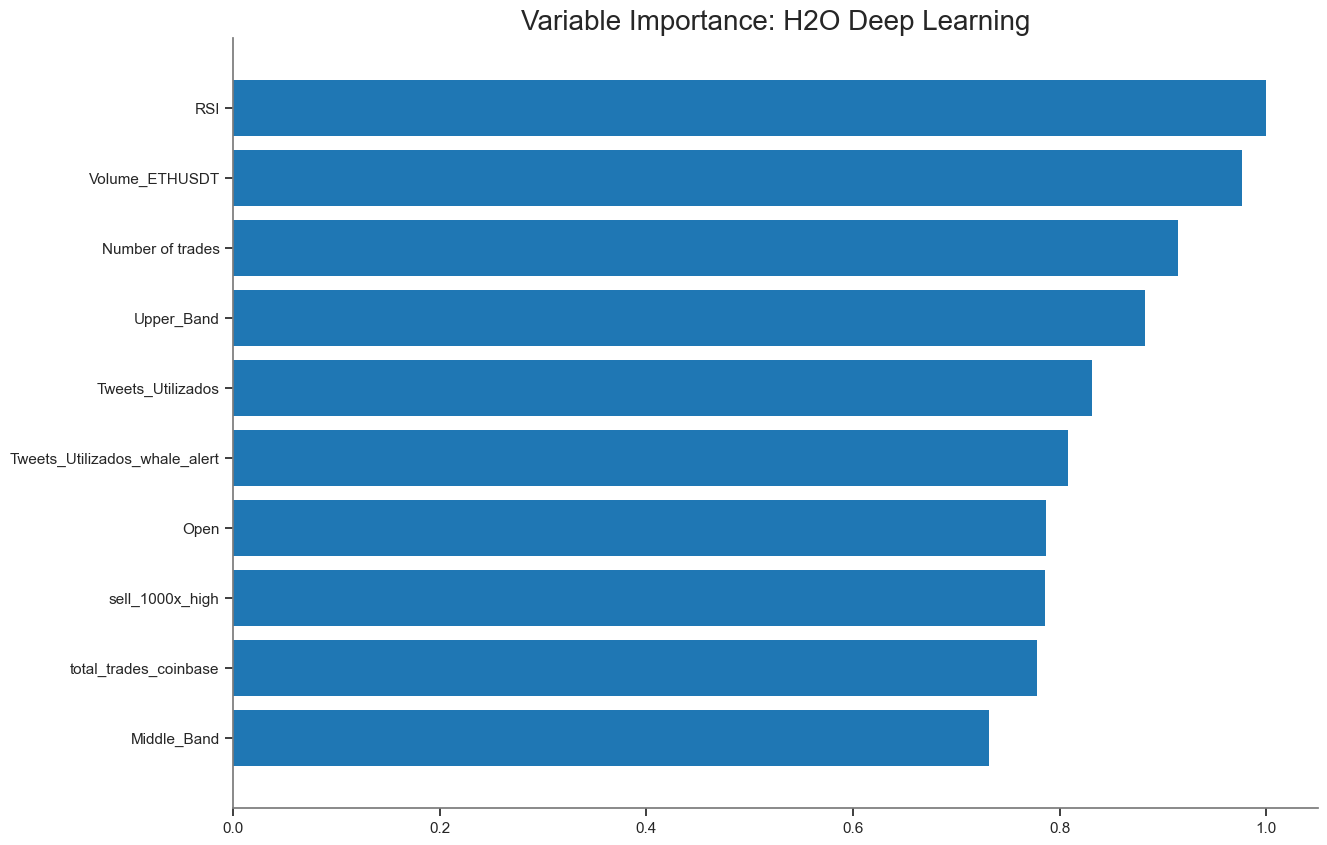

<Figure size 640x480 with 0 Axes>

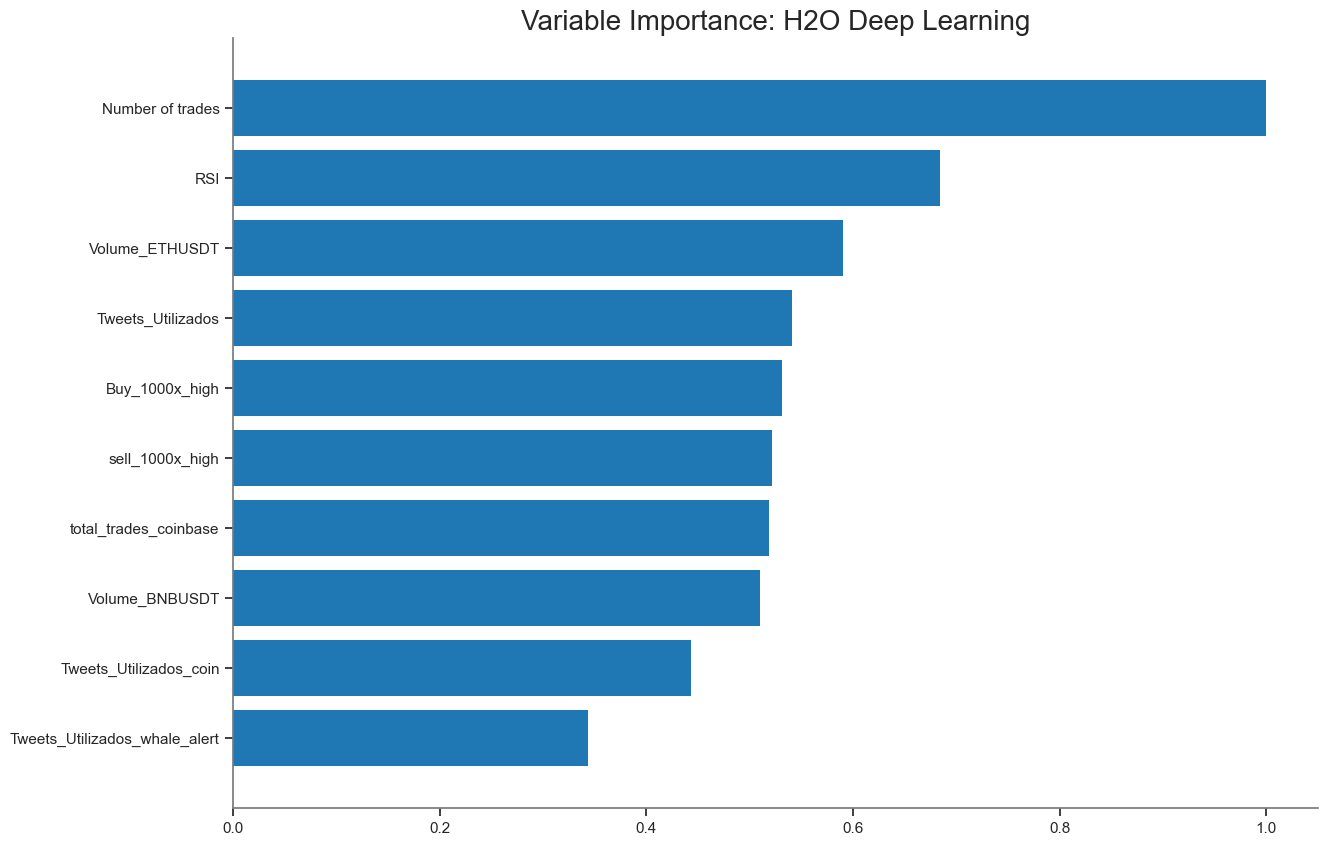

<Figure size 640x480 with 0 Axes>

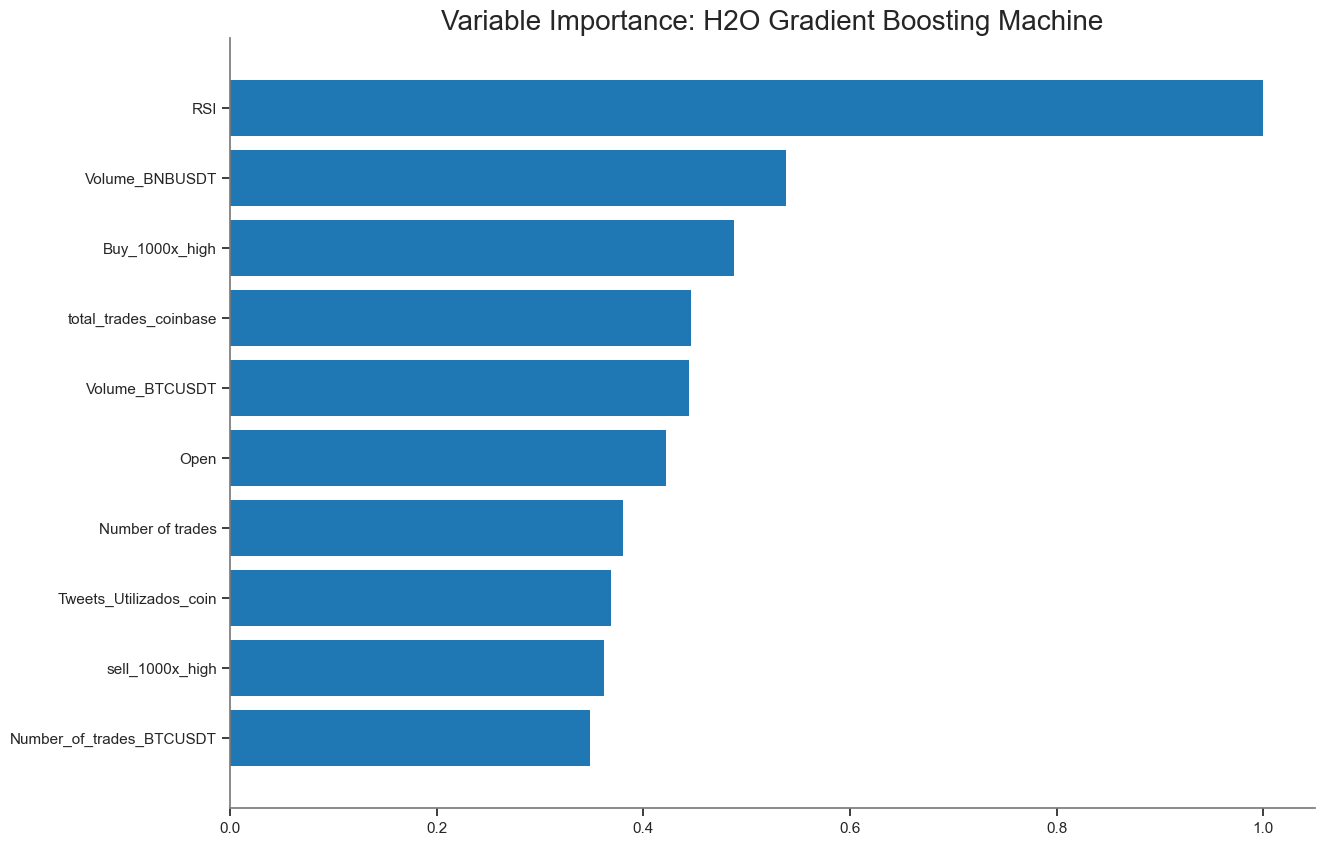

<Figure size 640x480 with 0 Axes>

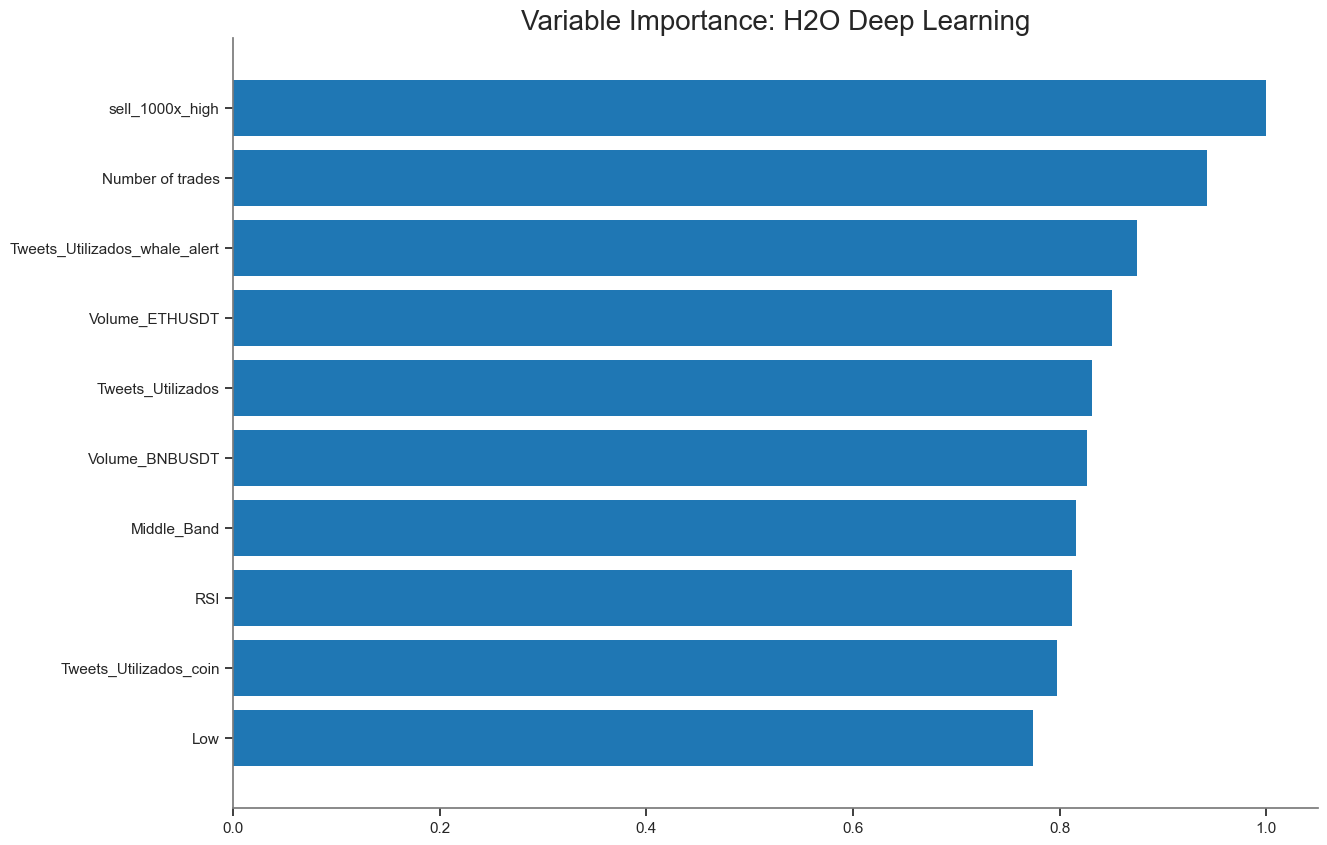

<Figure size 640x480 with 0 Axes>

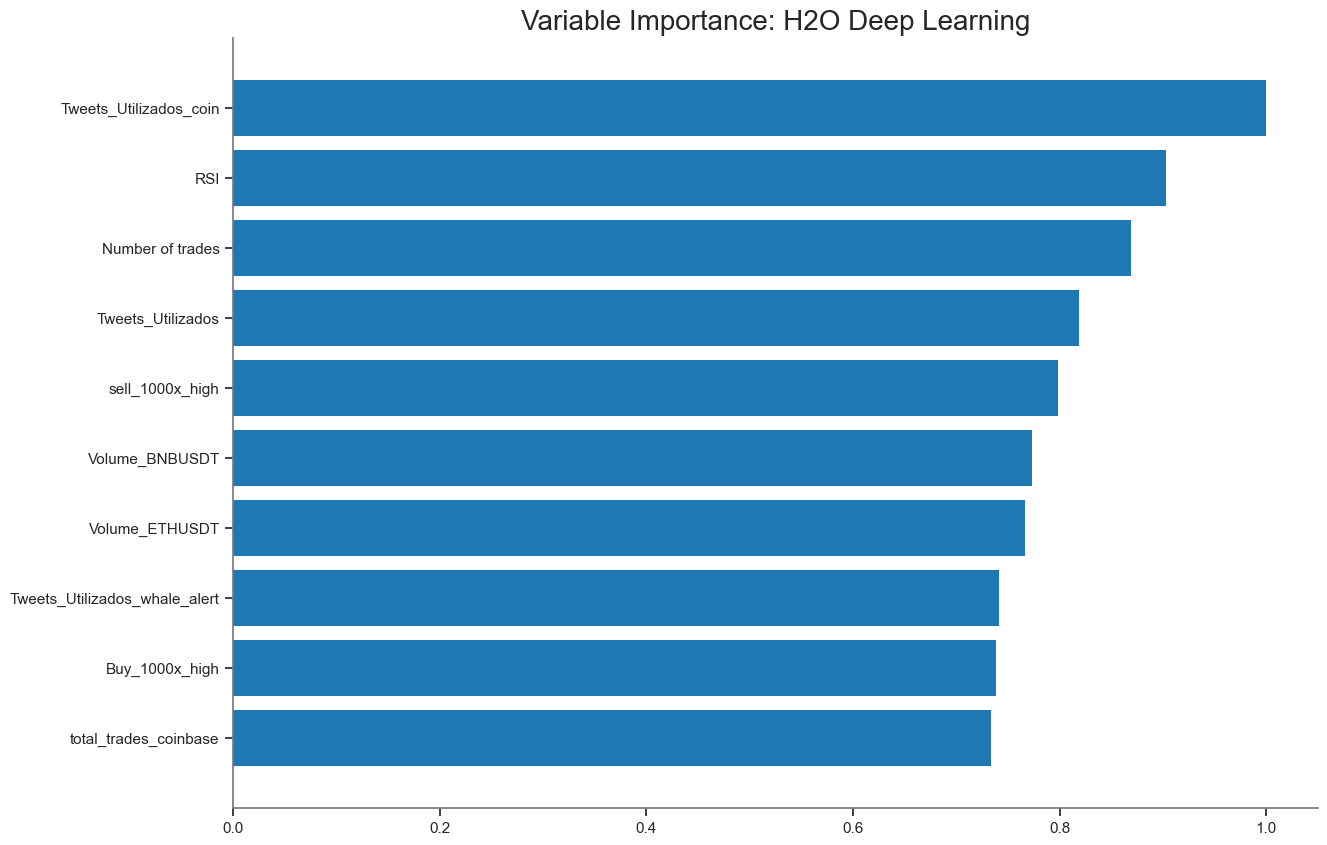

<Figure size 640x480 with 0 Axes>

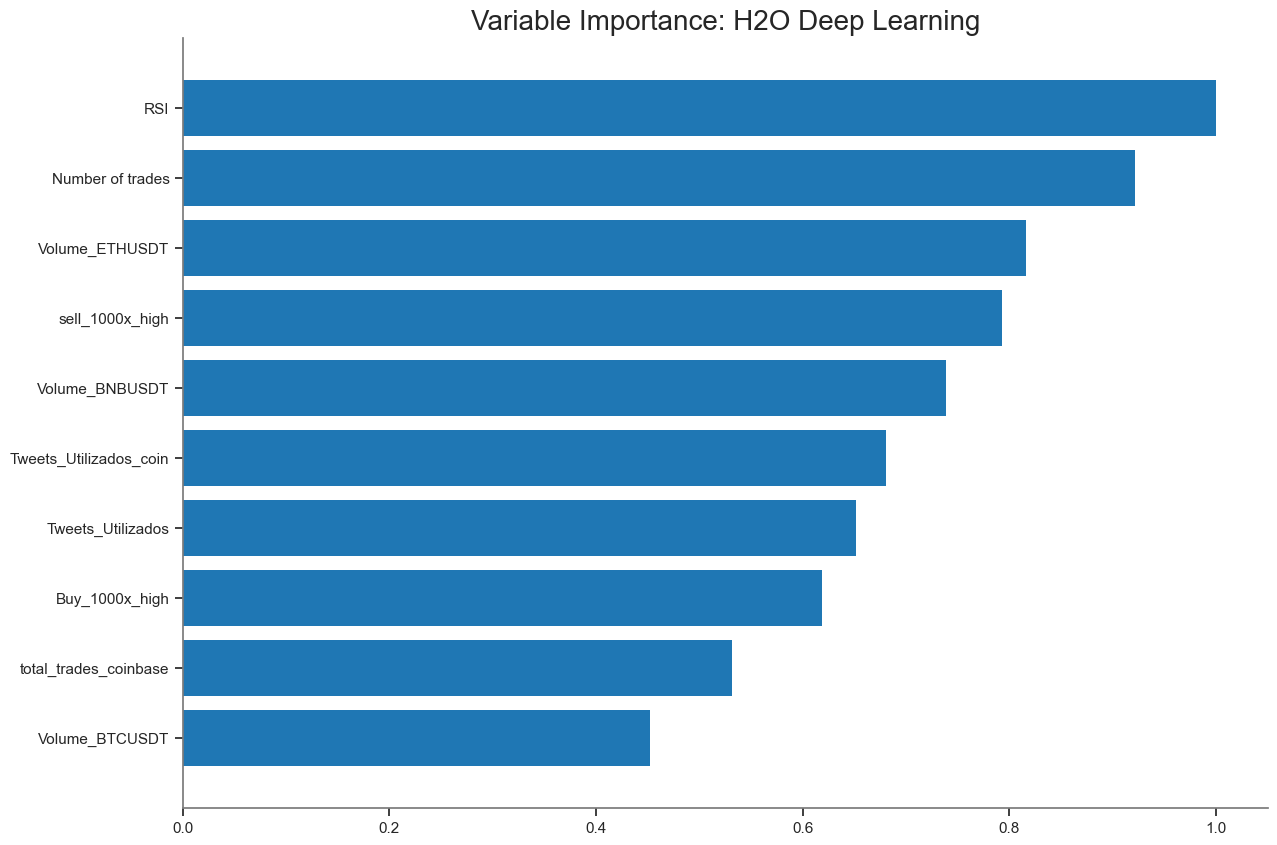

<Figure size 640x480 with 0 Axes>

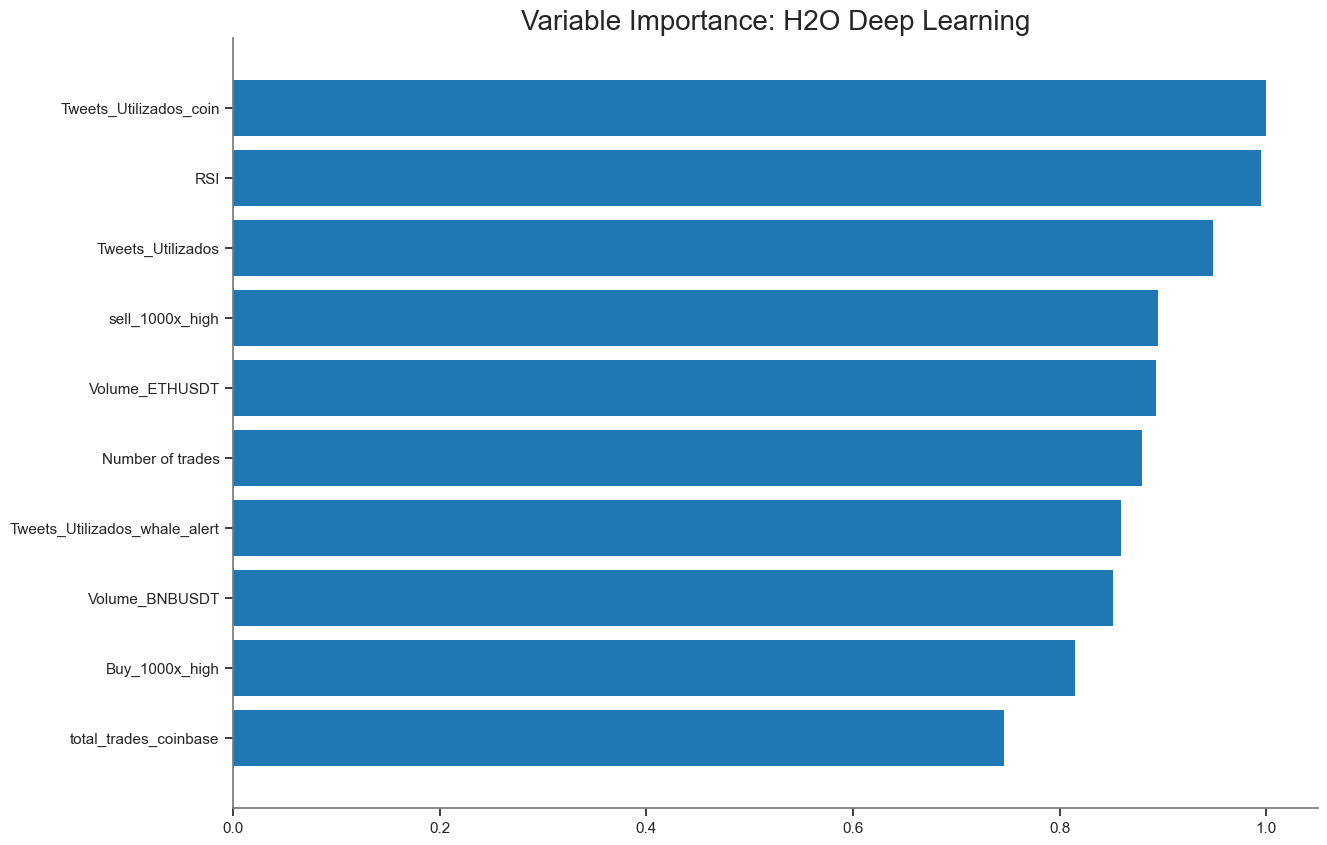

<Figure size 640x480 with 0 Axes>

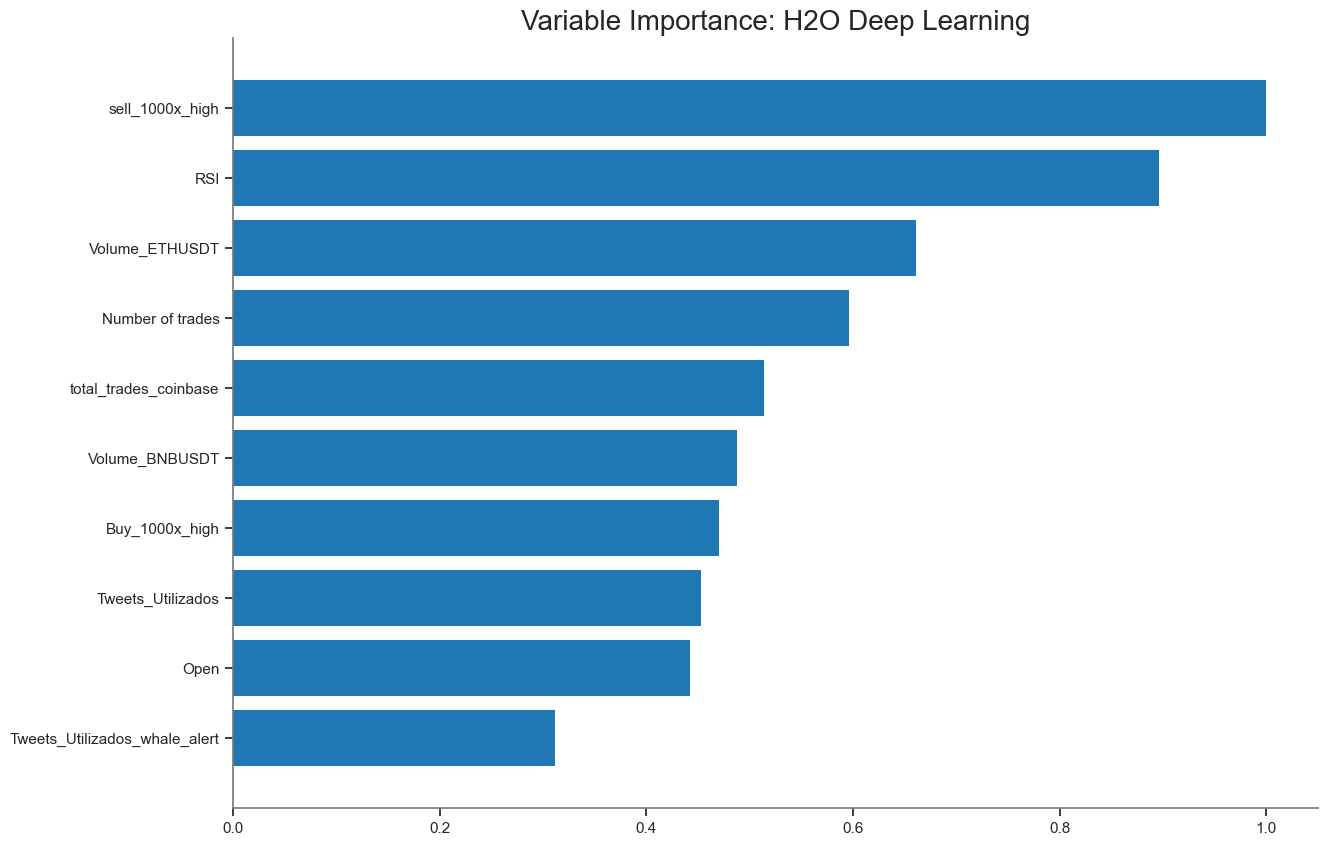

<Figure size 640x480 with 0 Axes>

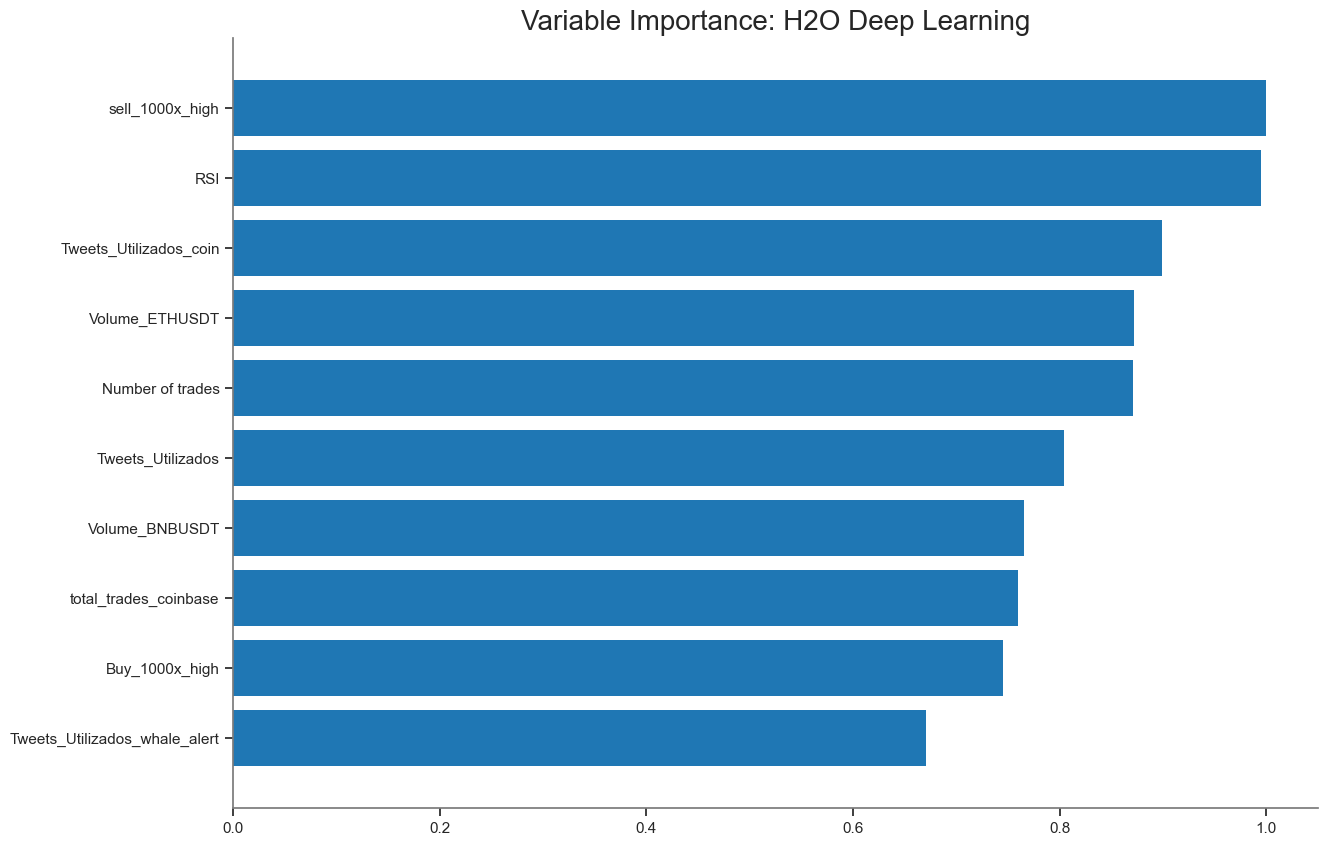

<Figure size 640x480 with 0 Axes>

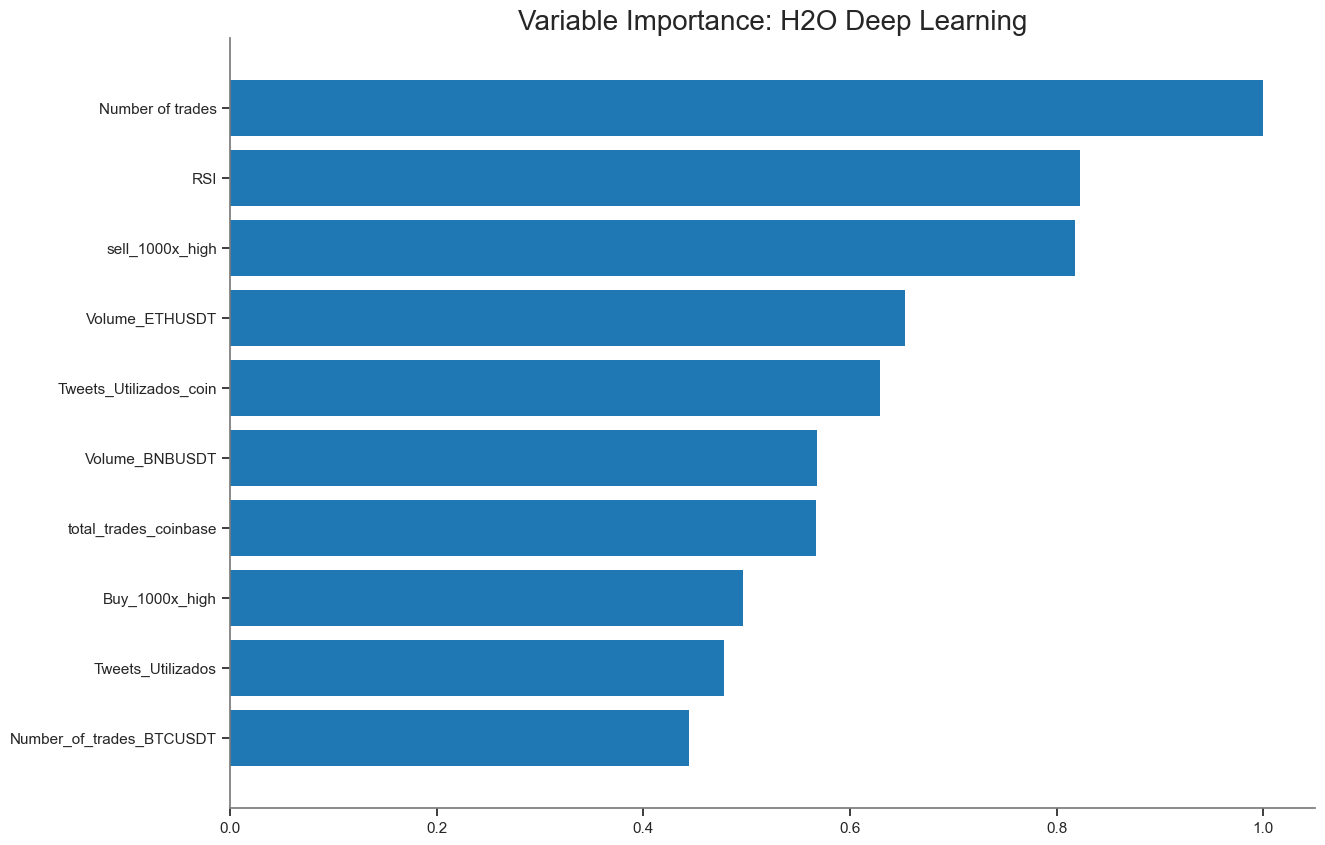

<Figure size 640x480 with 0 Axes>

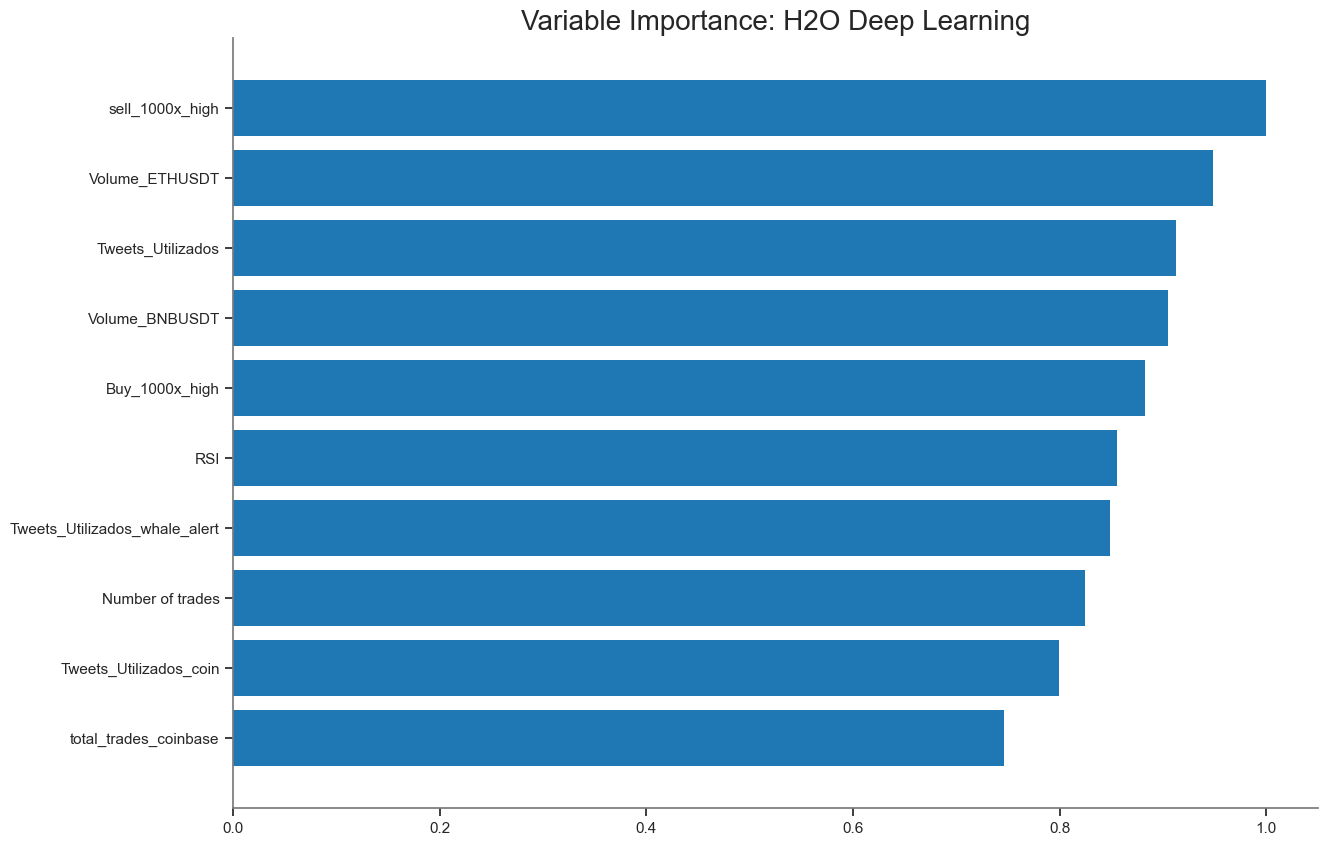

<Figure size 640x480 with 0 Axes>

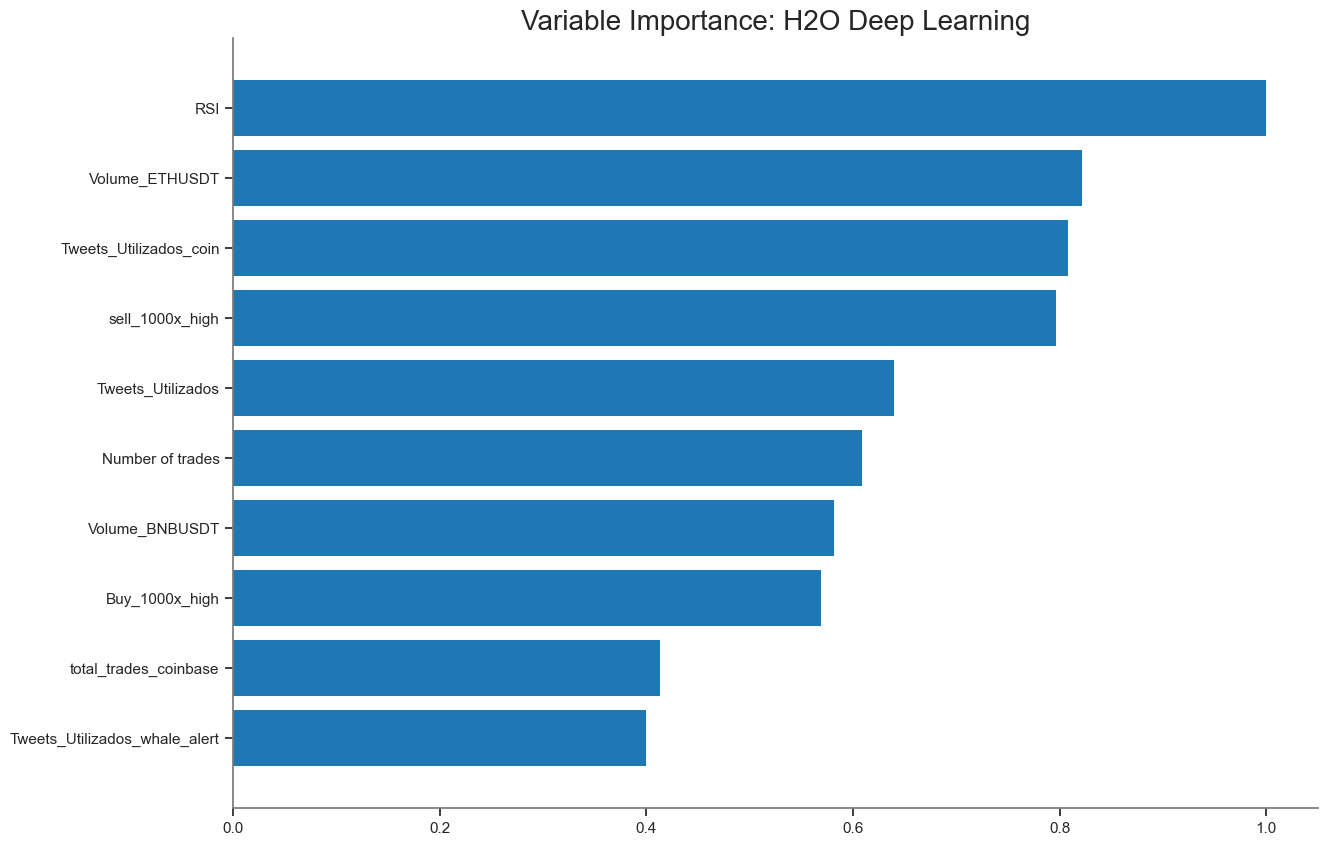

<Figure size 640x480 with 0 Axes>

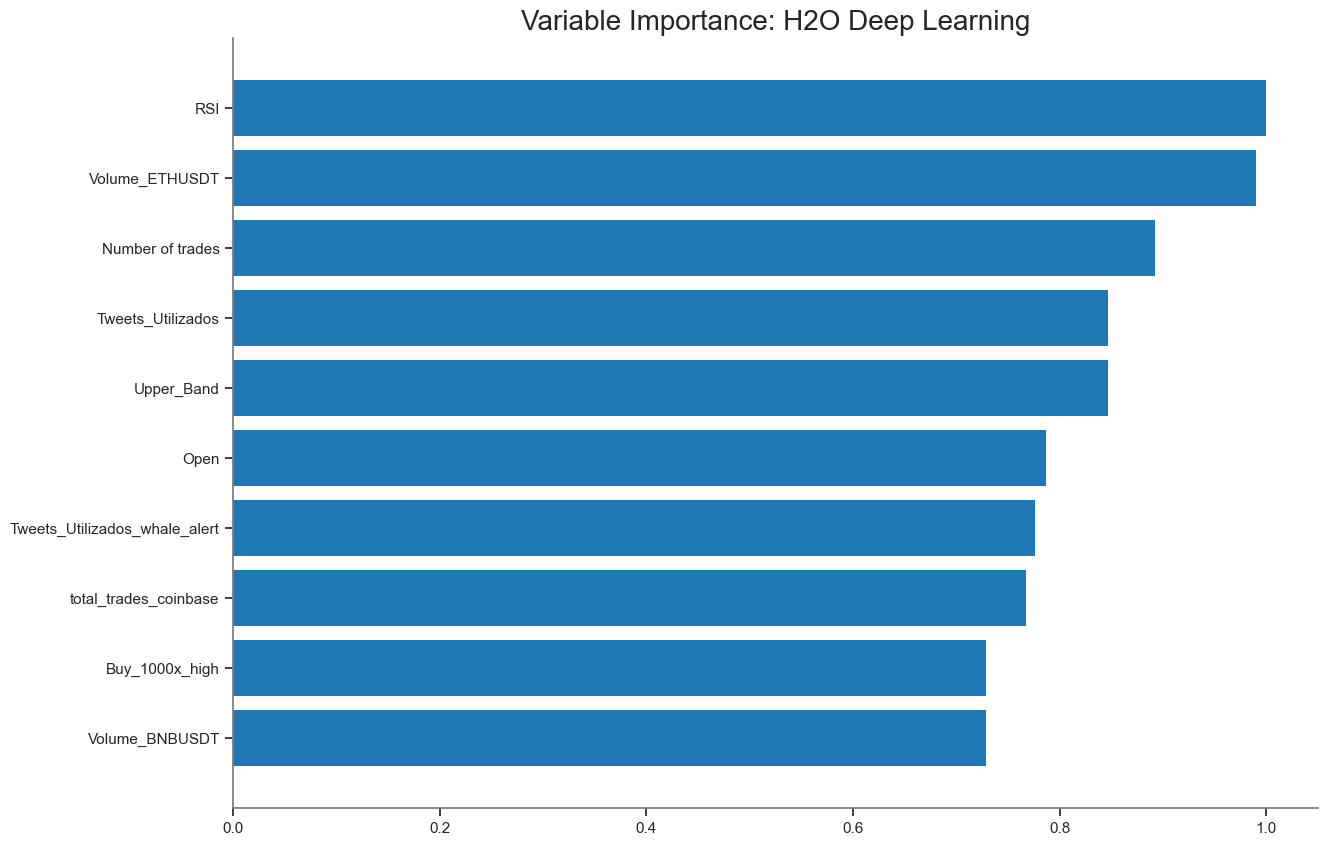

<Figure size 640x480 with 0 Axes>

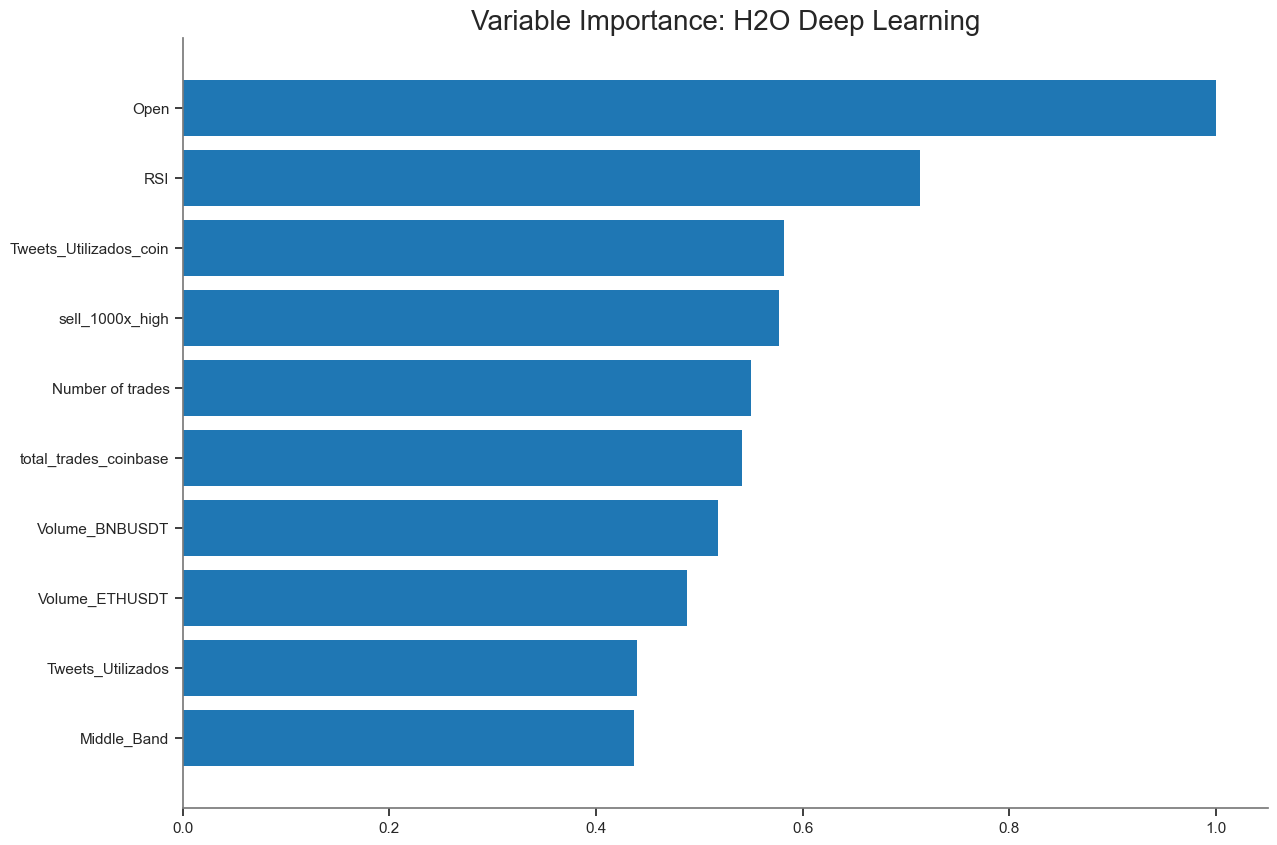

<Figure size 640x480 with 0 Axes>

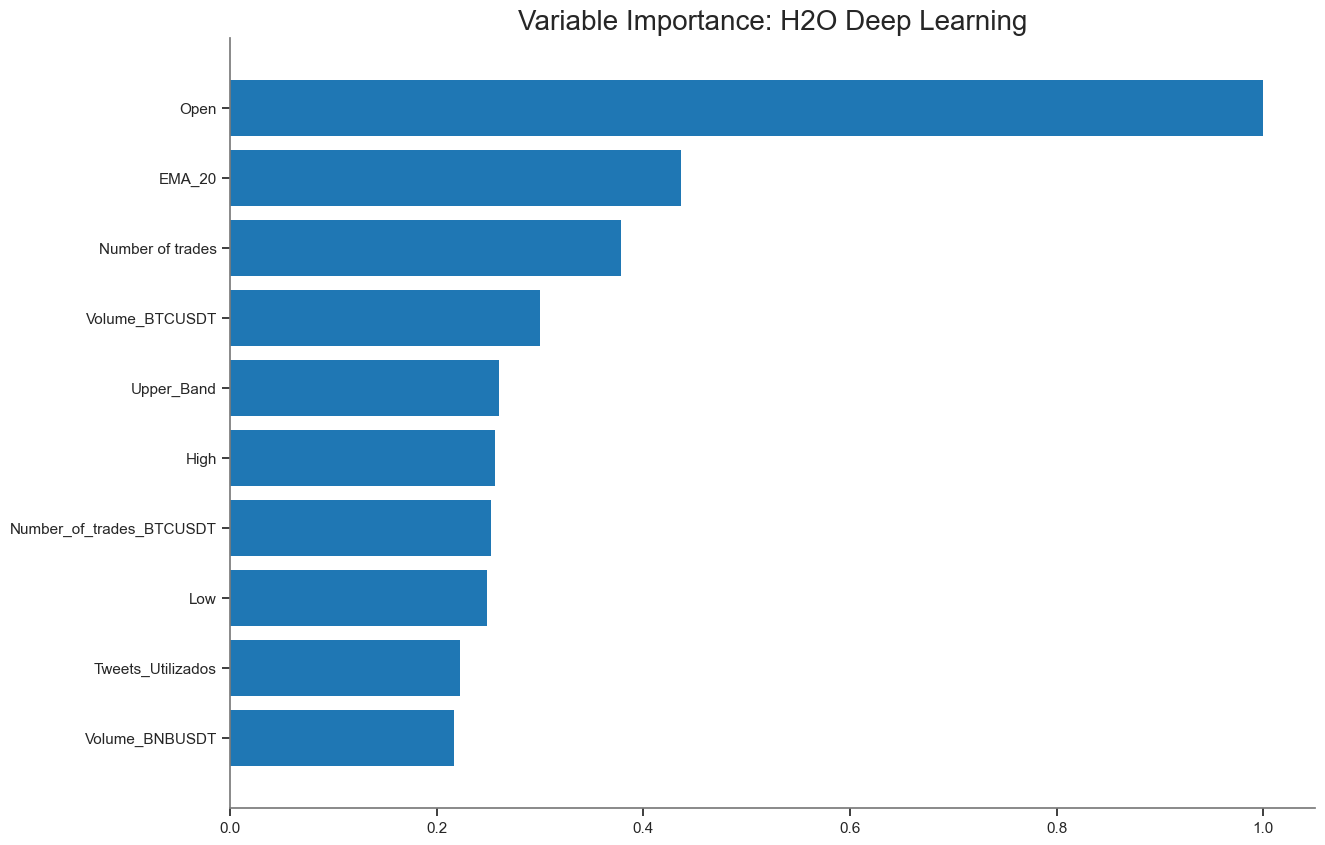

<Figure size 640x480 with 0 Axes>

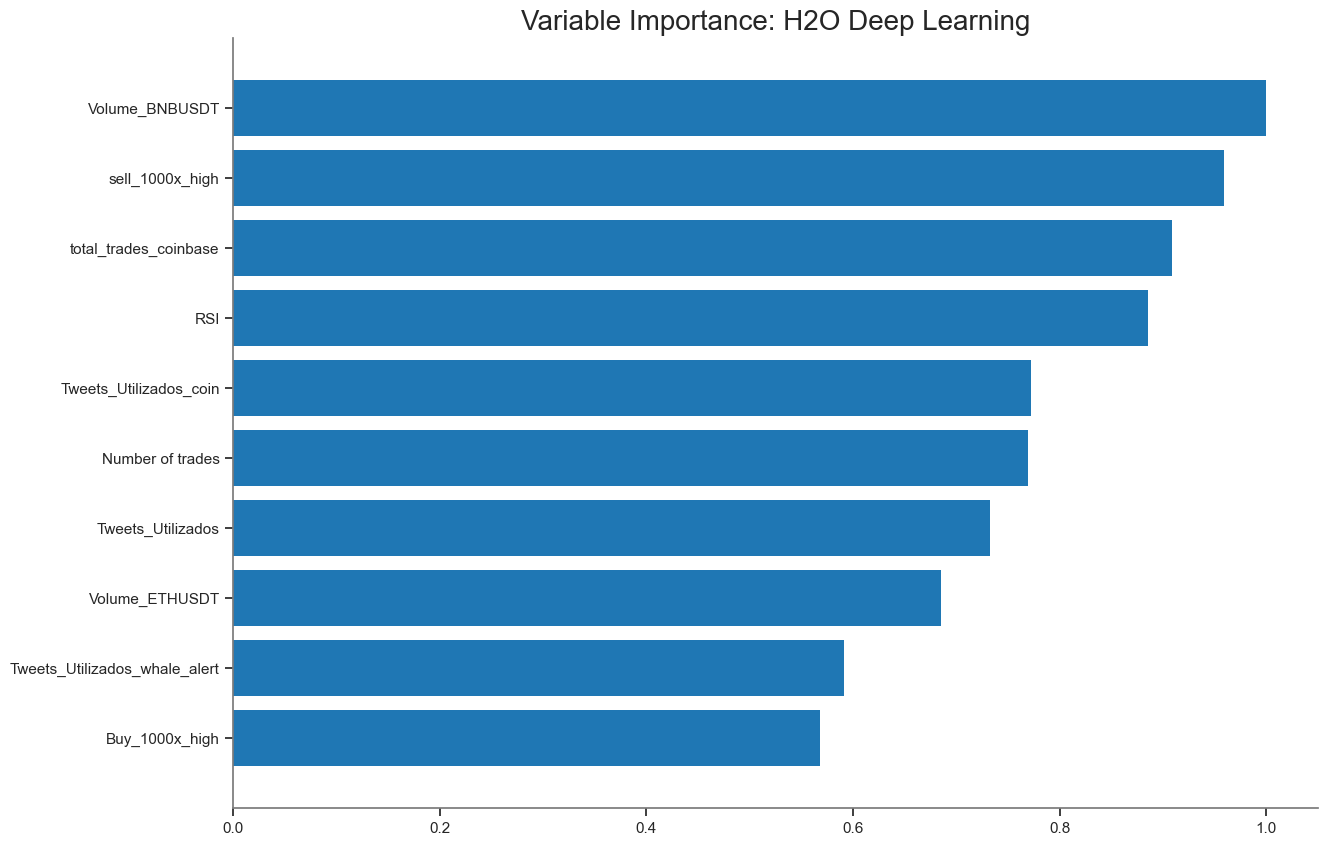

<Figure size 640x480 with 0 Axes>

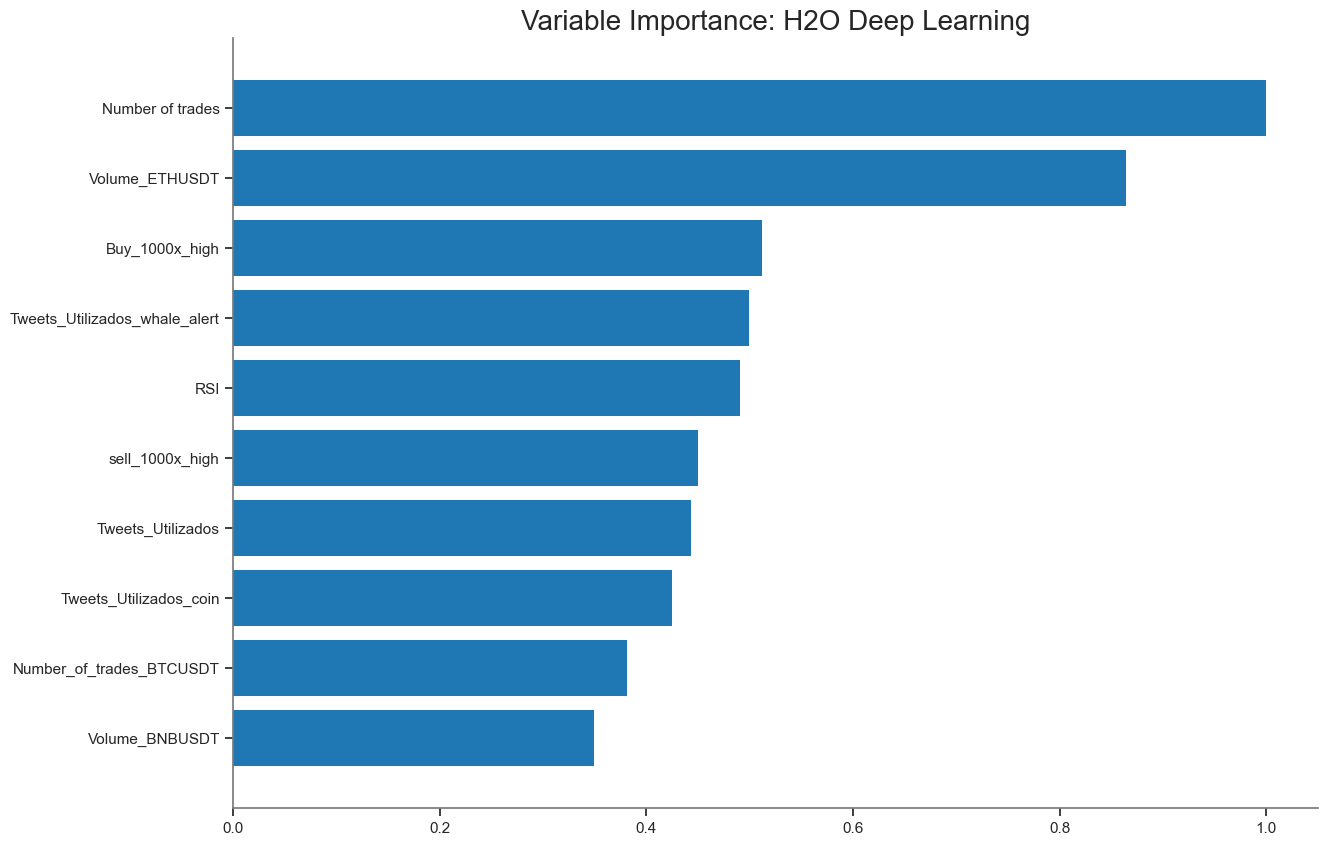

<Figure size 640x480 with 0 Axes>

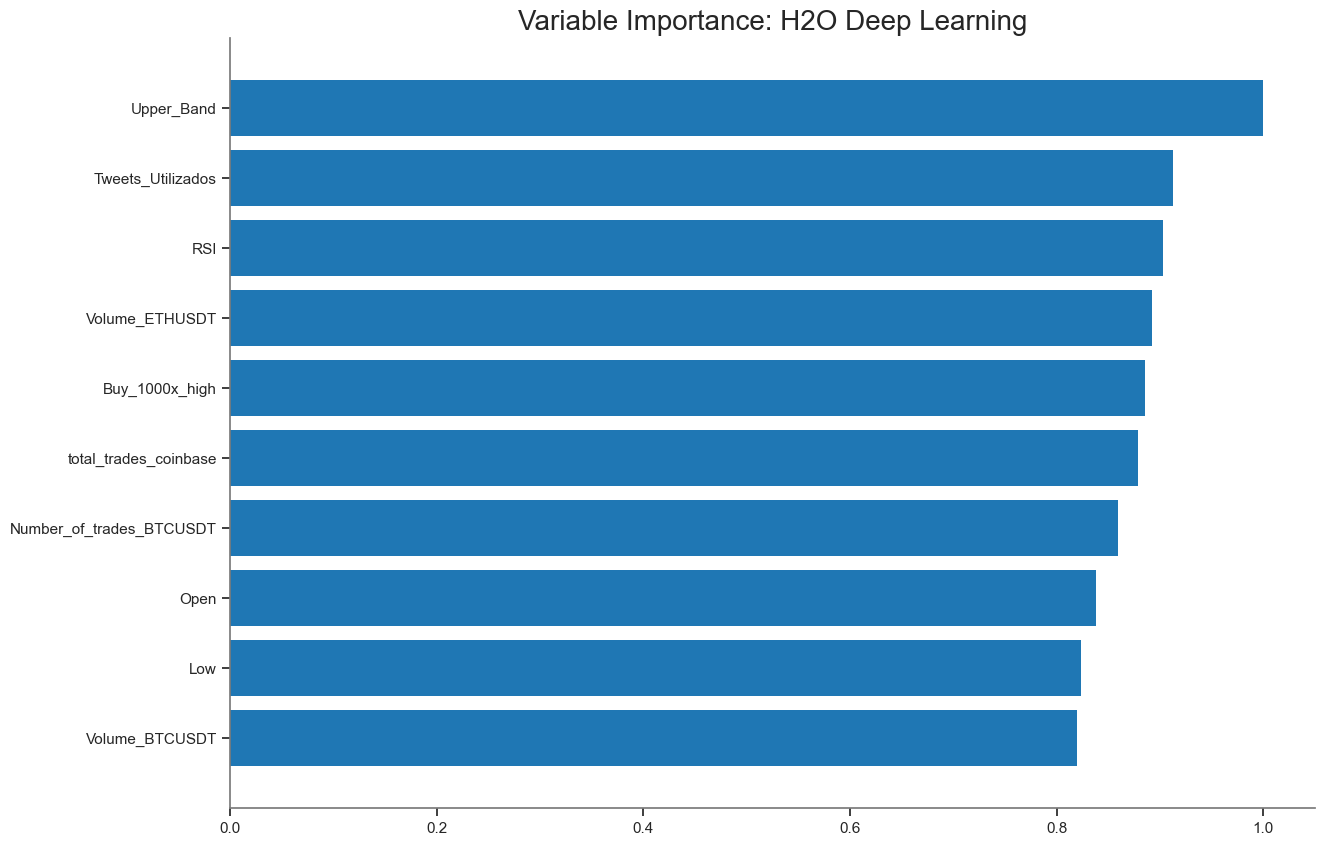

<Figure size 640x480 with 0 Axes>

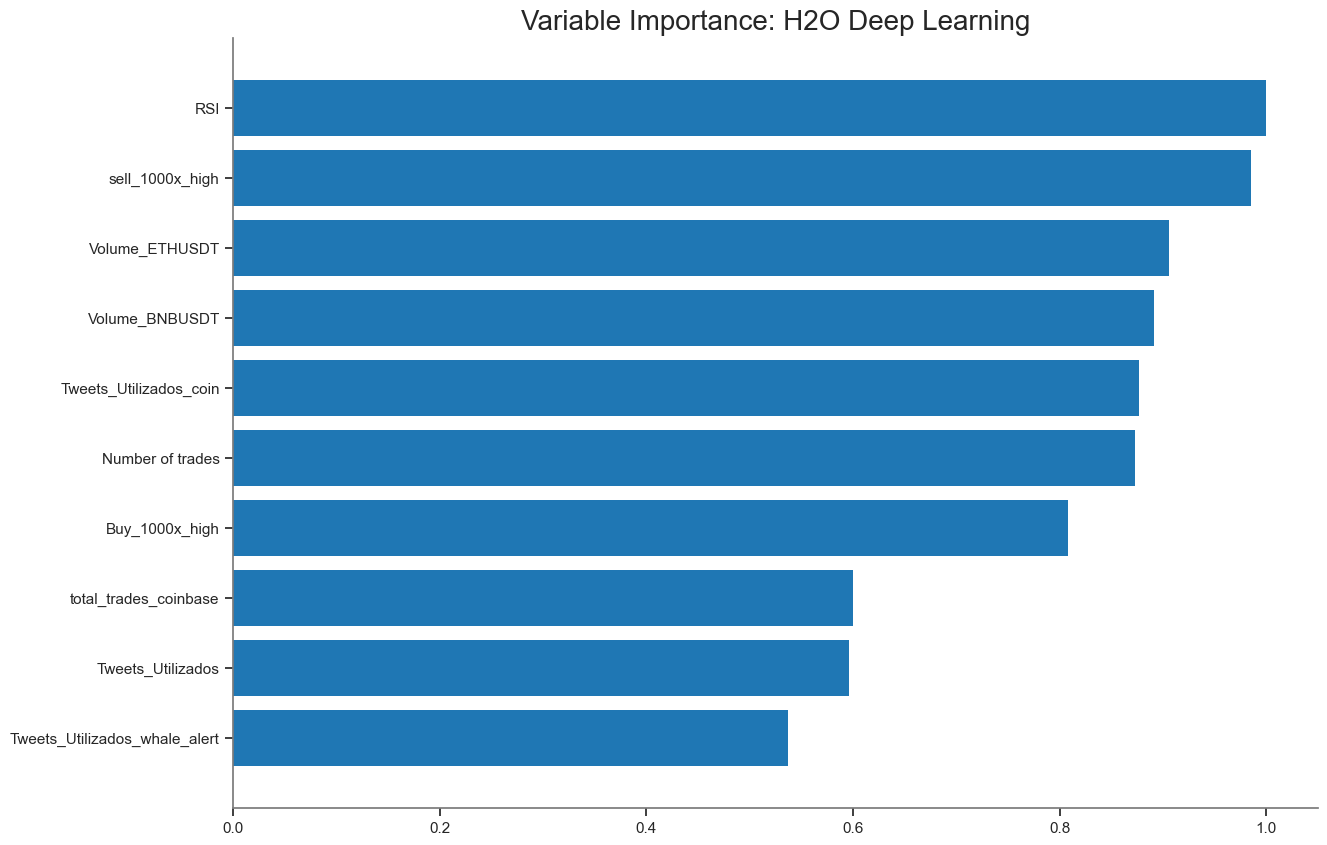

<Figure size 640x480 with 0 Axes>

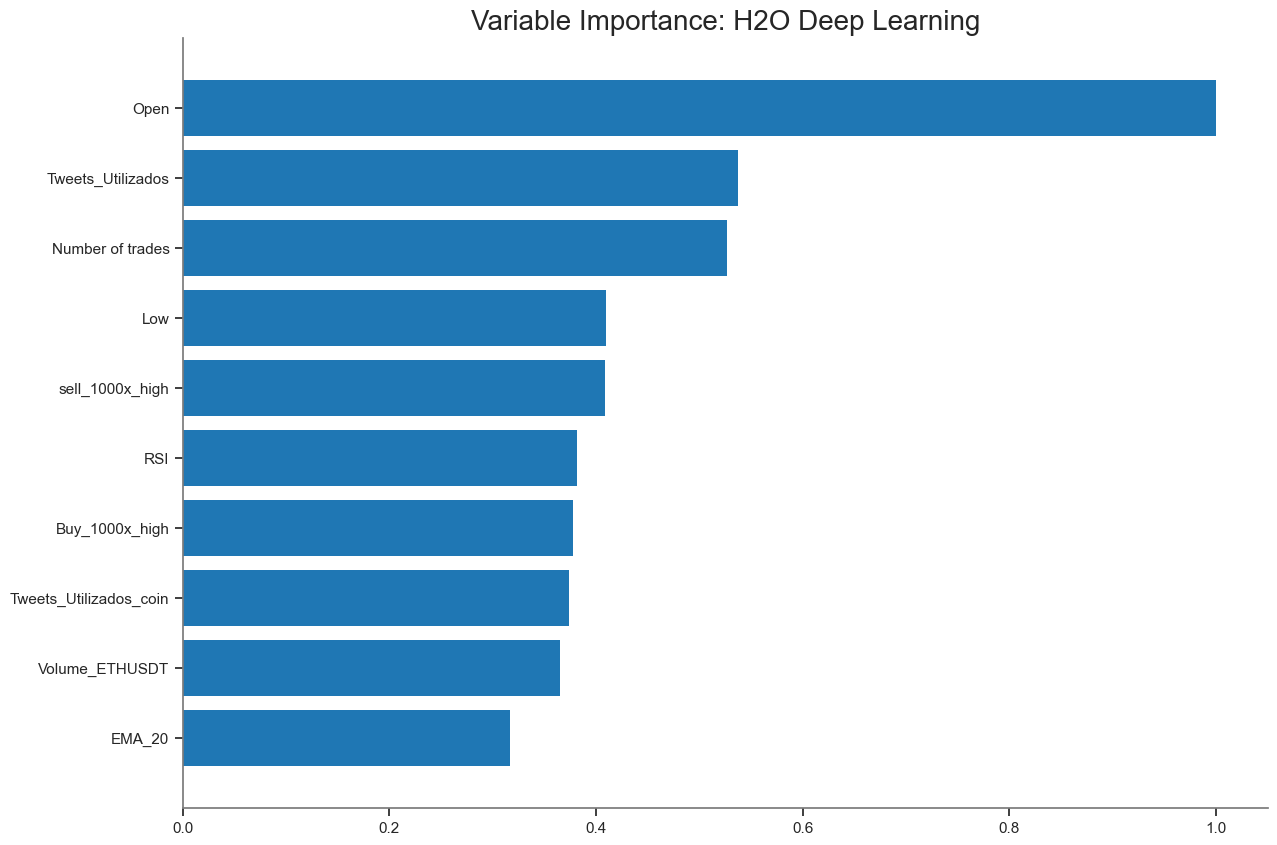

<Figure size 640x480 with 0 Axes>

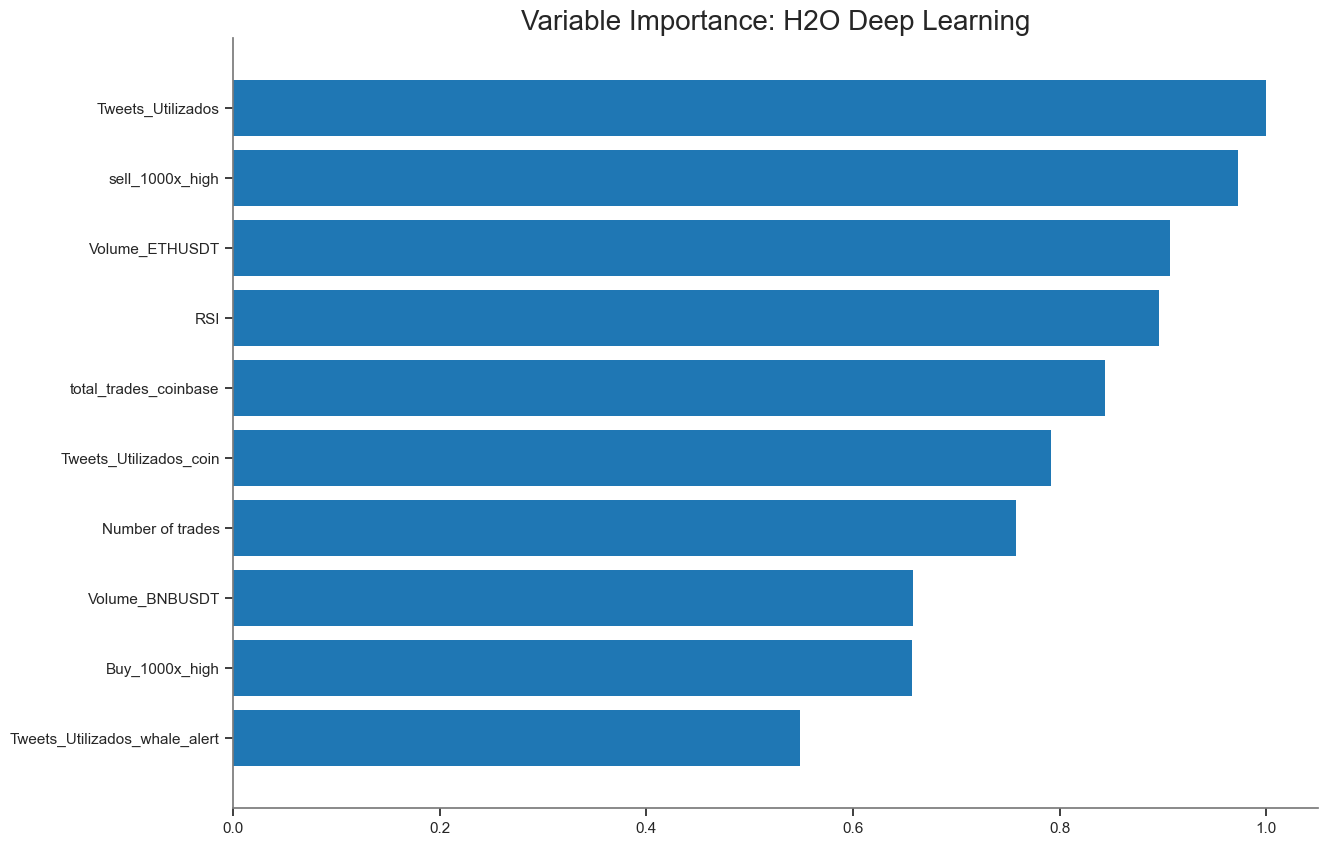

<Figure size 640x480 with 0 Axes>

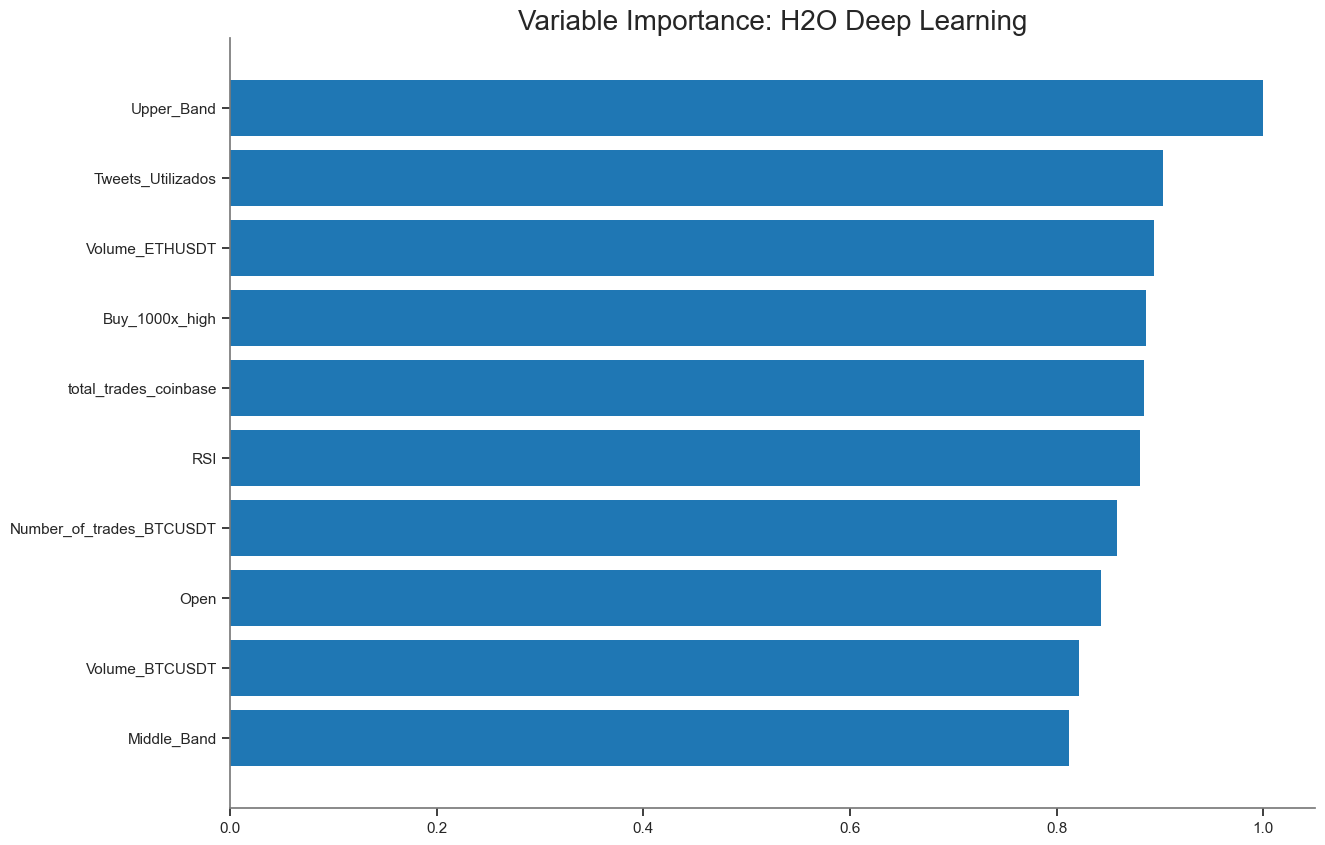

<Figure size 640x480 with 0 Axes>

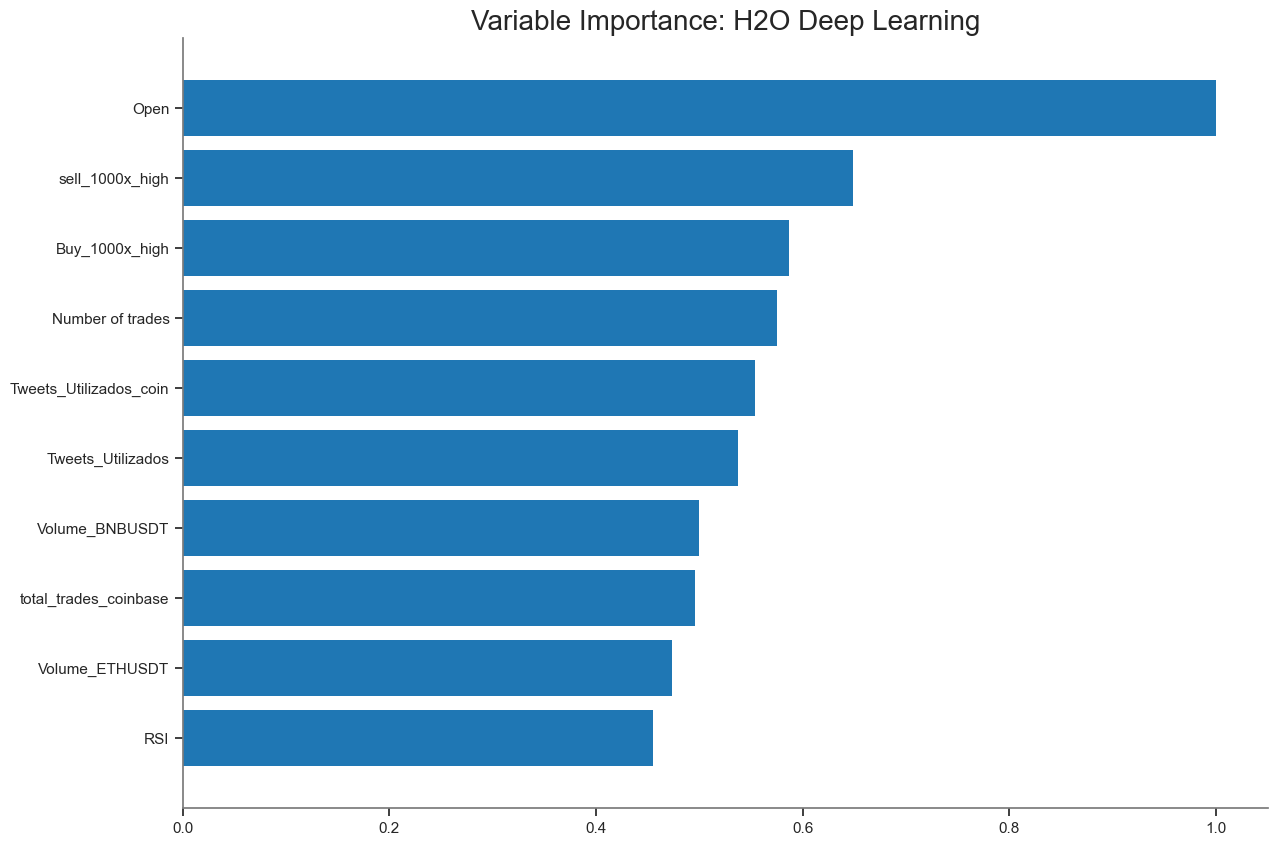

<Figure size 640x480 with 0 Axes>

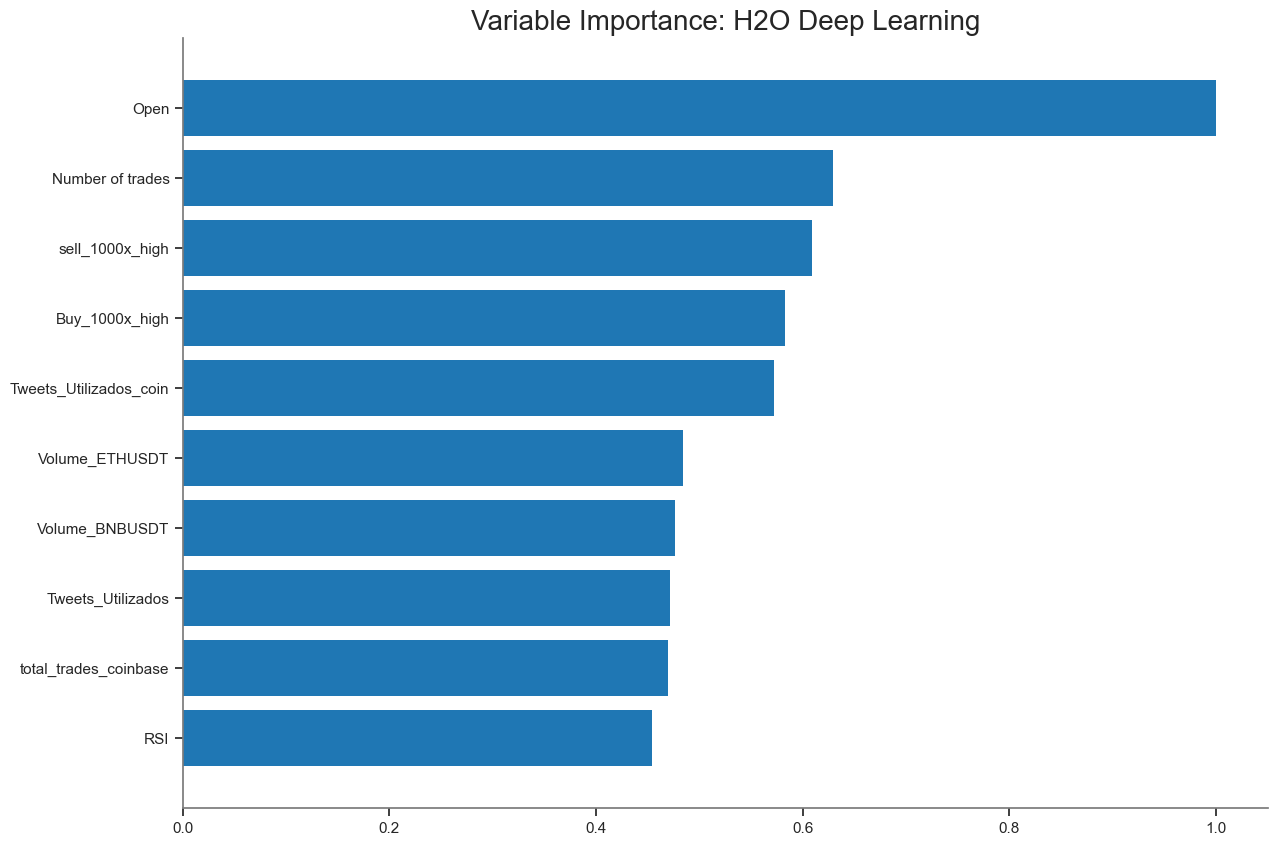

<Figure size 640x480 with 0 Axes>

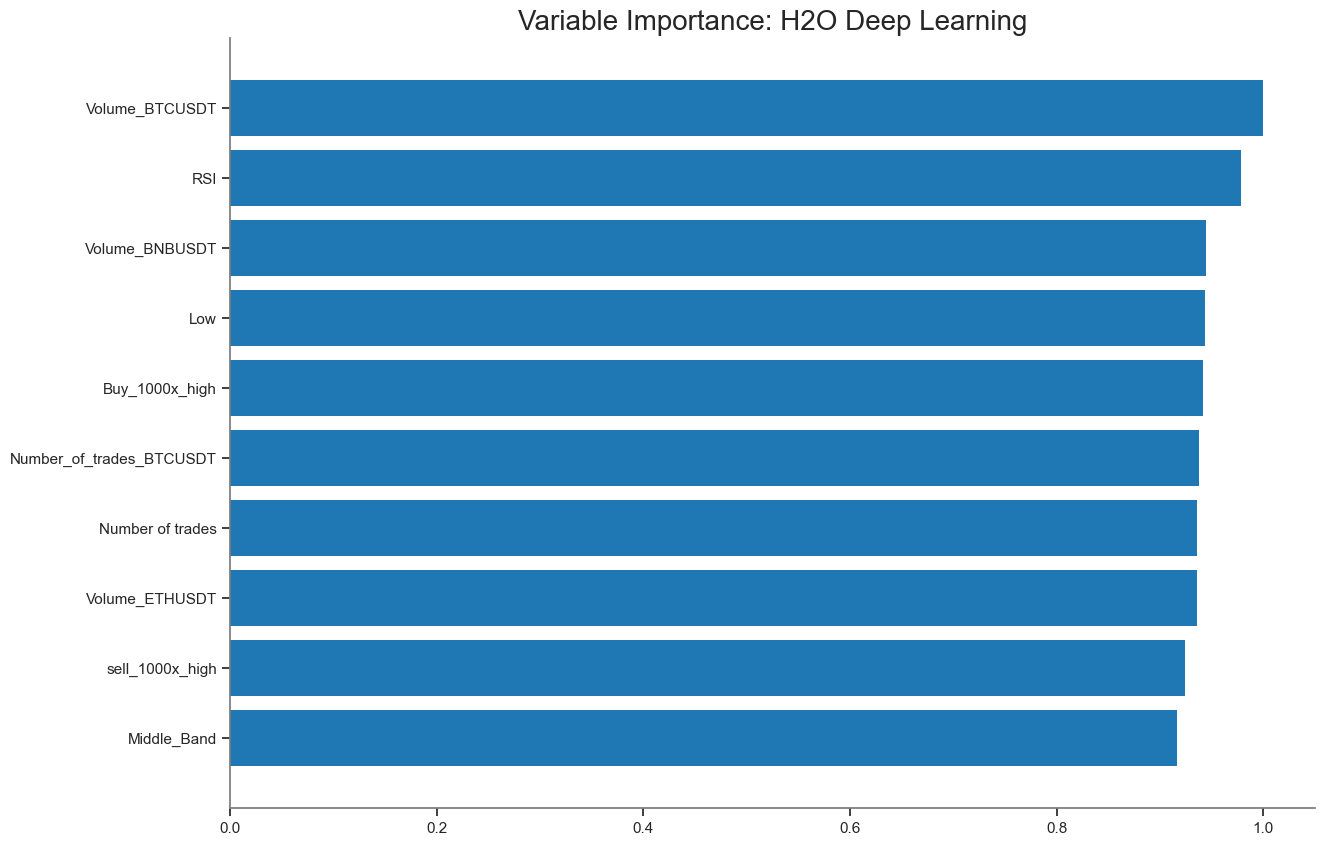

<Figure size 640x480 with 0 Axes>

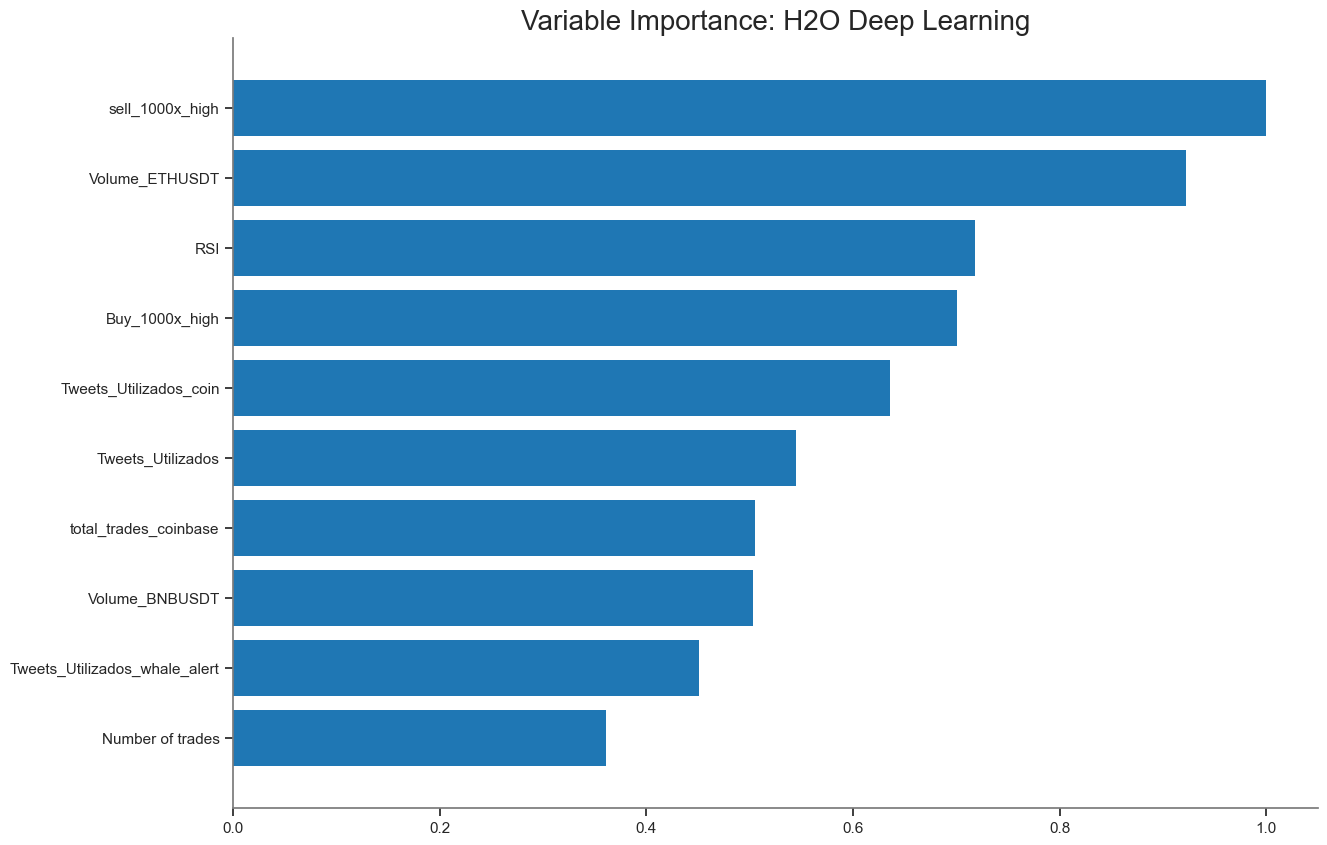

<Figure size 640x480 with 0 Axes>

In [104]:
from matplotlib import pyplot as plt


ensemble_model = stack_models[0]

# Obtener los modelos base del ensemble
base_models_ids = ensemble_model.base_models

# Visualizar la importancia de características para cada modelo base
for model_id in base_models_ids:
    base_model = h2o.get_model(model_id)
    try:
        # Generar y mostrar el gráfico de importancia de características
        base_model.varimp_plot()
        plt.show()
    except:
        print(f"No se puede generar la importancia de características para el modelo {model_id} de tipo {base_model.algo}")
